<a href="https://colab.research.google.com/github/prakharsingh1312/Skin-Cancer-Detection/blob/master/CancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unrar x  '/content/drive/My Drive/Binary.rar'

Streaming output truncated to the last 5000 lines.
Extracting  Negative/polymorphous-light-eruption-23.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-24.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-25.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-26.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-27.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-28.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-29.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-3.jpg                    87%  OK 
Extracting  Negative/polymorphous-light-eruption-30.jpg                   87%  OK 
Extracting  Negative/polymorphous-light-eruption-31.jpg                   87%  OK 
Extracting  Negative/polymorp

In [ ]:
path = '/content/Binary'

In [ ]:
tfms = get_transforms(do_flip = True, max_lighting = 0.2, max_zoom= 1.1, max_warp = 0.15, max_rotate = 45)

In [ ]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.4,
                                  ds_tfms=tfms, size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Negative', 'Positive']

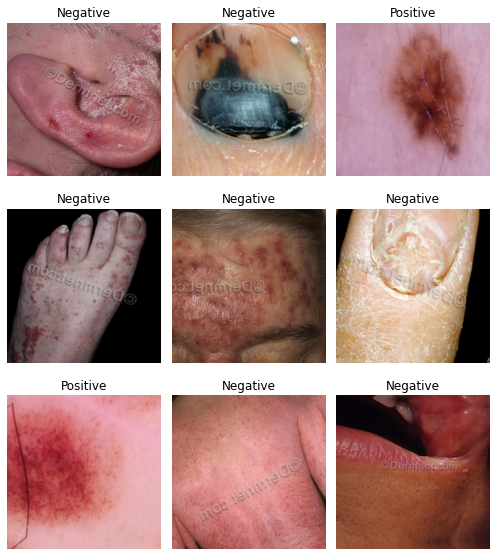

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


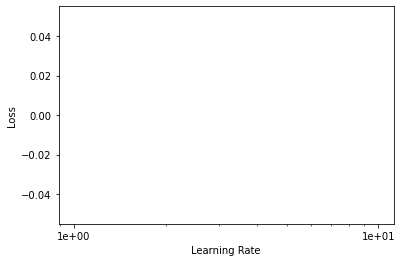

In [13]:
fbeta = FBeta(average='weighted', beta = 1)
learn = cnn_learner(data, models.densenet121, metrics=[accuracy, fbeta])
learn.fit_one_cycle(6, max_lr =[8e-6, 8e-4, 8e-3] )#slice(8e-6, 8e-3)
  #Finding learning rate based on the training
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [50]:
learn.export(file = Path("/content/drive/My Drive/cancer_classifier.pkl"))

In [ ]:
from fastai import *
from fastai.vision import *

model = load_learner('/content/drive/My Drive','vehicle_classifier.pkl')
model1=load_learner('/content/drive/My Drive','emergency_classifier.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [46]:
dataset=['Negative','Positive']
img=open_image('/content/suspicious_mole_melanoma_skin_cancer_595x240-595x240.jpg')
tens=learn.predict(img)[-1].numpy()
tens1=learn.predict(img)[-1].numpy()
print('Predicted',dataset[np.argmax(tens1)],'with probability ',np.max(tens1))


Predicted Positive with probability  0.7752512


In [32]:
tens

array([0.027625, 0.972375], dtype=float32)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

<Figure size 1008x288 with 0 Axes>

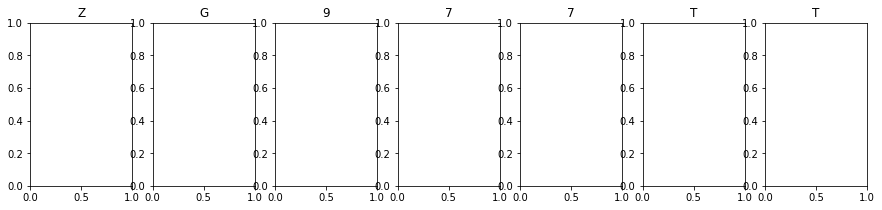

<Figure size 1008x288 with 0 Axes>

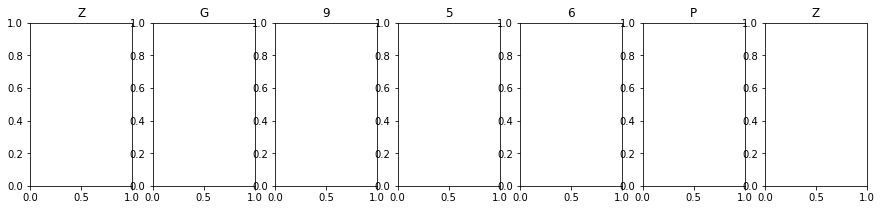

<Figure size 1008x288 with 0 Axes>

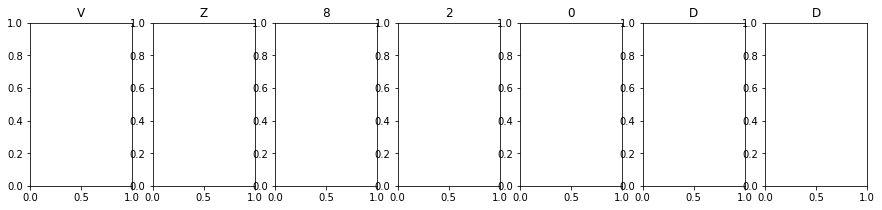

<Figure size 1008x288 with 0 Axes>

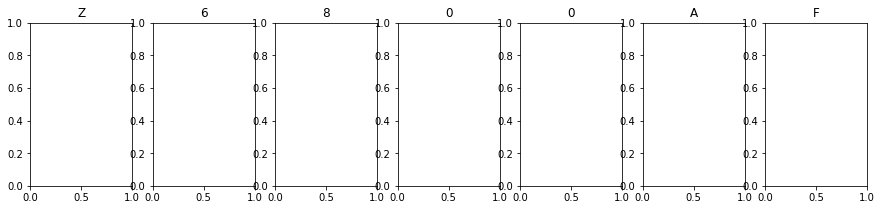

<Figure size 1008x288 with 0 Axes>

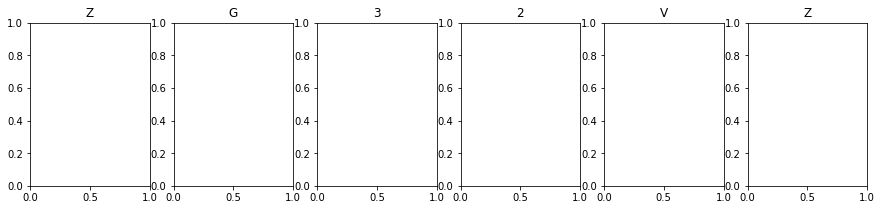

<Figure size 1008x288 with 0 Axes>

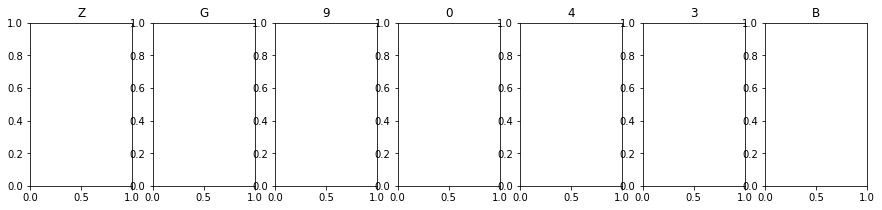

<Figure size 1008x288 with 0 Axes>

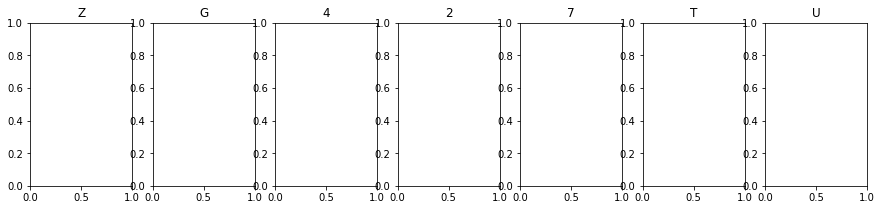

<Figure size 1008x288 with 0 Axes>

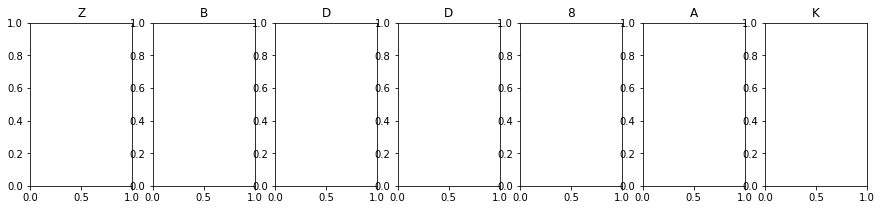

<Figure size 1008x288 with 0 Axes>

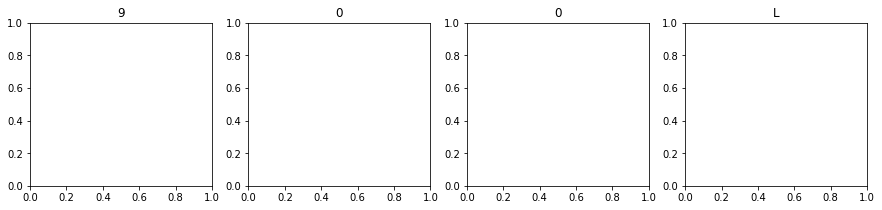

<Figure size 1008x288 with 0 Axes>

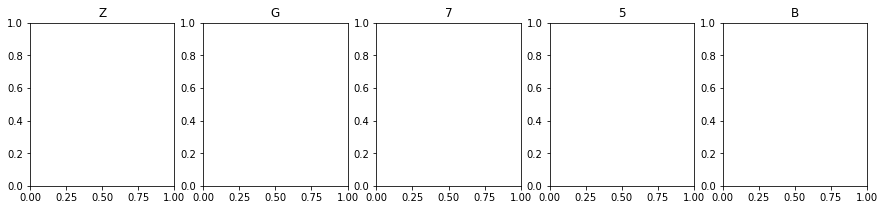

<Figure size 1008x288 with 0 Axes>

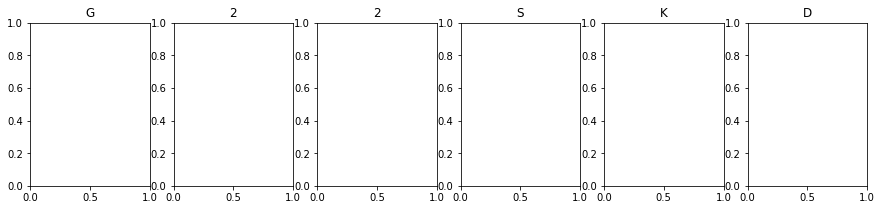

<Figure size 1008x288 with 0 Axes>

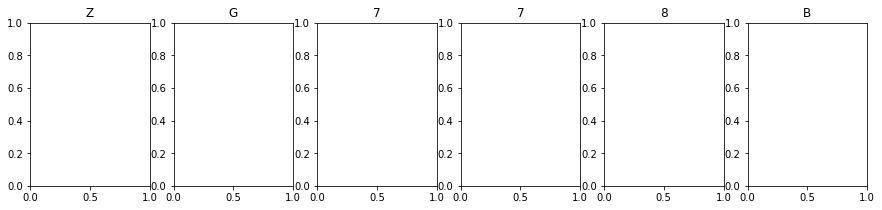

<Figure size 1008x288 with 0 Axes>

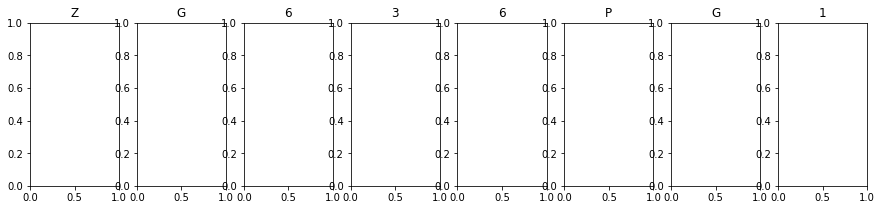

<Figure size 1008x288 with 0 Axes>

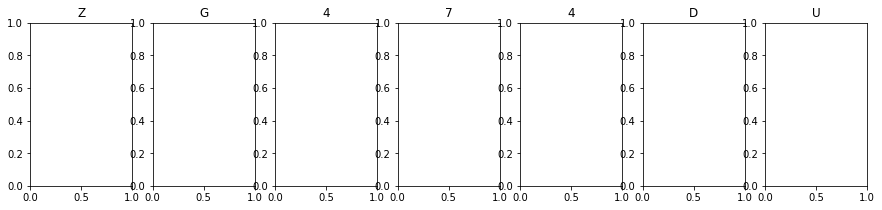

<Figure size 1008x288 with 0 Axes>

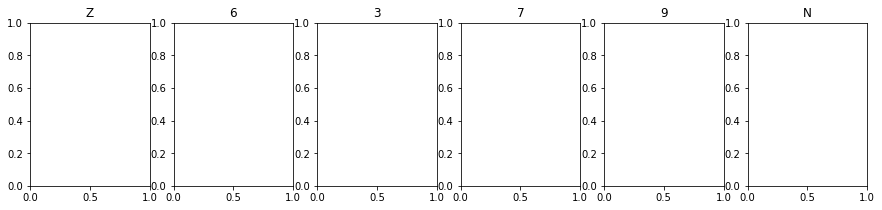

<Figure size 1008x288 with 0 Axes>

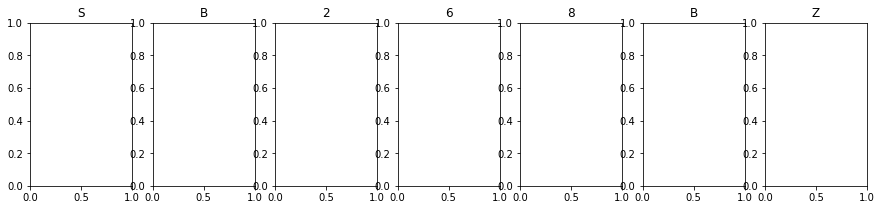

<Figure size 1008x288 with 0 Axes>

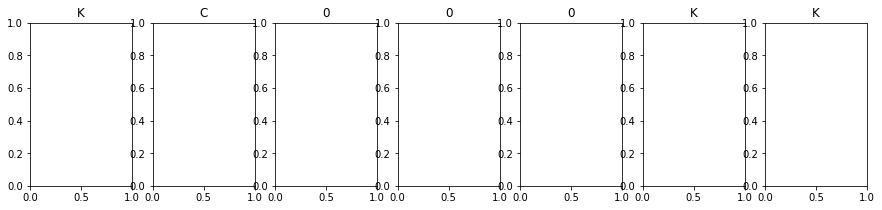

<Figure size 1008x288 with 0 Axes>

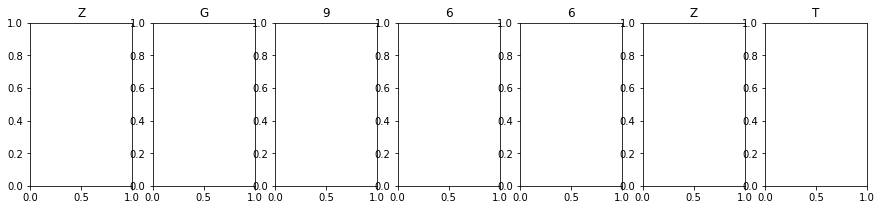

<Figure size 1008x288 with 0 Axes>

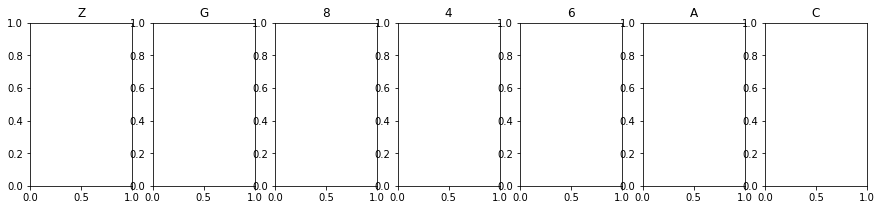

<Figure size 1008x288 with 0 Axes>

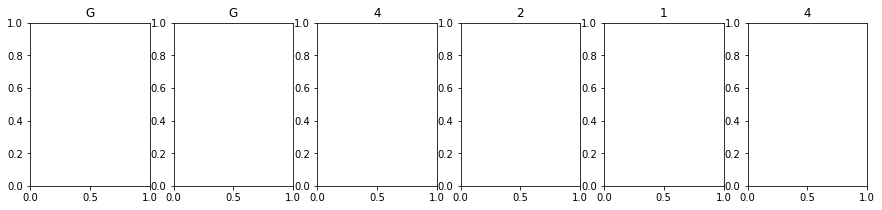

<Figure size 1008x288 with 0 Axes>

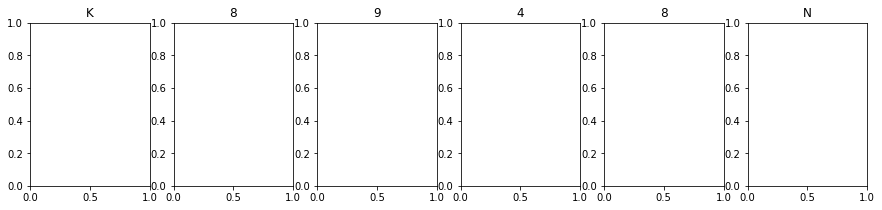

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

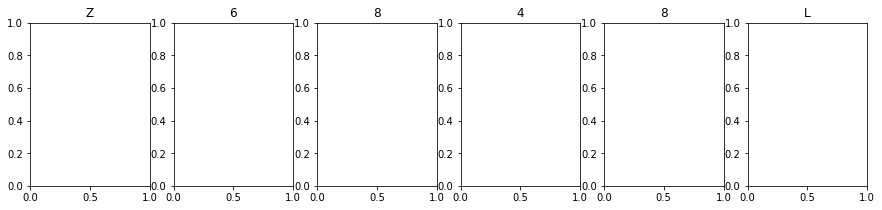

<Figure size 1008x288 with 0 Axes>

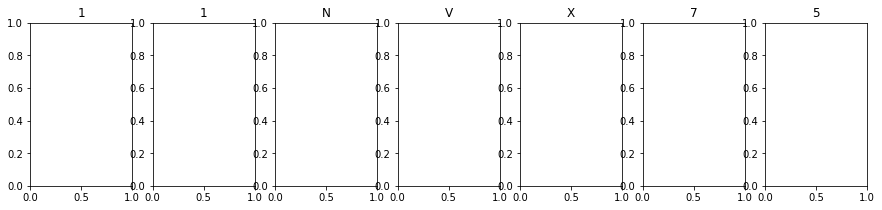

<Figure size 1008x288 with 0 Axes>

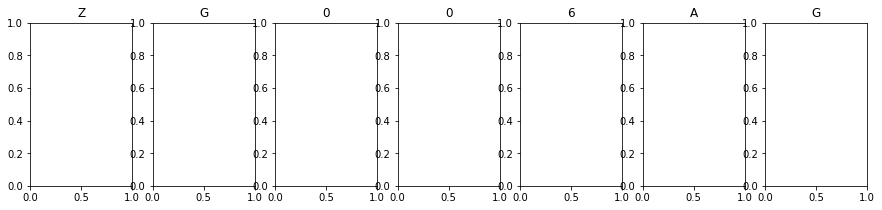

<Figure size 1008x288 with 0 Axes>

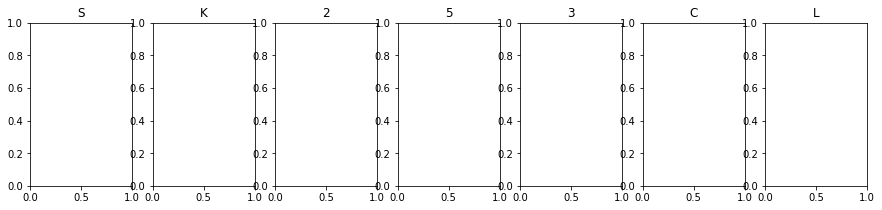

<Figure size 1008x288 with 0 Axes>

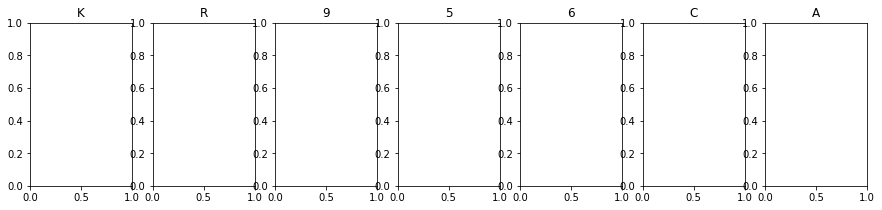

<Figure size 1008x288 with 0 Axes>

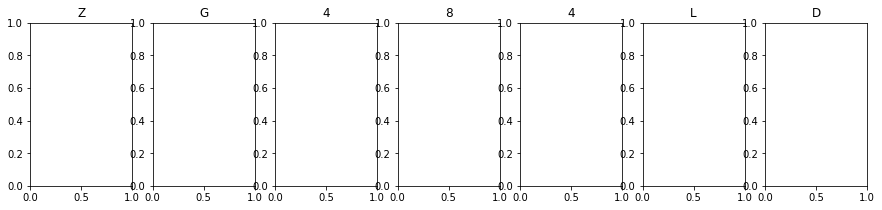

<Figure size 1008x288 with 0 Axes>

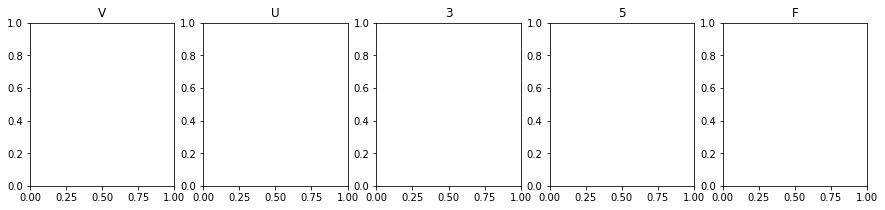

<Figure size 1008x288 with 0 Axes>

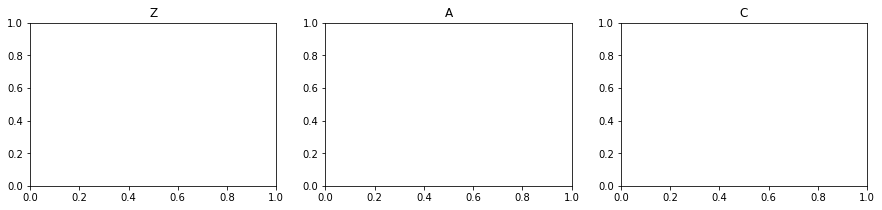

<Figure size 1008x288 with 0 Axes>

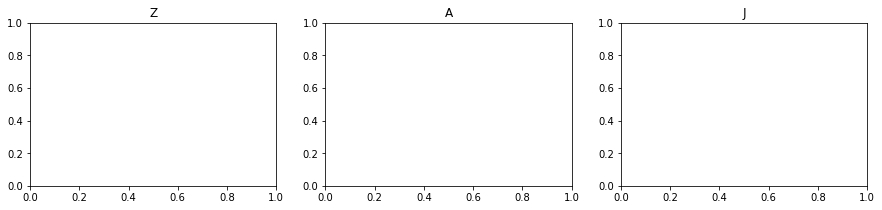

<Figure size 1008x288 with 0 Axes>

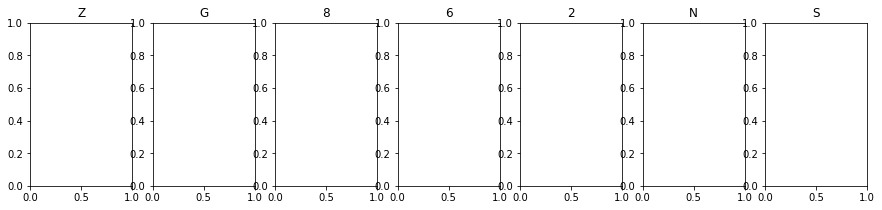

<Figure size 1008x288 with 0 Axes>

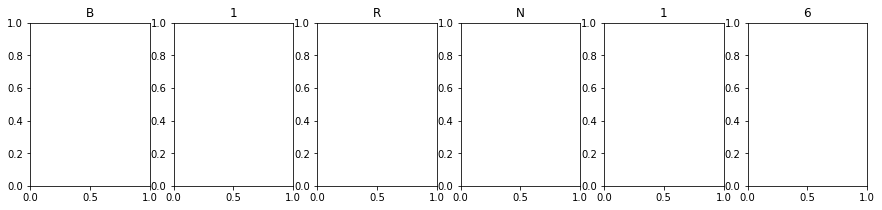

<Figure size 1008x288 with 0 Axes>

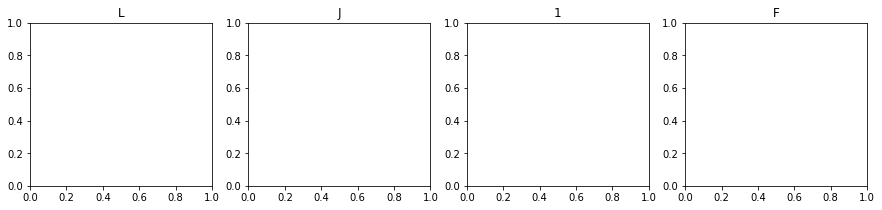

<Figure size 1008x288 with 0 Axes>

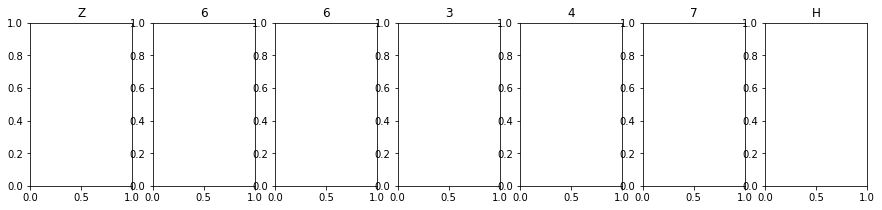

<Figure size 1008x288 with 0 Axes>

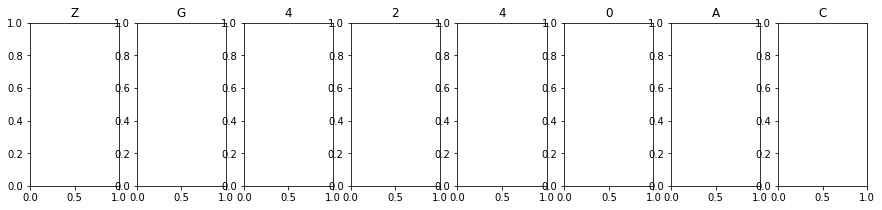

<Figure size 1008x288 with 0 Axes>

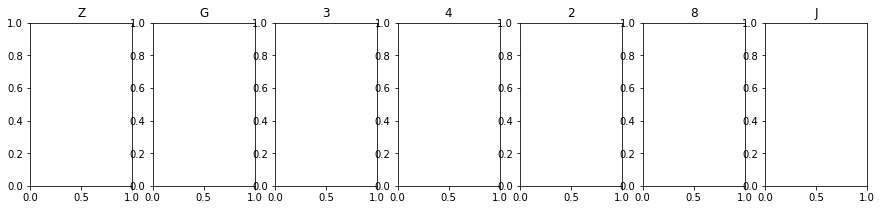

<Figure size 1008x288 with 0 Axes>

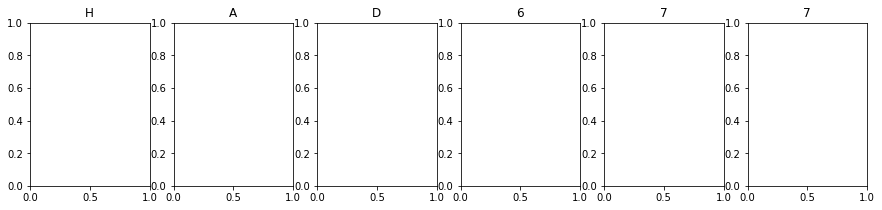

<Figure size 1008x288 with 0 Axes>

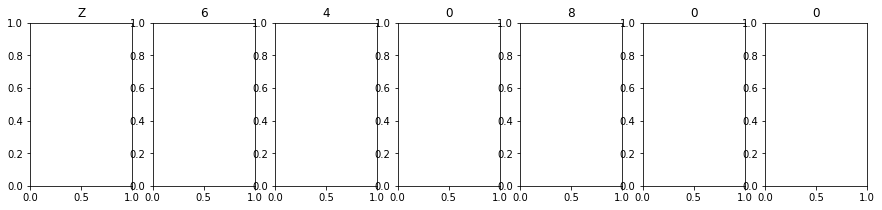

<Figure size 1008x288 with 0 Axes>

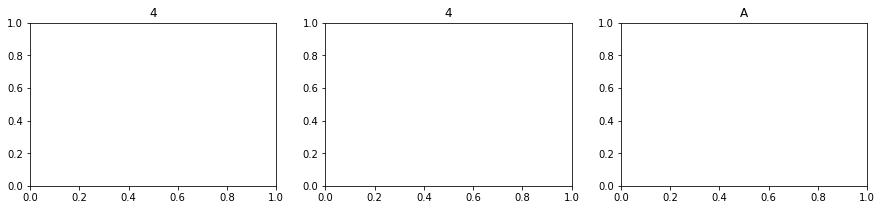

<Figure size 1008x288 with 0 Axes>

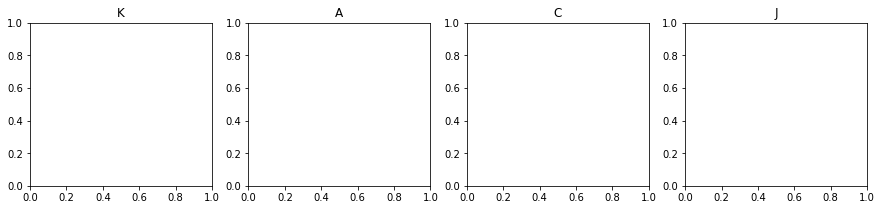

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

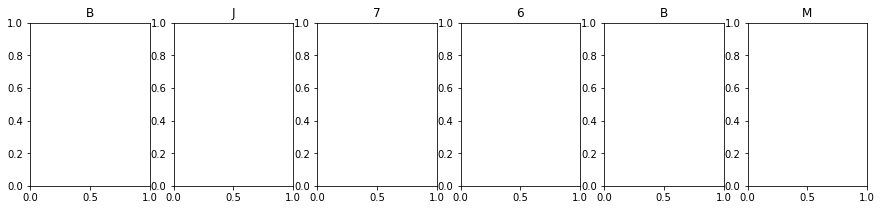

<Figure size 1008x288 with 0 Axes>

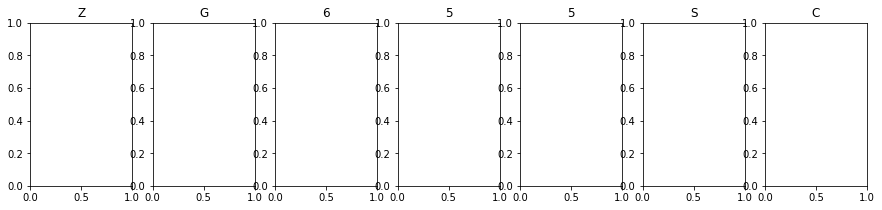

<Figure size 1008x288 with 0 Axes>

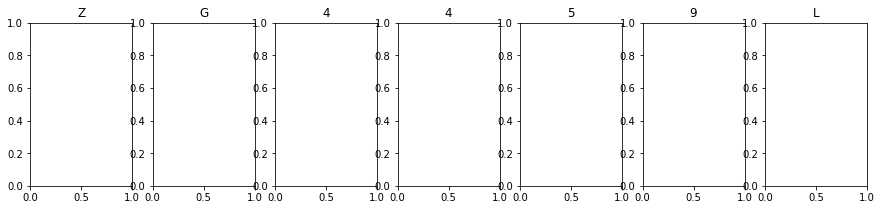

<Figure size 1008x288 with 0 Axes>

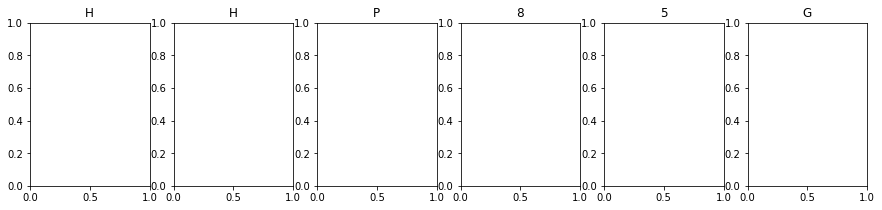

<Figure size 1008x288 with 0 Axes>

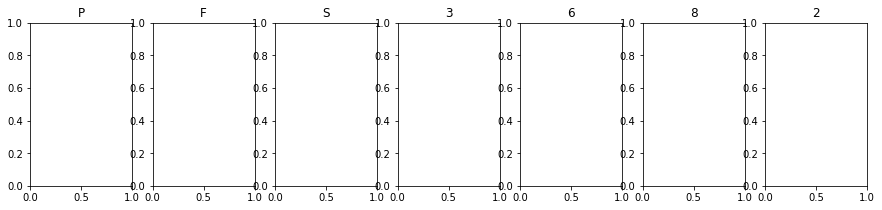

<Figure size 1008x288 with 0 Axes>

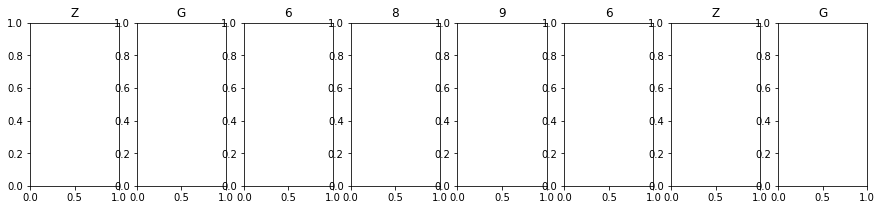

<Figure size 1008x288 with 0 Axes>

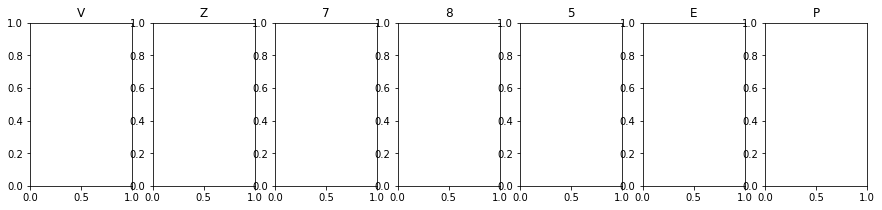

<Figure size 1008x288 with 0 Axes>

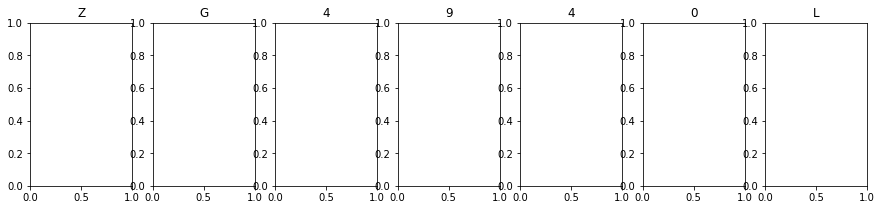

<Figure size 1008x288 with 0 Axes>

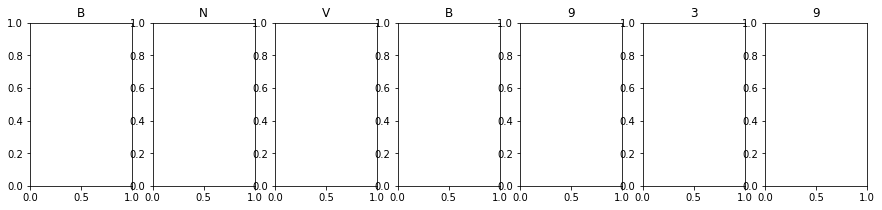

<Figure size 1008x288 with 0 Axes>

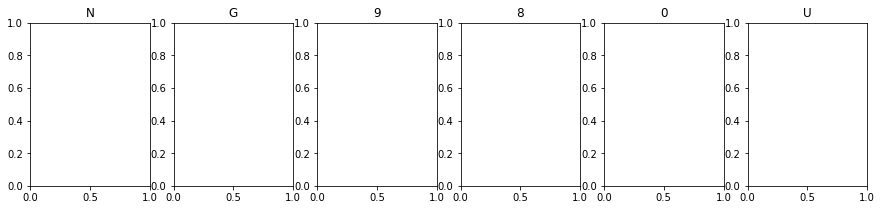

<Figure size 1008x288 with 0 Axes>

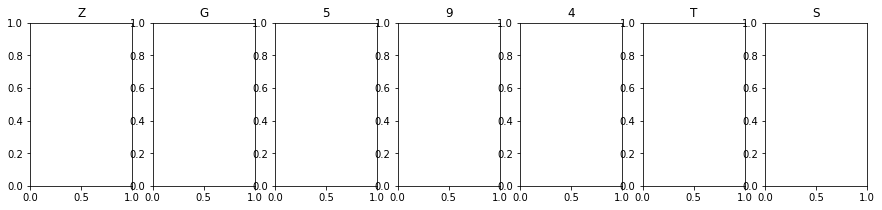

<Figure size 1008x288 with 0 Axes>

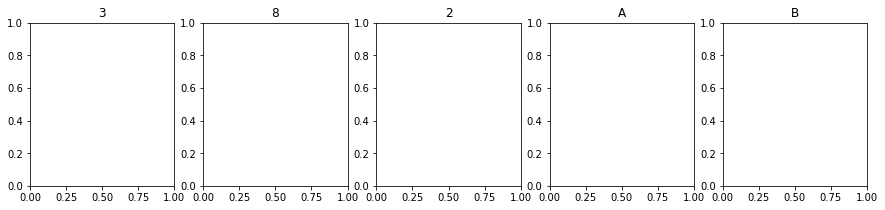

<Figure size 1008x288 with 0 Axes>

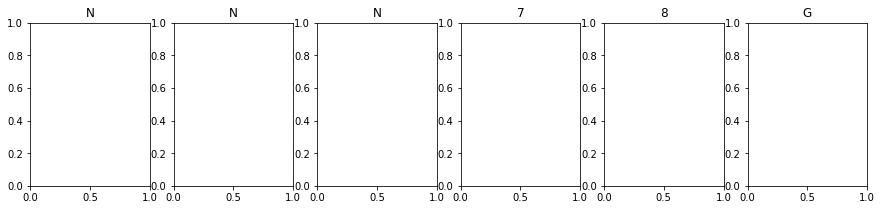

<Figure size 1008x288 with 0 Axes>

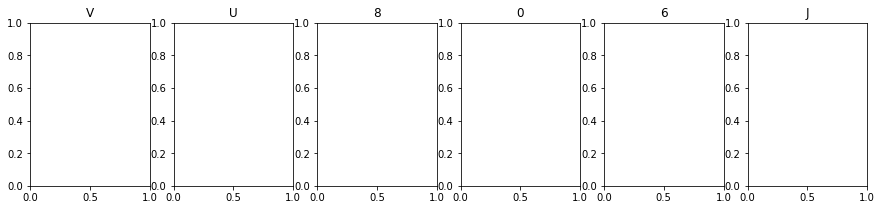

<Figure size 1008x288 with 0 Axes>

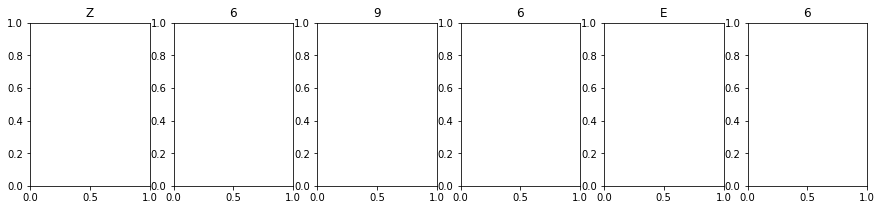

<Figure size 1008x288 with 0 Axes>

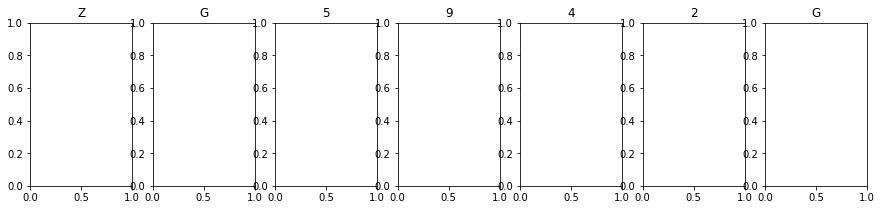

<Figure size 1008x288 with 0 Axes>

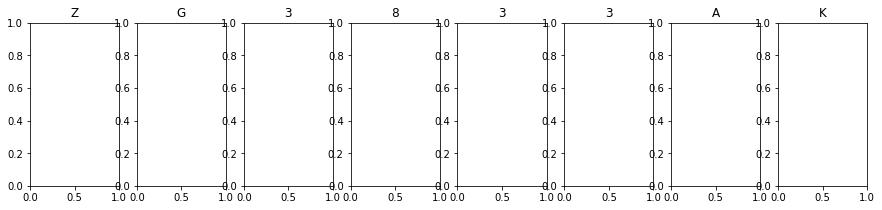

<Figure size 1008x288 with 0 Axes>

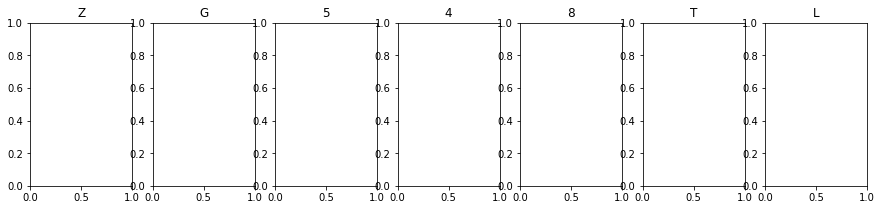

<Figure size 1008x288 with 0 Axes>

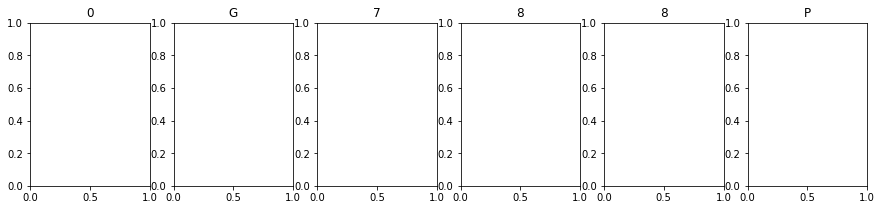

<Figure size 1008x288 with 0 Axes>

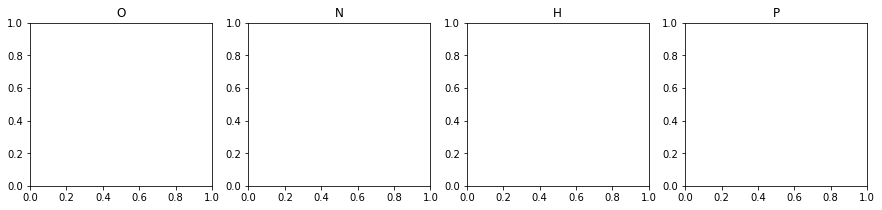

<Figure size 1008x288 with 0 Axes>

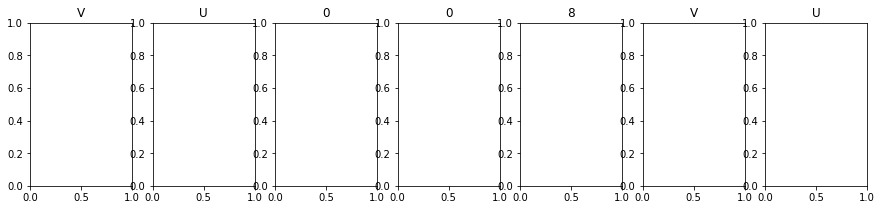

<Figure size 1008x288 with 0 Axes>

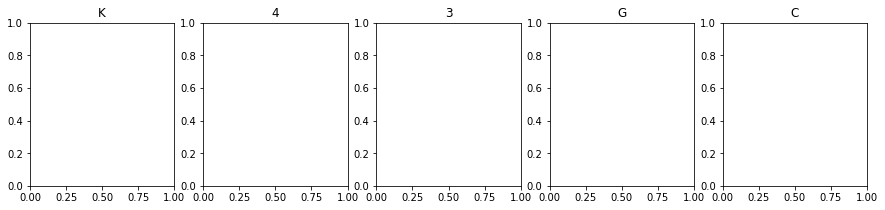

<Figure size 1008x288 with 0 Axes>

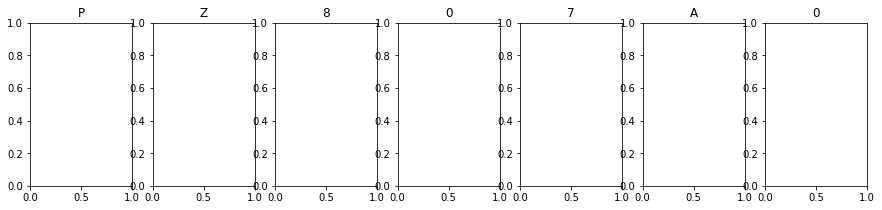

<Figure size 1008x288 with 0 Axes>

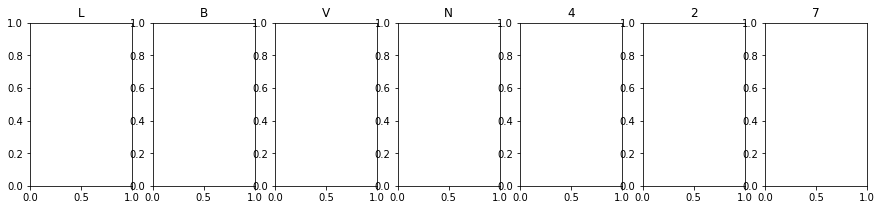

<Figure size 1008x288 with 0 Axes>

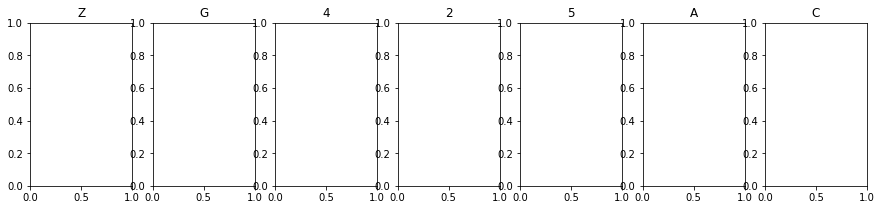

<Figure size 1008x288 with 0 Axes>

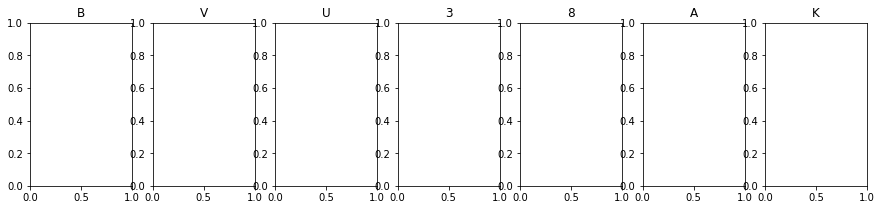

<Figure size 1008x288 with 0 Axes>

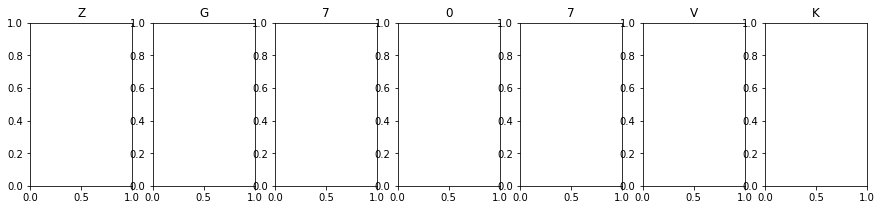

<Figure size 1008x288 with 0 Axes>

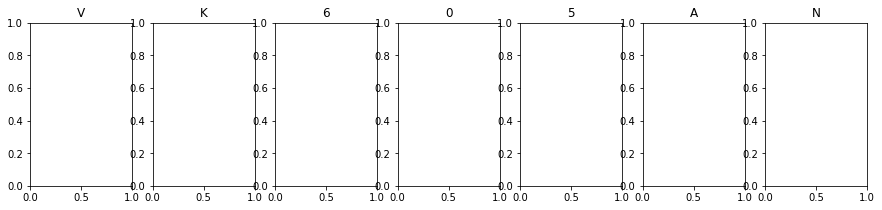

<Figure size 1008x288 with 0 Axes>

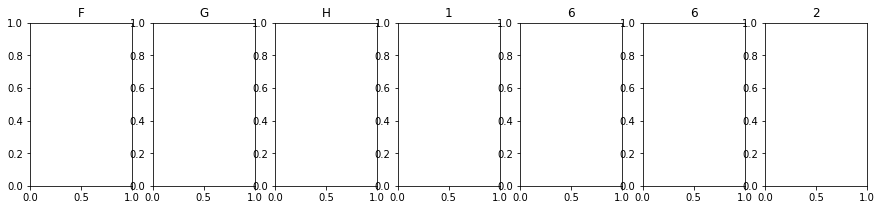

<Figure size 1008x288 with 0 Axes>

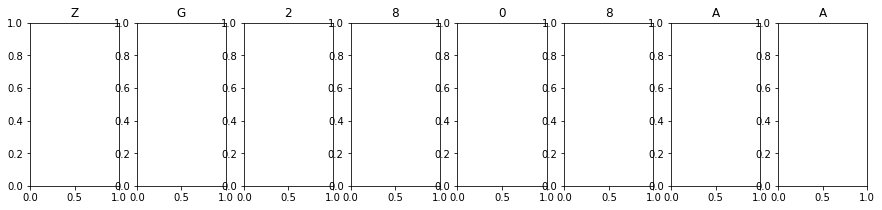

<Figure size 1008x288 with 0 Axes>

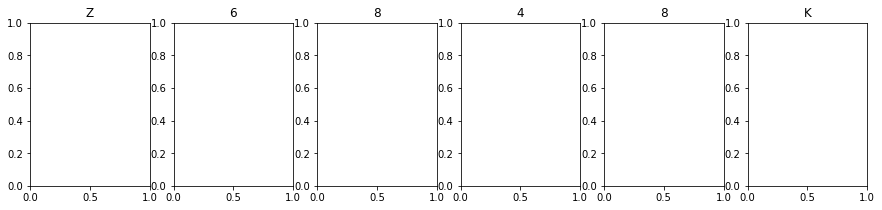

<Figure size 1008x288 with 0 Axes>

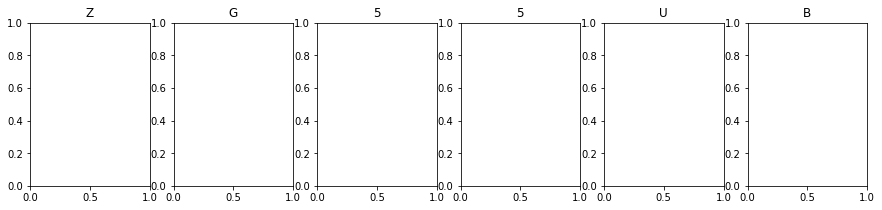

<Figure size 1008x288 with 0 Axes>

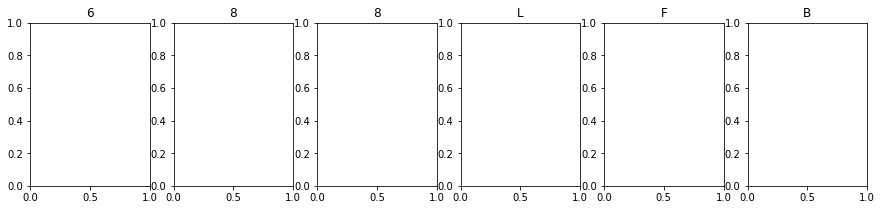

<Figure size 1008x288 with 0 Axes>

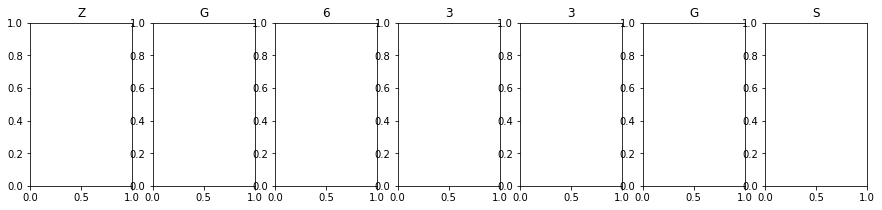

<Figure size 1008x288 with 0 Axes>

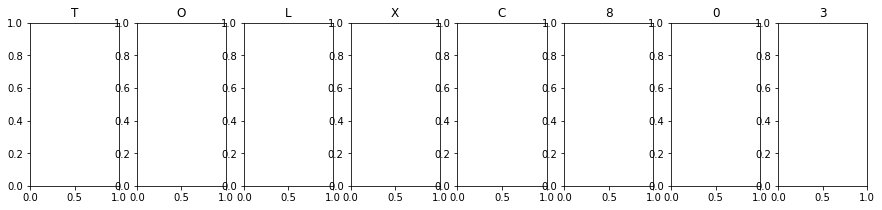

<Figure size 1008x288 with 0 Axes>

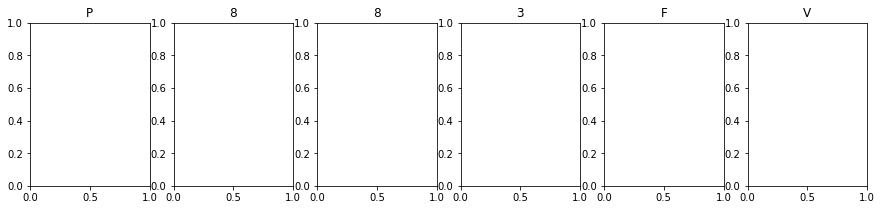

<Figure size 1008x288 with 0 Axes>

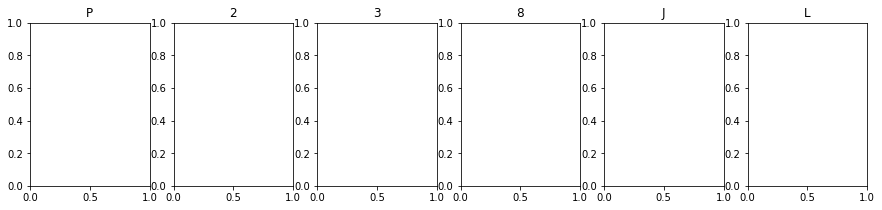

<Figure size 1008x288 with 0 Axes>

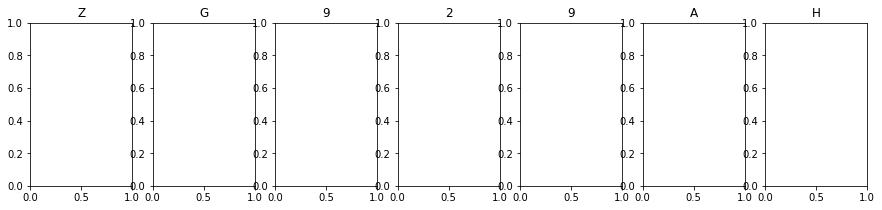

<Figure size 1008x288 with 0 Axes>

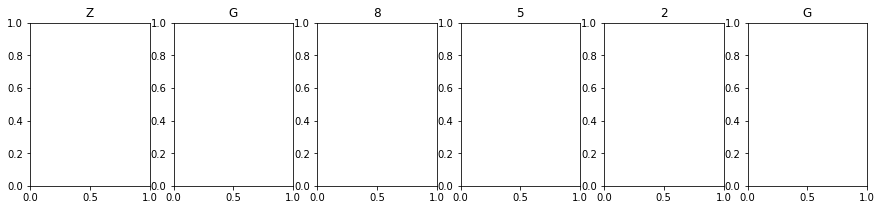

<Figure size 1008x288 with 0 Axes>

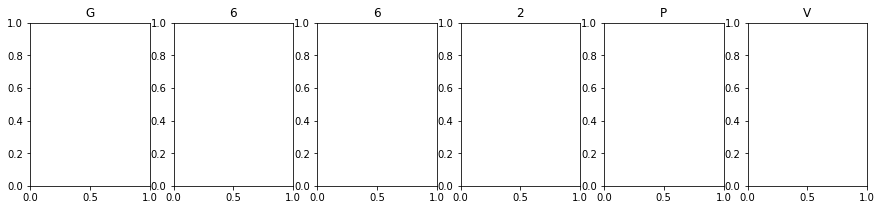

<Figure size 1008x288 with 0 Axes>

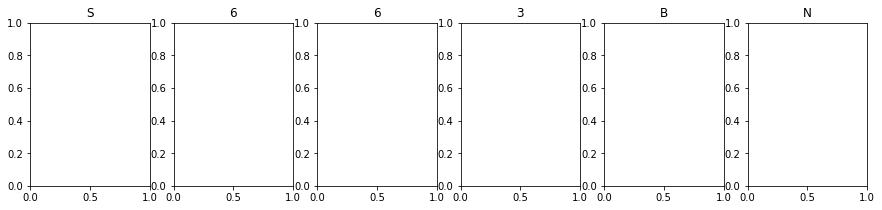

<Figure size 1008x288 with 0 Axes>

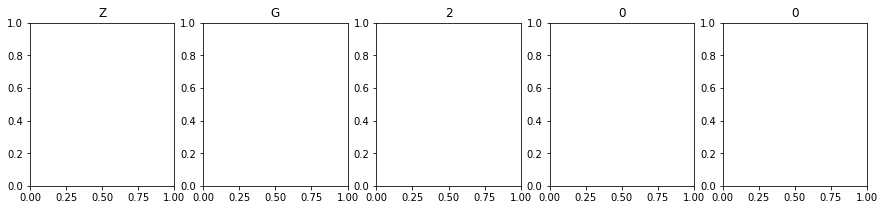

<Figure size 1008x288 with 0 Axes>

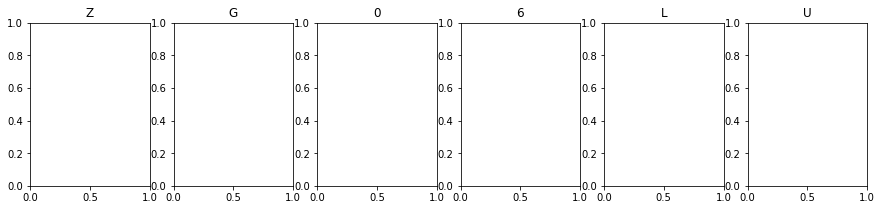

<Figure size 1008x288 with 0 Axes>

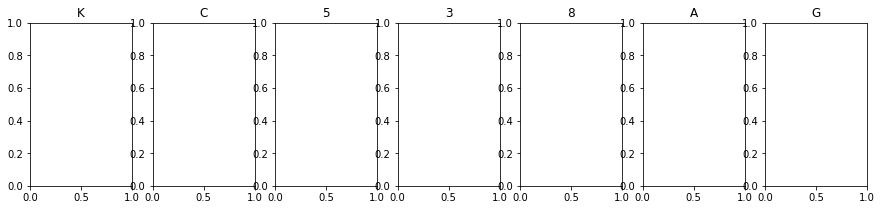

<Figure size 1008x288 with 0 Axes>

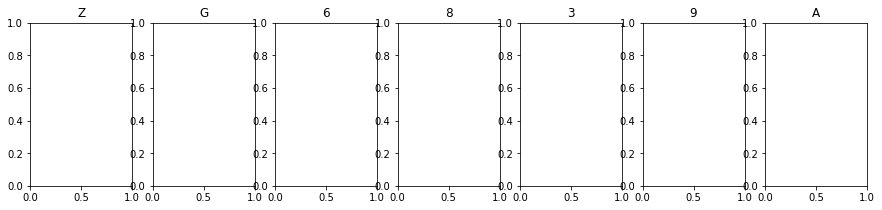

<Figure size 1008x288 with 0 Axes>

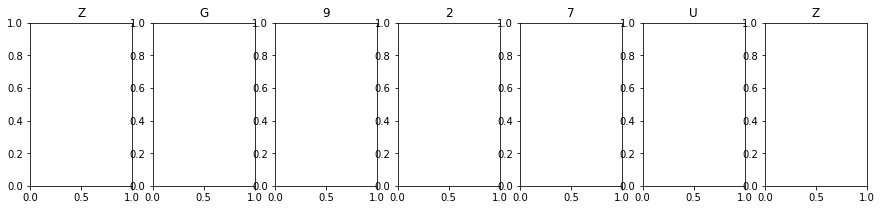

<Figure size 1008x288 with 0 Axes>

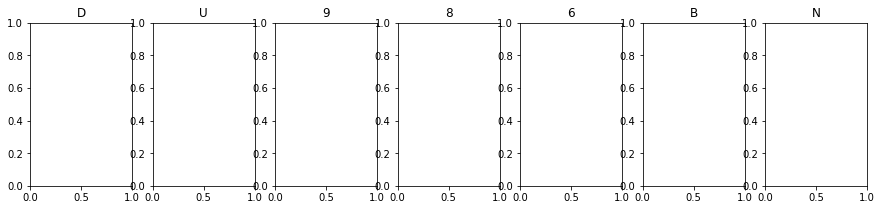

<Figure size 1008x288 with 0 Axes>

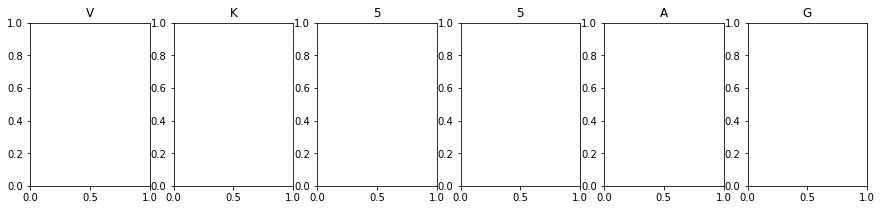

<Figure size 1008x288 with 0 Axes>

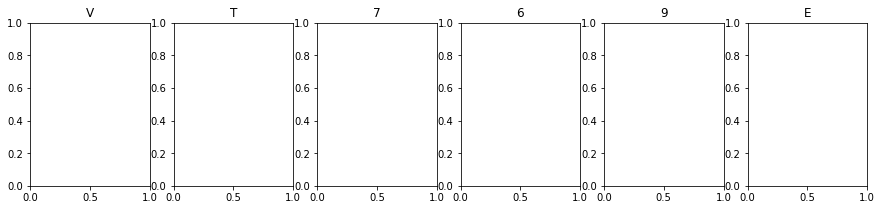

<Figure size 1008x288 with 0 Axes>

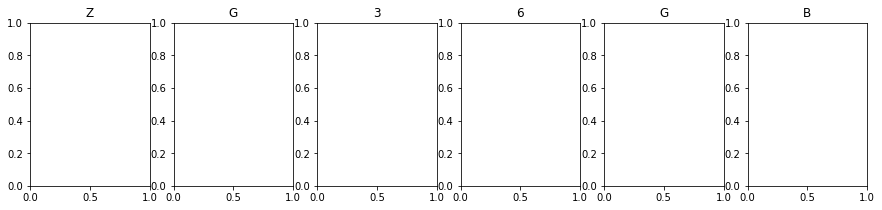

<Figure size 1008x288 with 0 Axes>

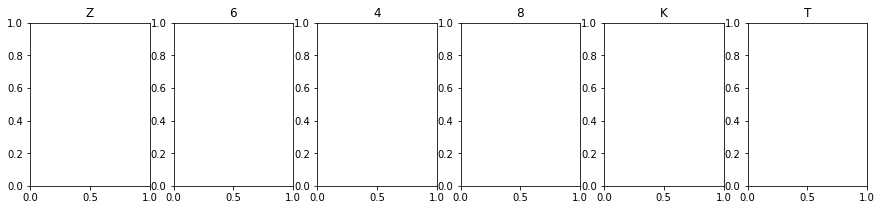

<Figure size 1008x288 with 0 Axes>

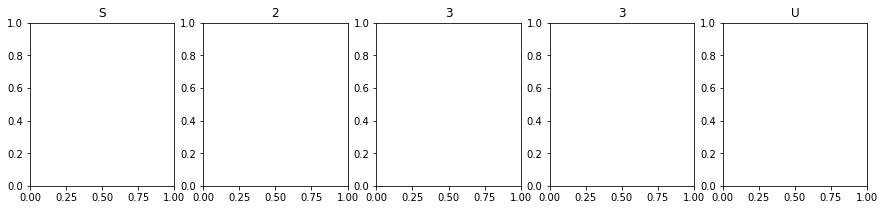

<Figure size 1008x288 with 0 Axes>

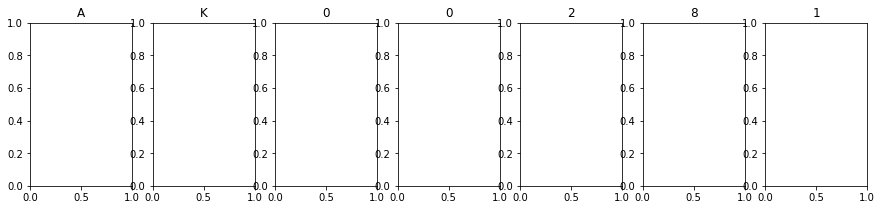

<Figure size 1008x288 with 0 Axes>

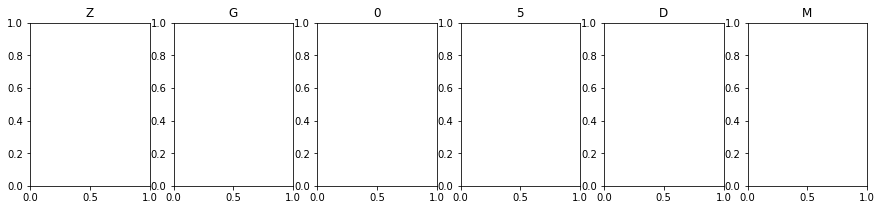

<Figure size 1008x288 with 0 Axes>

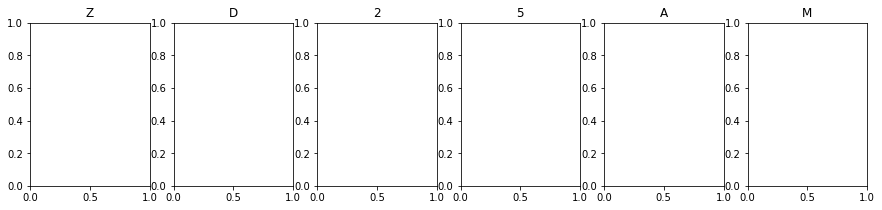

<Figure size 1008x288 with 0 Axes>

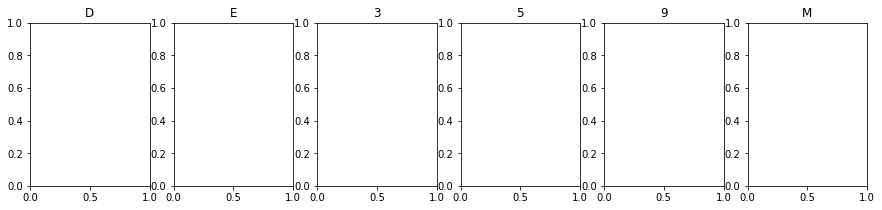

<Figure size 1008x288 with 0 Axes>

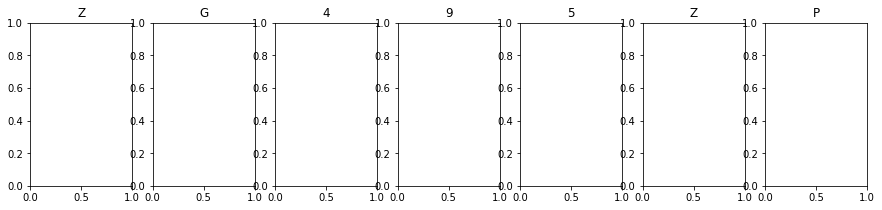

<Figure size 1008x288 with 0 Axes>

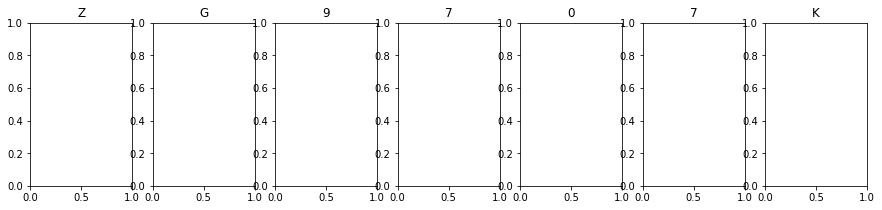

<Figure size 1008x288 with 0 Axes>

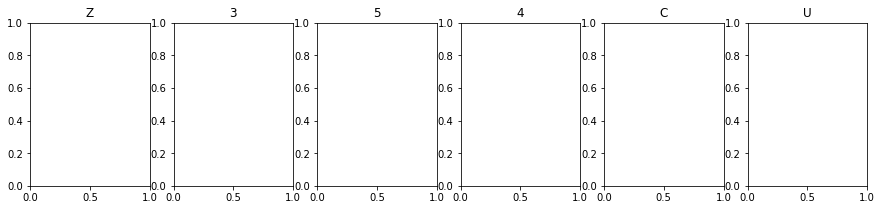

<Figure size 1008x288 with 0 Axes>

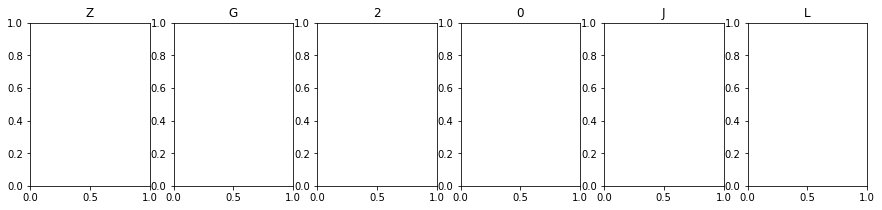

<Figure size 1008x288 with 0 Axes>

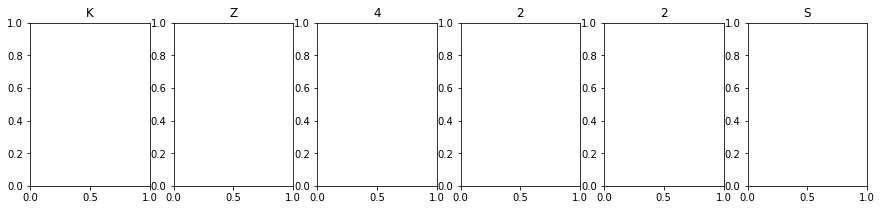

<Figure size 1008x288 with 0 Axes>

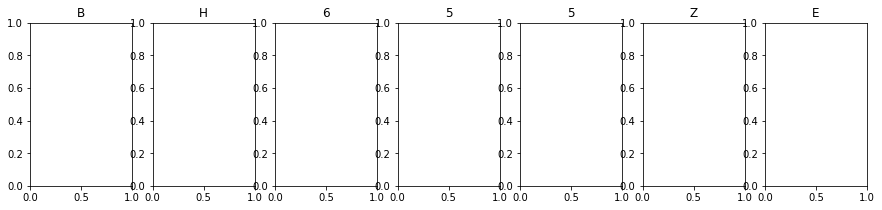

<Figure size 1008x288 with 0 Axes>

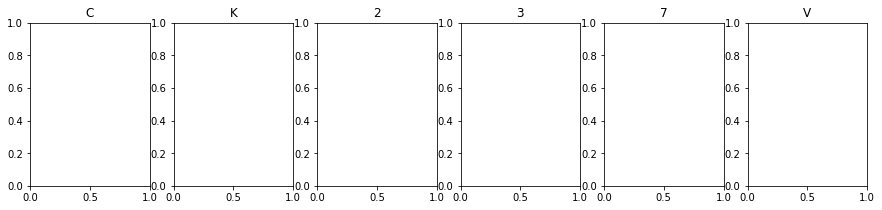

<Figure size 1008x288 with 0 Axes>

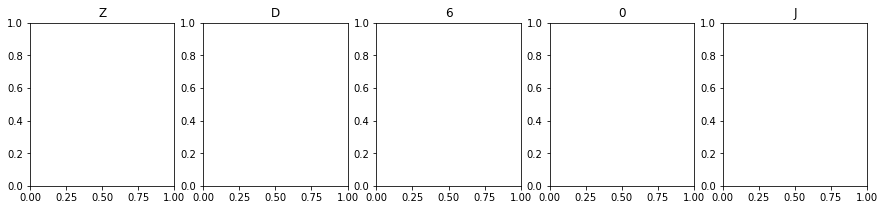

<Figure size 1008x288 with 0 Axes>

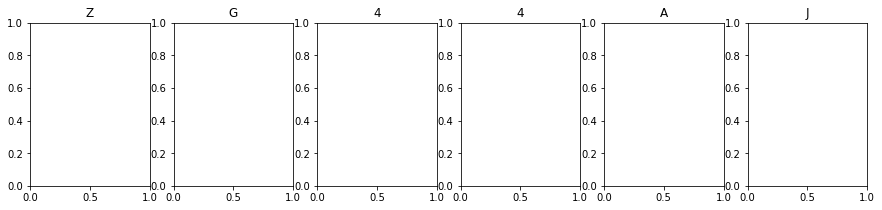

<Figure size 1008x288 with 0 Axes>

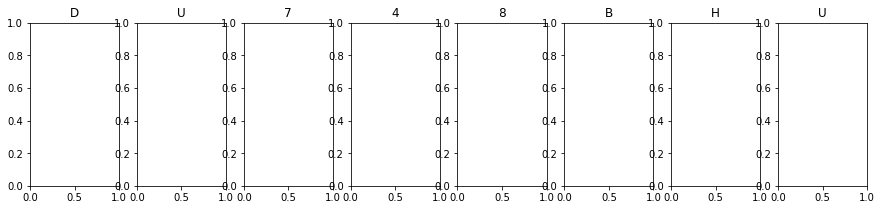

<Figure size 1008x288 with 0 Axes>

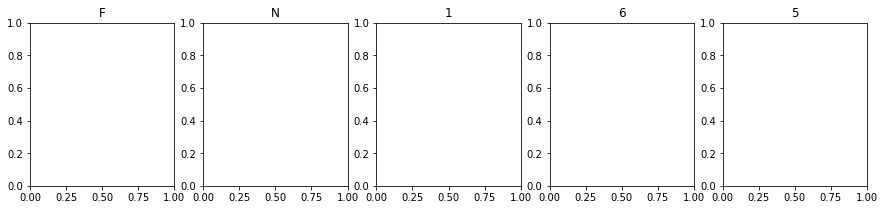

<Figure size 1008x288 with 0 Axes>

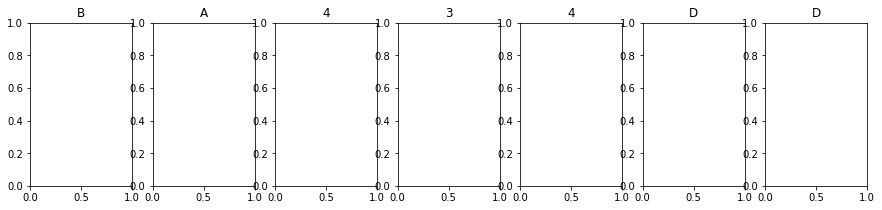

<Figure size 1008x288 with 0 Axes>

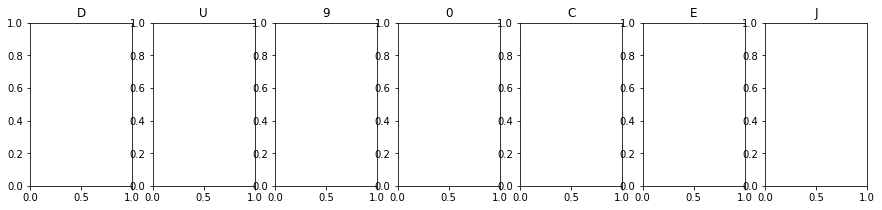

<Figure size 1008x288 with 0 Axes>

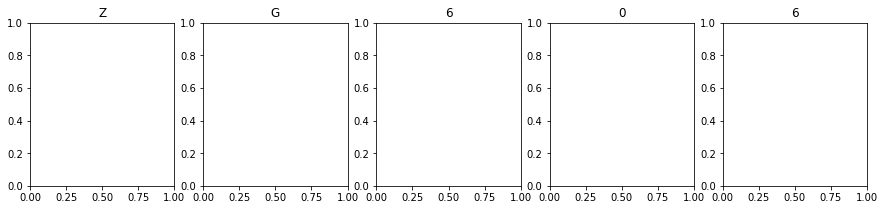

<Figure size 1008x288 with 0 Axes>

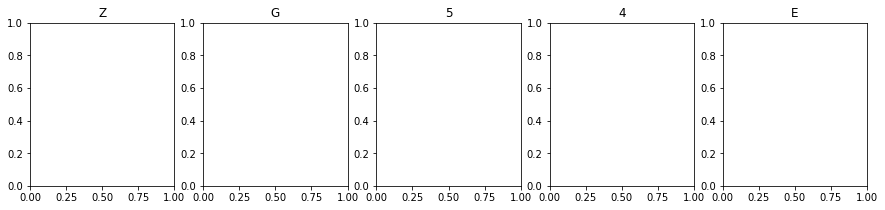

<Figure size 1008x288 with 0 Axes>

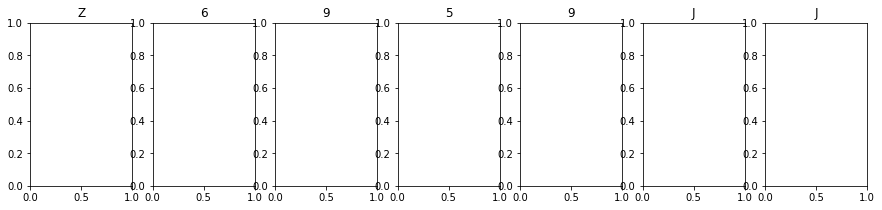

<Figure size 1008x288 with 0 Axes>

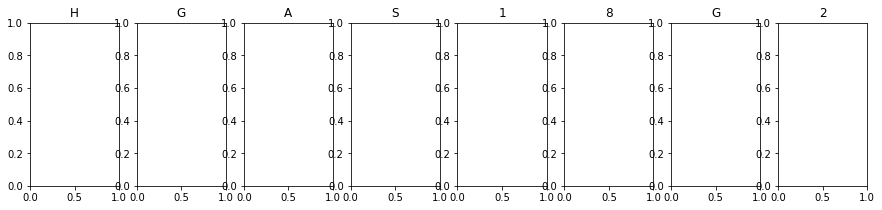

<Figure size 1008x288 with 0 Axes>

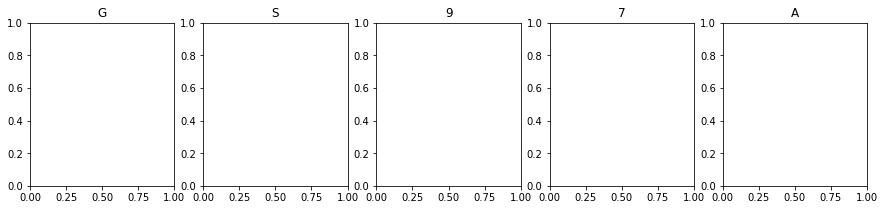

<Figure size 1008x288 with 0 Axes>

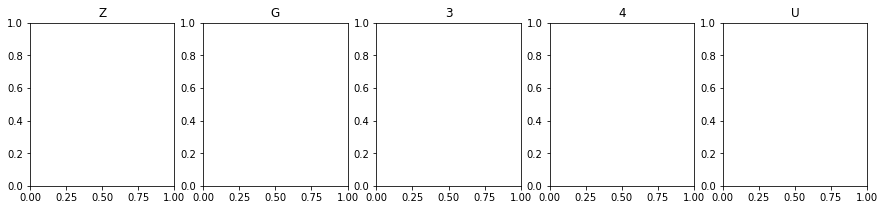

<Figure size 1008x288 with 0 Axes>

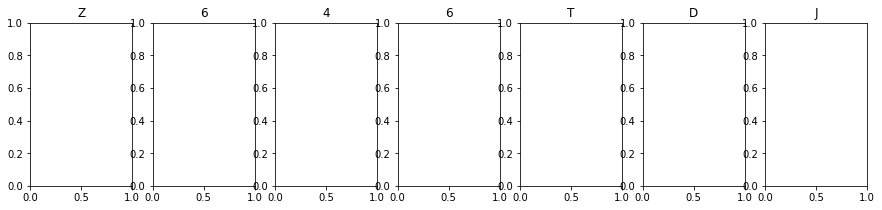

<Figure size 1008x288 with 0 Axes>

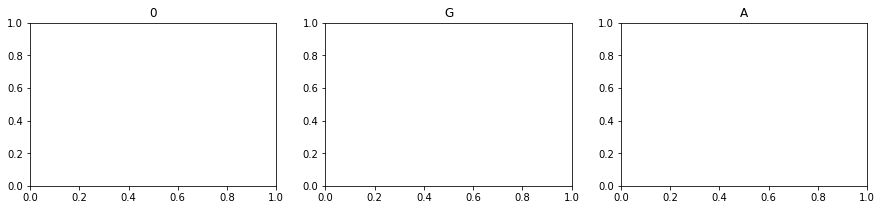

<Figure size 1008x288 with 0 Axes>

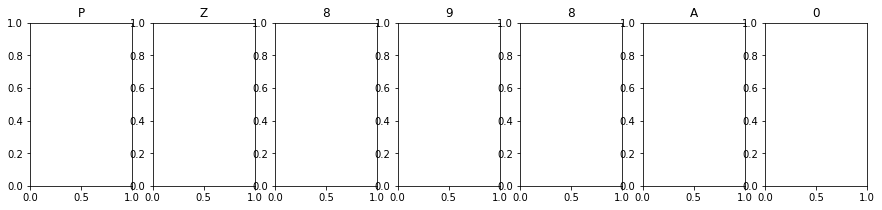

<Figure size 1008x288 with 0 Axes>

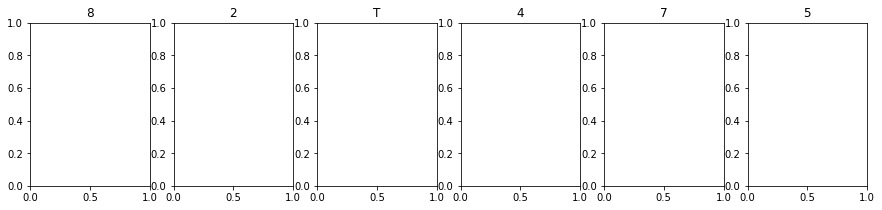

<Figure size 1008x288 with 0 Axes>

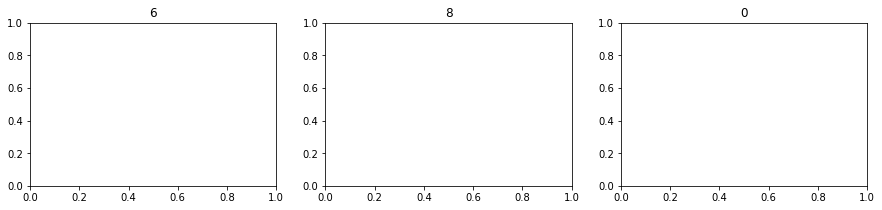

<Figure size 1008x288 with 0 Axes>

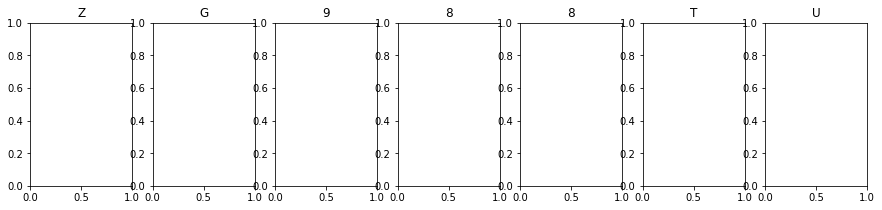

<Figure size 1008x288 with 0 Axes>

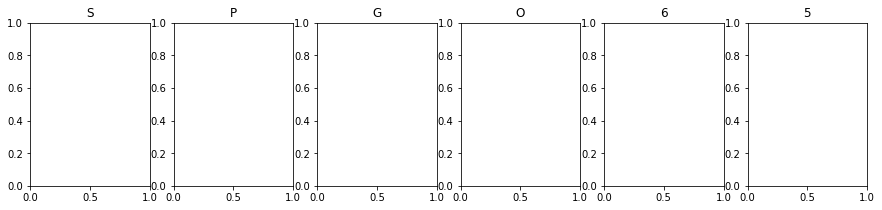

<Figure size 1008x288 with 0 Axes>

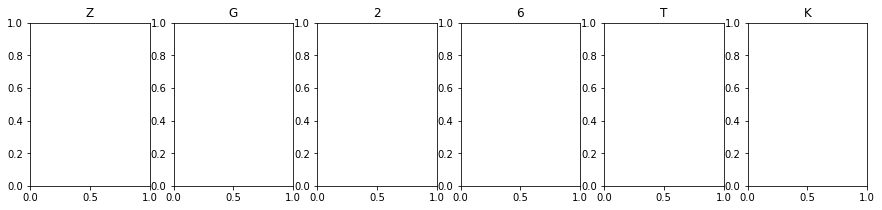

<Figure size 1008x288 with 0 Axes>

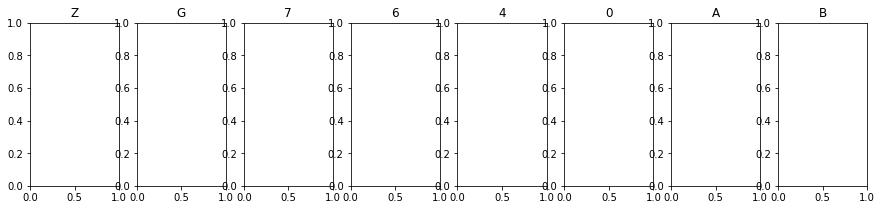

<Figure size 1008x288 with 0 Axes>

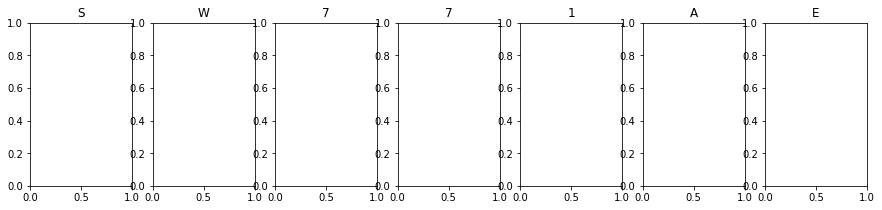

<Figure size 1008x288 with 0 Axes>

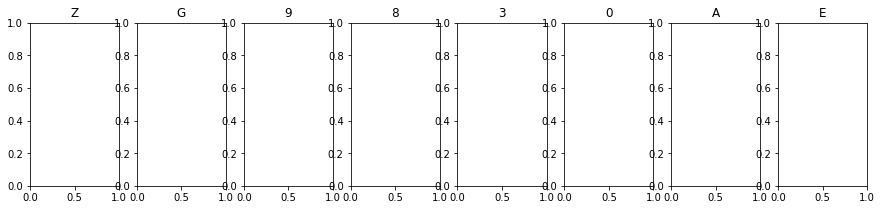

<Figure size 1008x288 with 0 Axes>

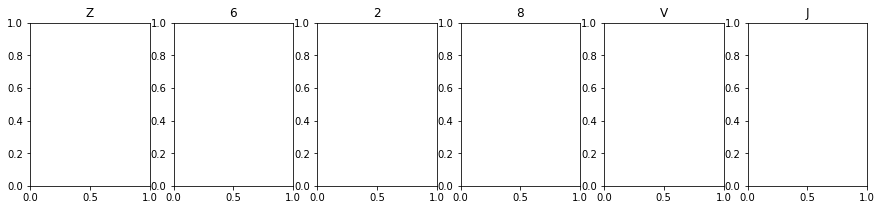

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

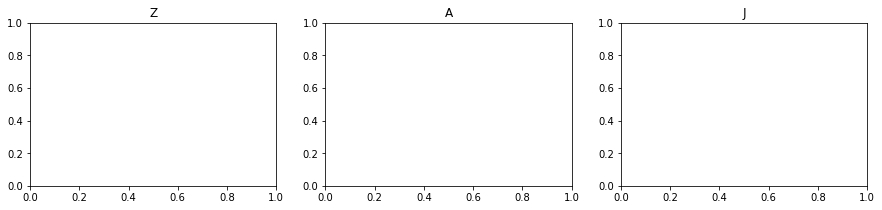

<Figure size 1008x288 with 0 Axes>

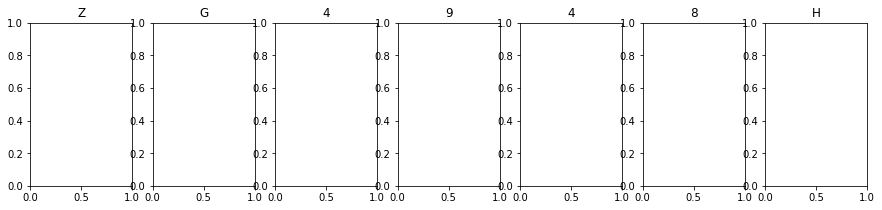

<Figure size 1008x288 with 0 Axes>

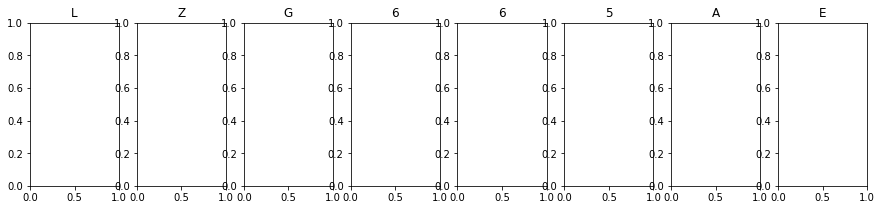

<Figure size 1008x288 with 0 Axes>

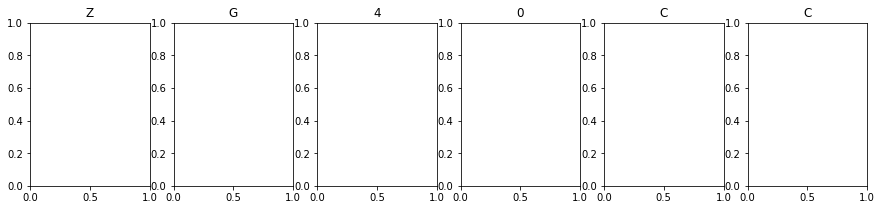

<Figure size 1008x288 with 0 Axes>

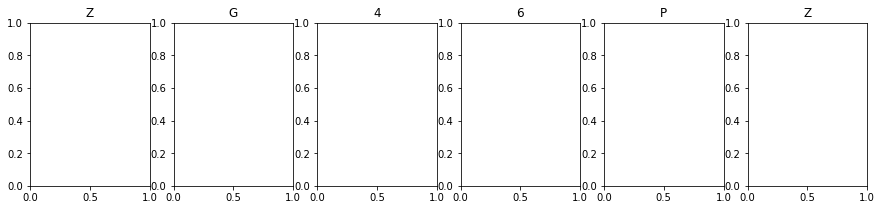

<Figure size 1008x288 with 0 Axes>

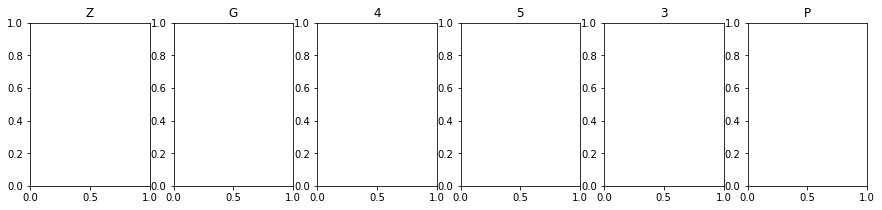

<Figure size 1008x288 with 0 Axes>

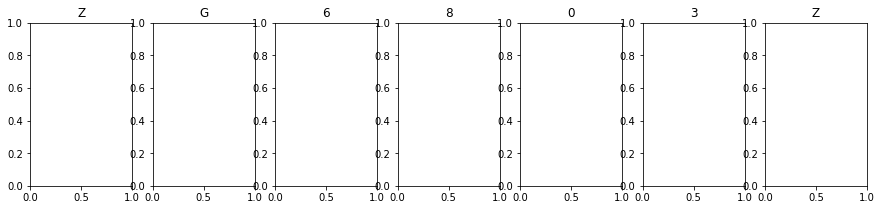

<Figure size 1008x288 with 0 Axes>

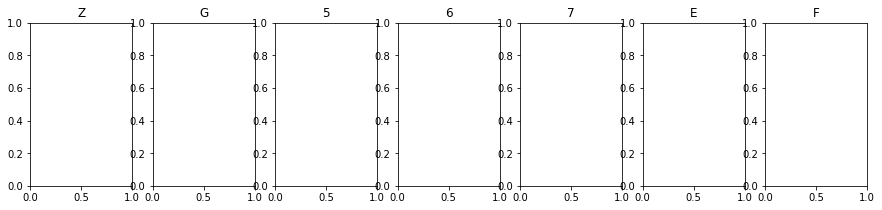

<Figure size 1008x288 with 0 Axes>

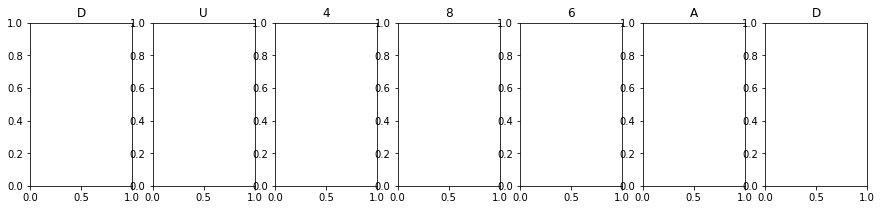

<Figure size 1008x288 with 0 Axes>

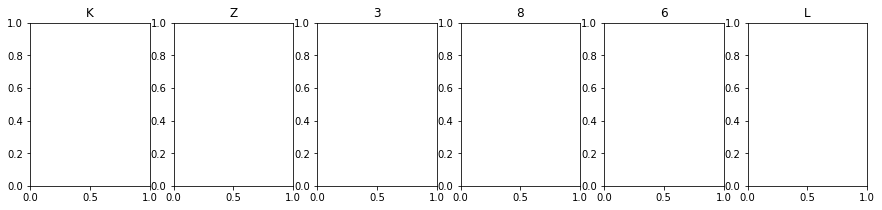

<Figure size 1008x288 with 0 Axes>

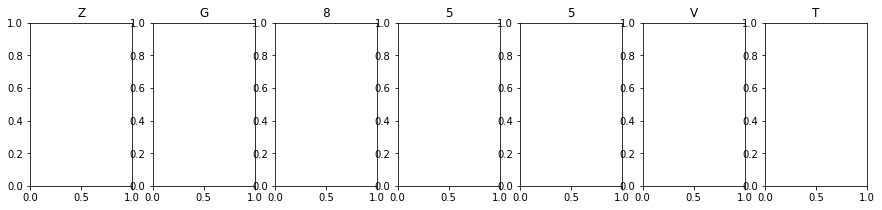

<Figure size 1008x288 with 0 Axes>

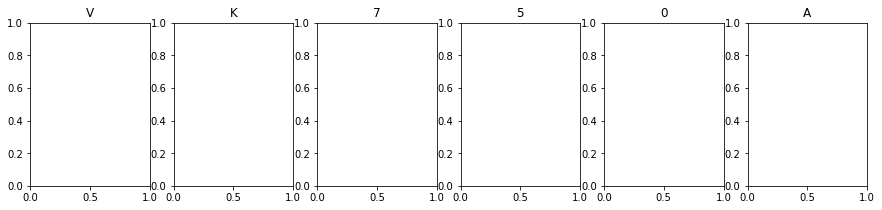

<Figure size 1008x288 with 0 Axes>

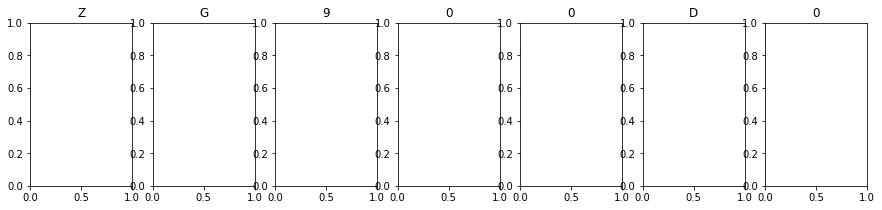

<Figure size 1008x288 with 0 Axes>

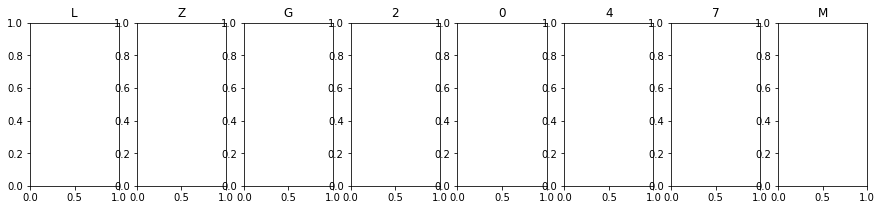

<Figure size 1008x288 with 0 Axes>

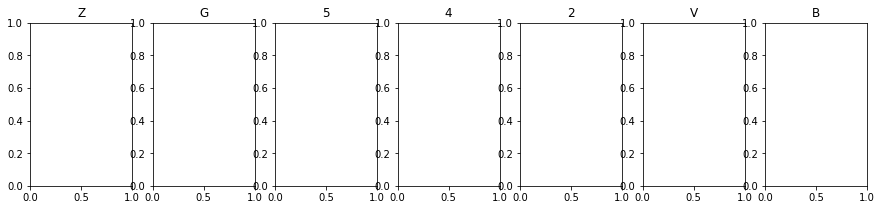

<Figure size 1008x288 with 0 Axes>

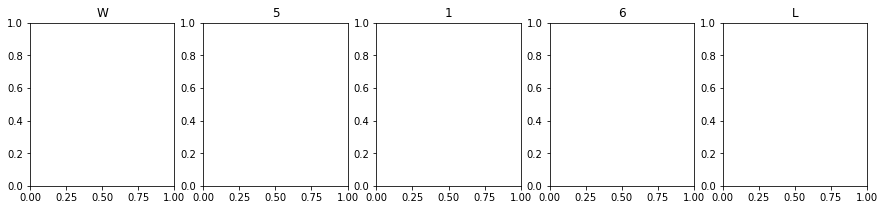

<Figure size 1008x288 with 0 Axes>

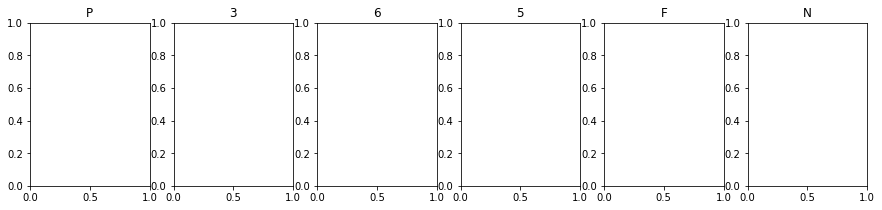

<Figure size 1008x288 with 0 Axes>

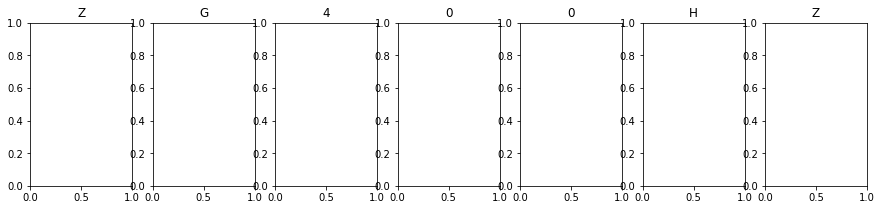

<Figure size 1008x288 with 0 Axes>

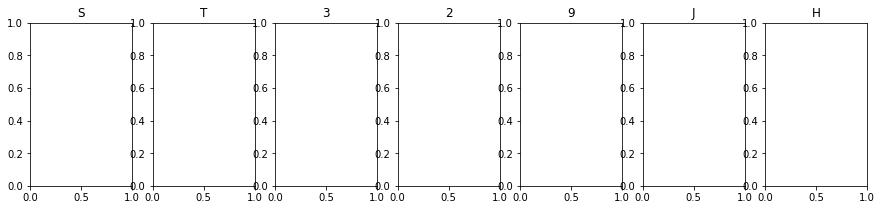

<Figure size 1008x288 with 0 Axes>

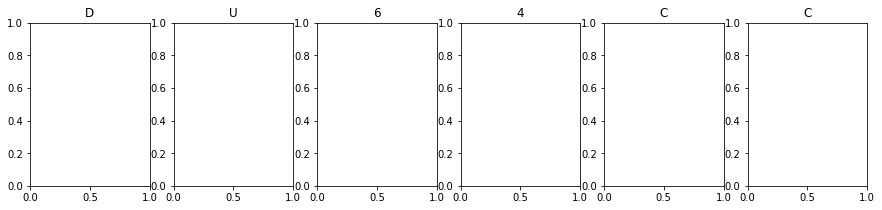

<Figure size 1008x288 with 0 Axes>

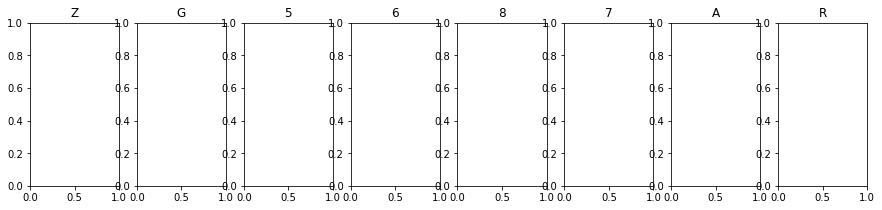

<Figure size 1008x288 with 0 Axes>

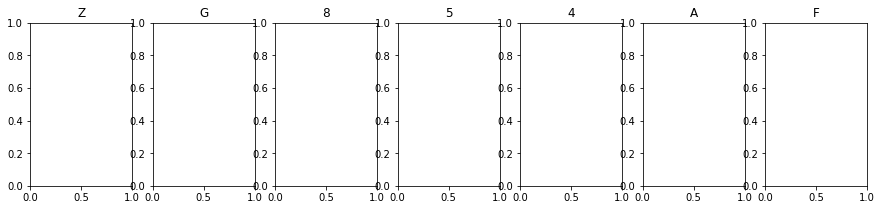

<Figure size 1008x288 with 0 Axes>

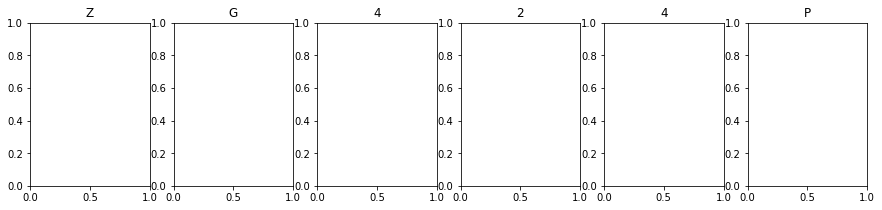

<Figure size 1008x288 with 0 Axes>

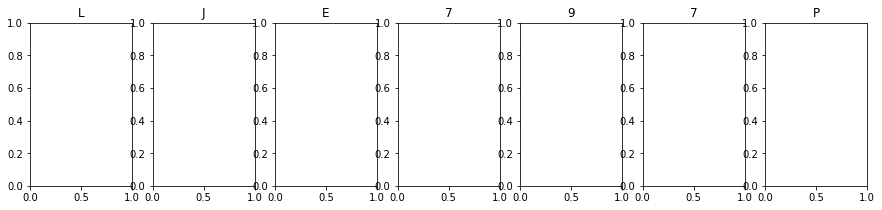

<Figure size 1008x288 with 0 Axes>

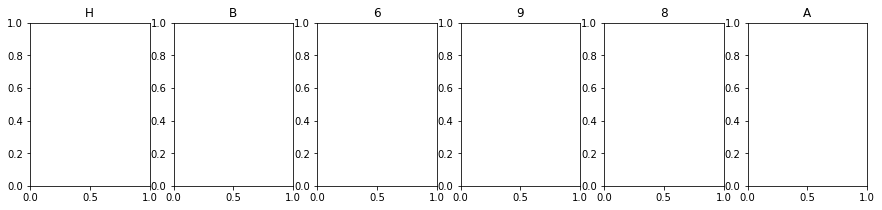

<Figure size 1008x288 with 0 Axes>

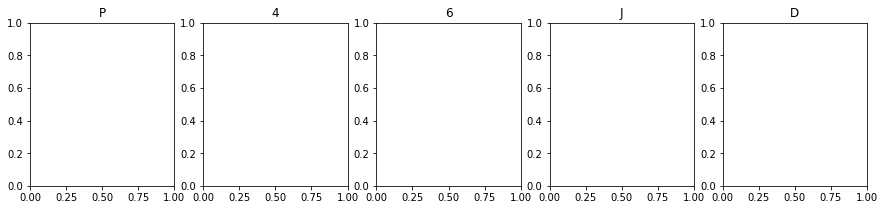

<Figure size 1008x288 with 0 Axes>

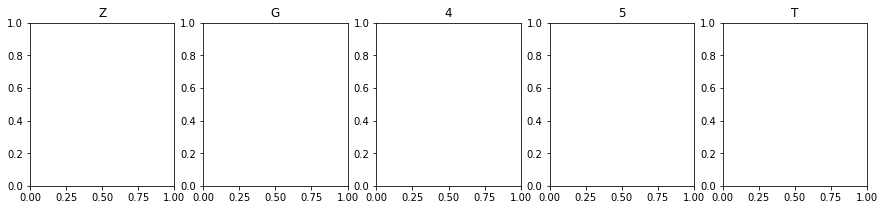

<Figure size 1008x288 with 0 Axes>

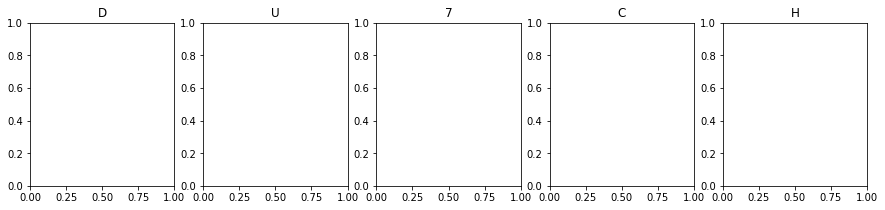

<Figure size 1008x288 with 0 Axes>

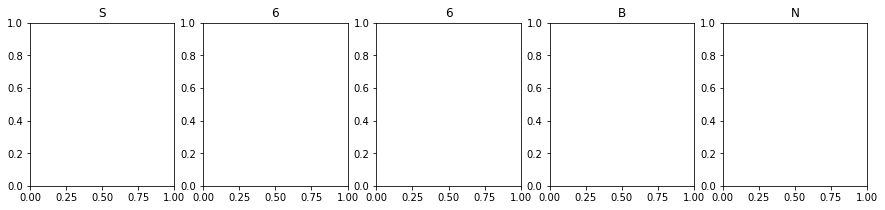

<Figure size 1008x288 with 0 Axes>

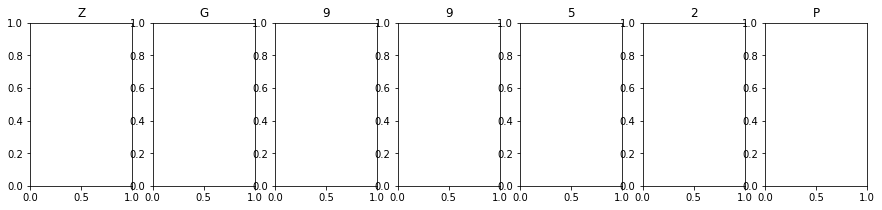

<Figure size 1008x288 with 0 Axes>

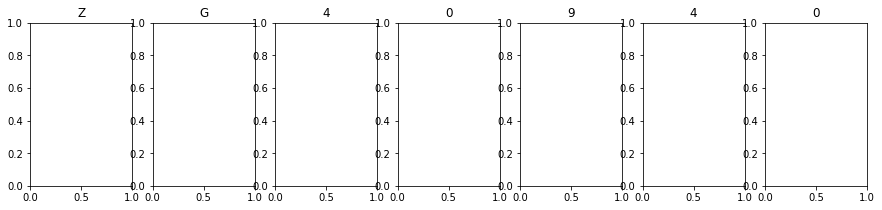

<Figure size 1008x288 with 0 Axes>

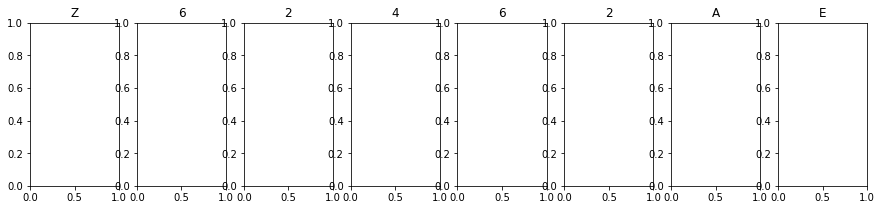

<Figure size 1008x288 with 0 Axes>

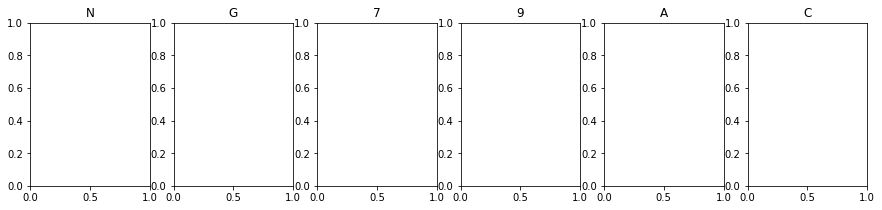

<Figure size 1008x288 with 0 Axes>

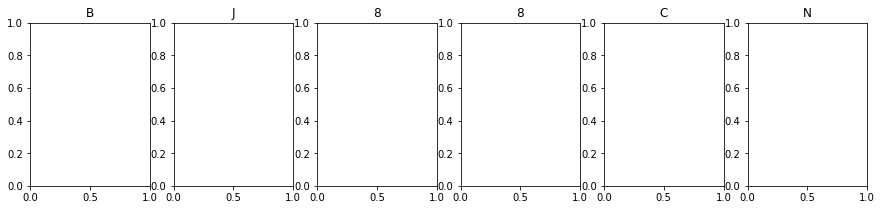

<Figure size 1008x288 with 0 Axes>

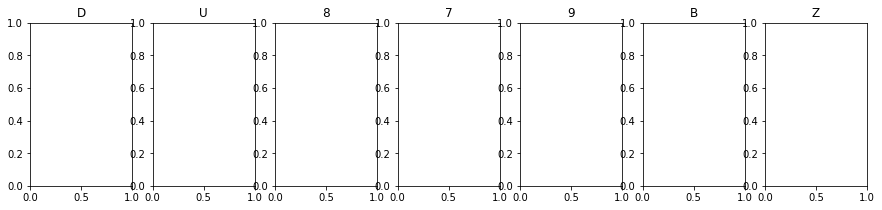

<Figure size 1008x288 with 0 Axes>

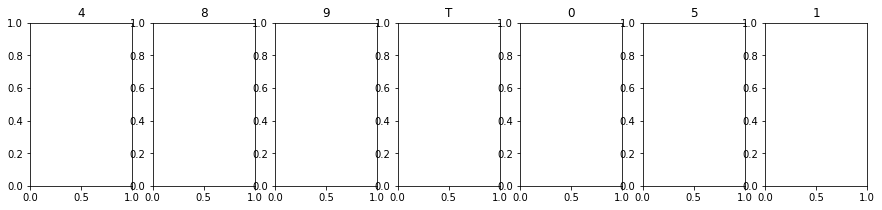

<Figure size 1008x288 with 0 Axes>

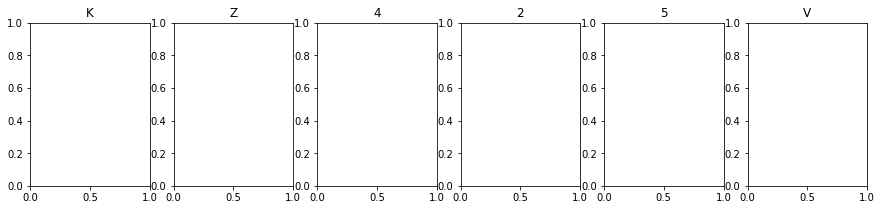

<Figure size 1008x288 with 0 Axes>

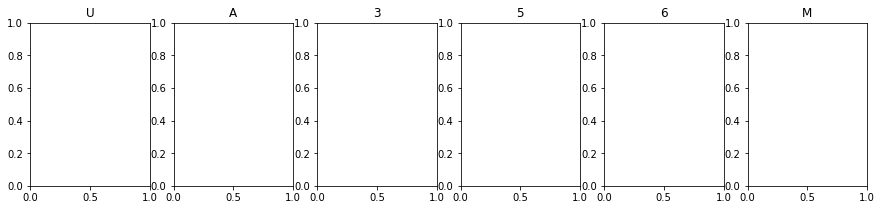

<Figure size 1008x288 with 0 Axes>

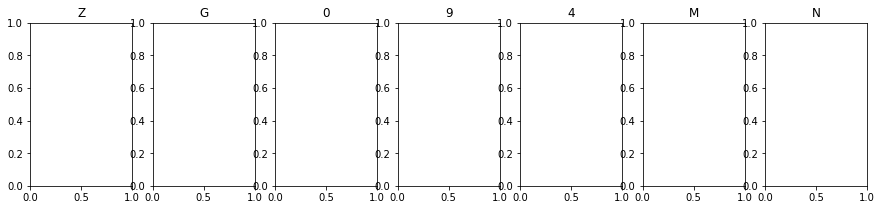

<Figure size 1008x288 with 0 Axes>

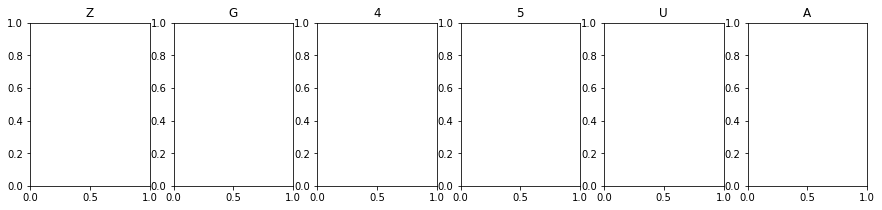

<Figure size 1008x288 with 0 Axes>

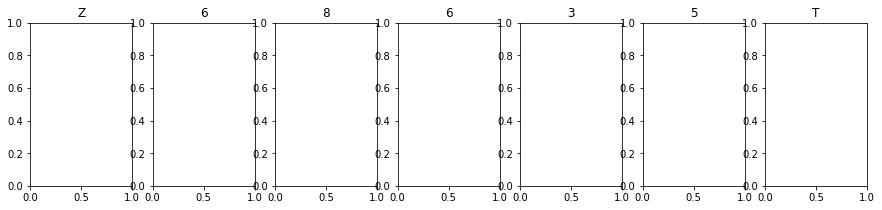

<Figure size 1008x288 with 0 Axes>

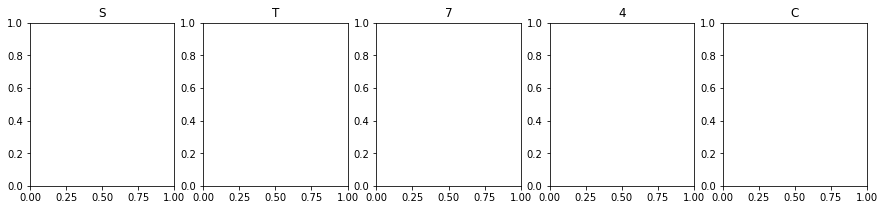

<Figure size 1008x288 with 0 Axes>

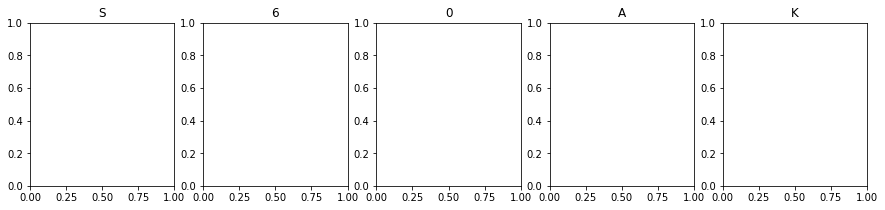

<Figure size 1008x288 with 0 Axes>

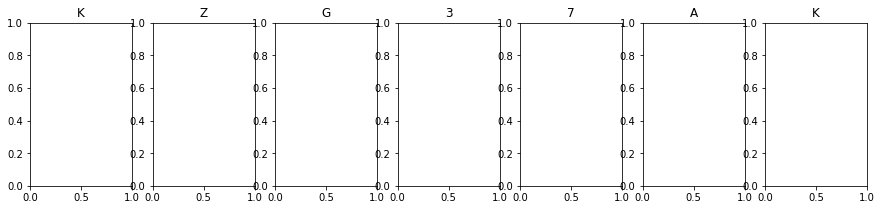

<Figure size 1008x288 with 0 Axes>

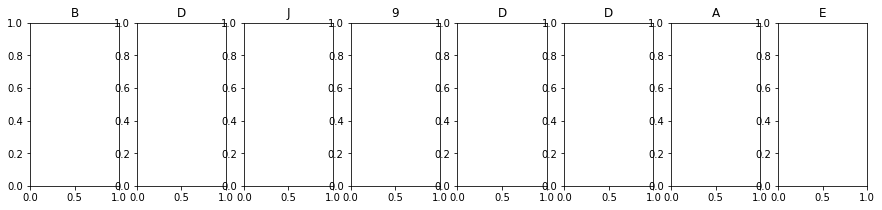

<Figure size 1008x288 with 0 Axes>

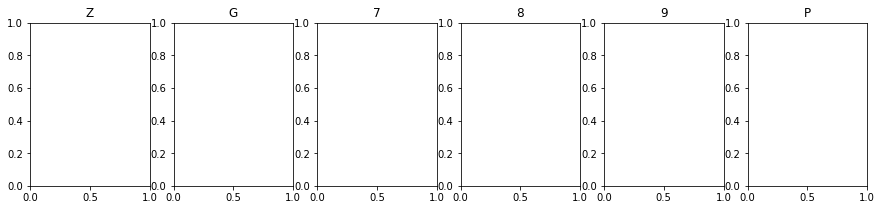

<Figure size 1008x288 with 0 Axes>

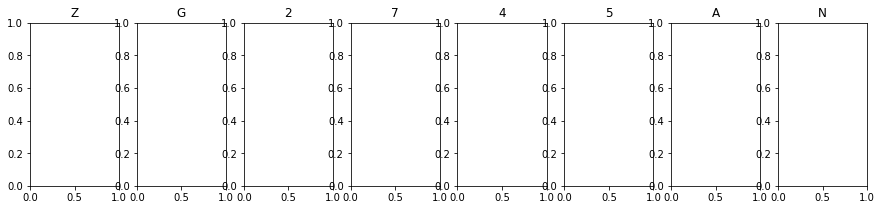

<Figure size 1008x288 with 0 Axes>

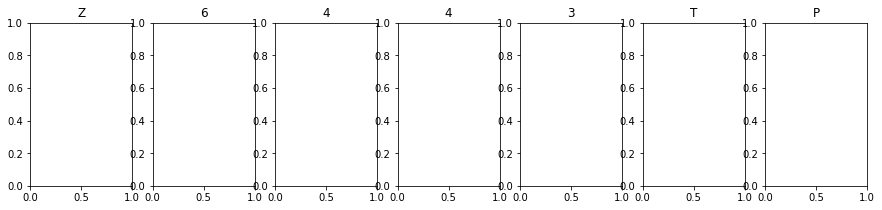

<Figure size 1008x288 with 0 Axes>

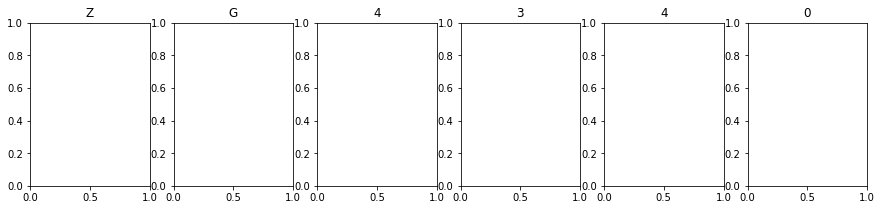

<Figure size 1008x288 with 0 Axes>

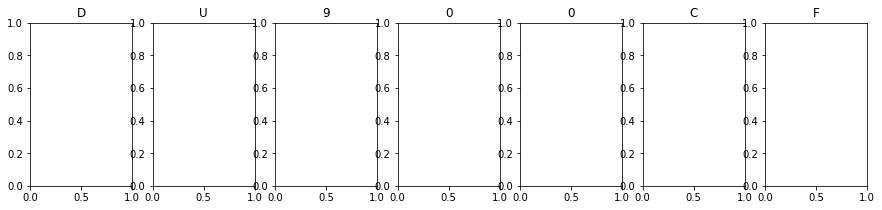

<Figure size 1008x288 with 0 Axes>

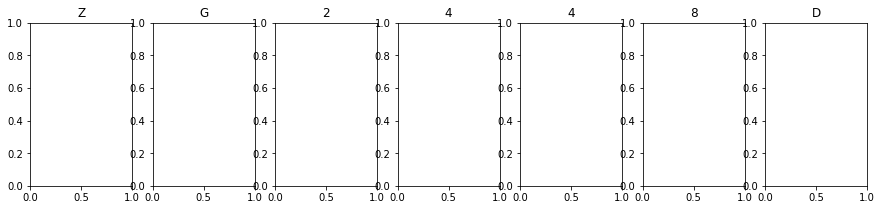

<Figure size 1008x288 with 0 Axes>

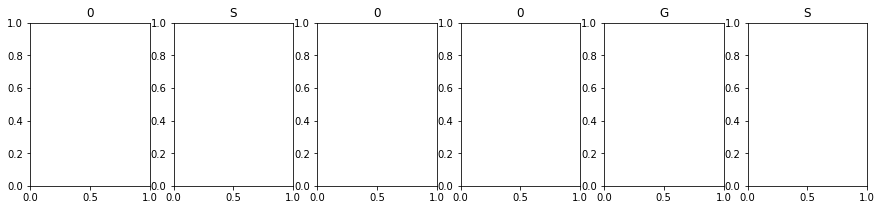

<Figure size 1008x288 with 0 Axes>

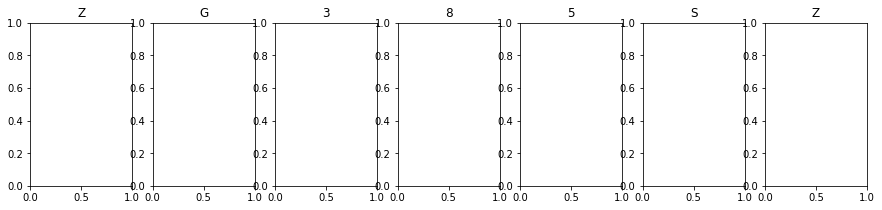

<Figure size 1008x288 with 0 Axes>

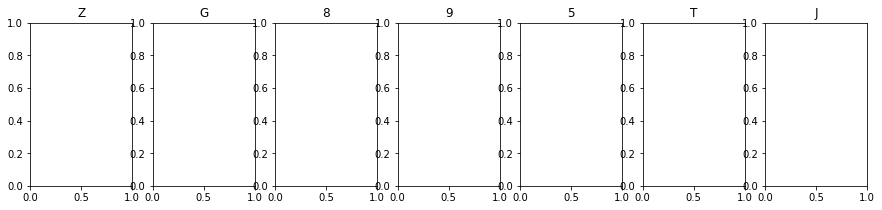

<Figure size 1008x288 with 0 Axes>

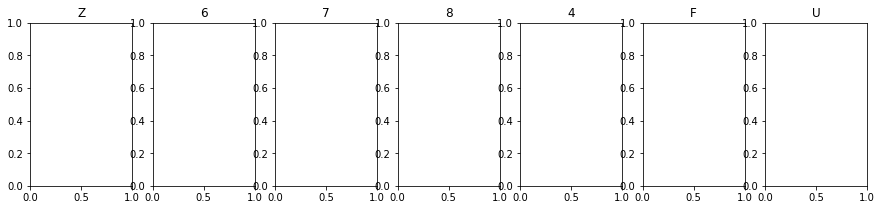

<Figure size 1008x288 with 0 Axes>

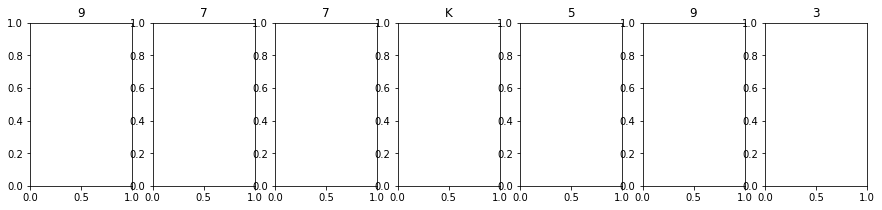

<Figure size 1008x288 with 0 Axes>

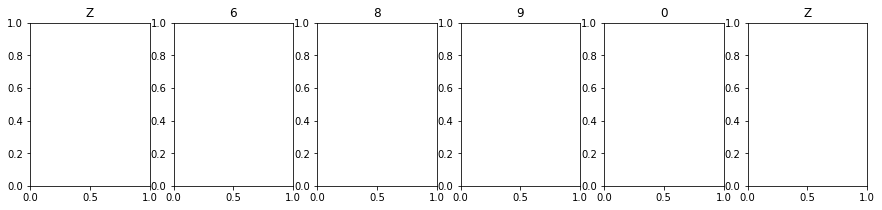

<Figure size 1008x288 with 0 Axes>

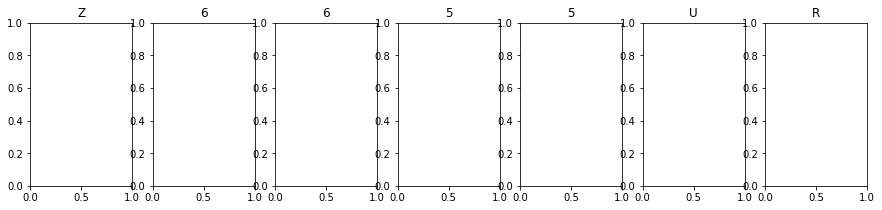

<Figure size 1008x288 with 0 Axes>

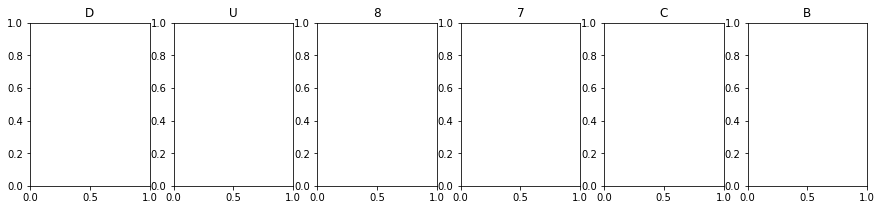

<Figure size 1008x288 with 0 Axes>

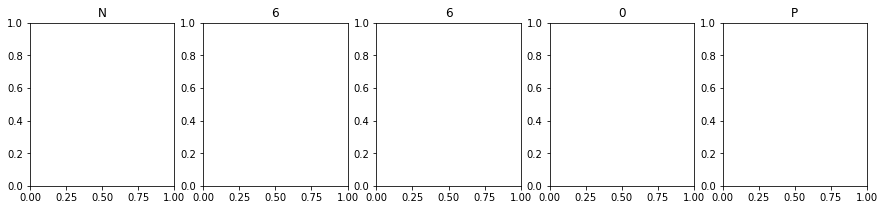

<Figure size 1008x288 with 0 Axes>

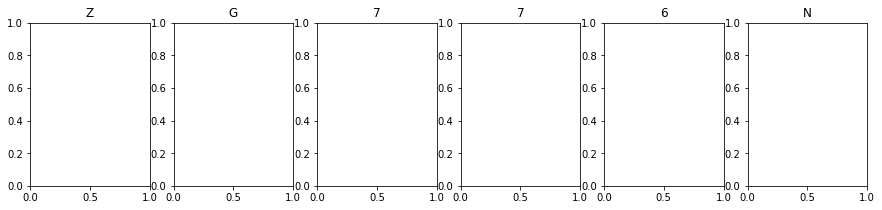

<Figure size 1008x288 with 0 Axes>

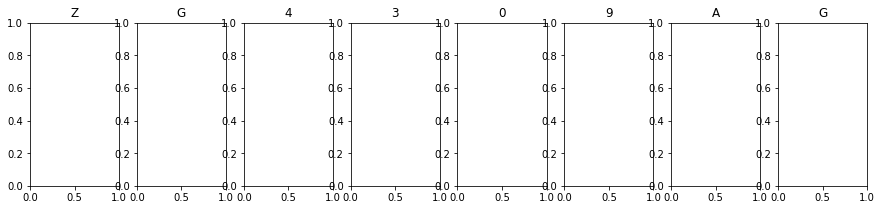

<Figure size 1008x288 with 0 Axes>

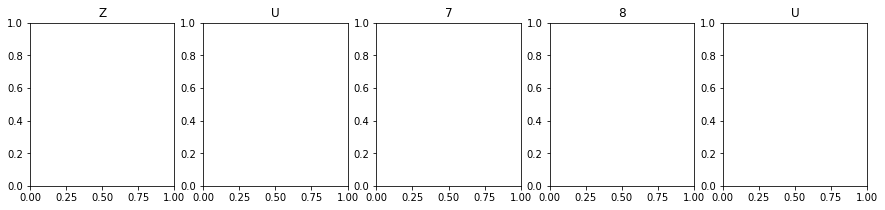

<Figure size 1008x288 with 0 Axes>

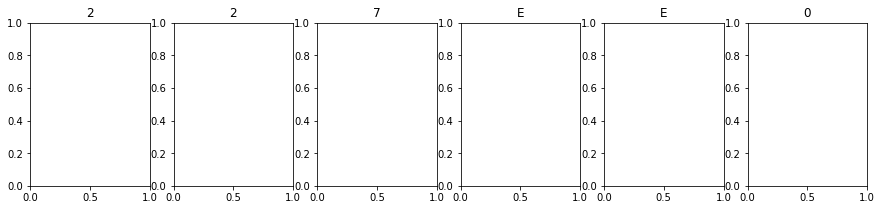

<Figure size 1008x288 with 0 Axes>

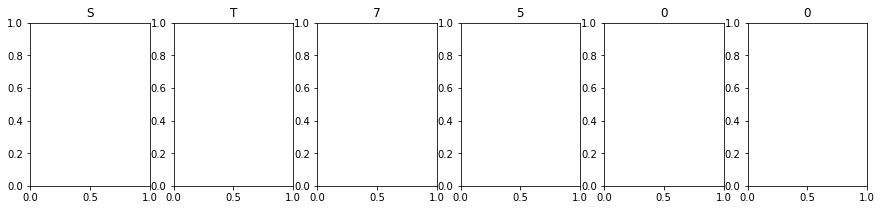

<Figure size 1008x288 with 0 Axes>

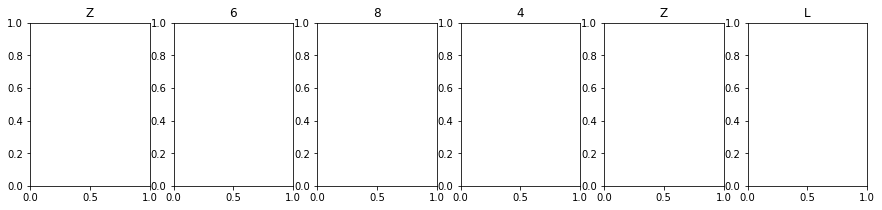

<Figure size 1008x288 with 0 Axes>

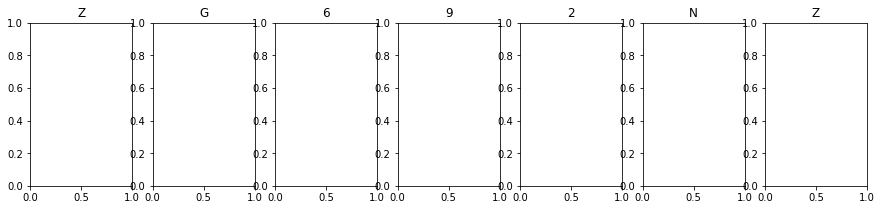

<Figure size 1008x288 with 0 Axes>

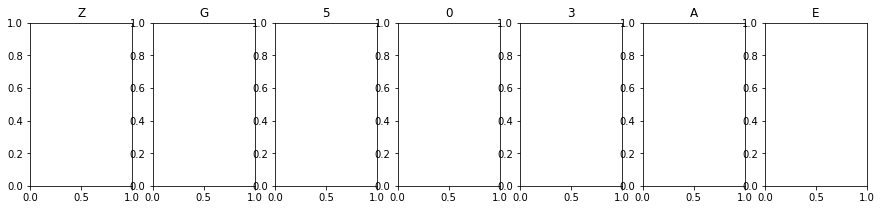

<Figure size 1008x288 with 0 Axes>

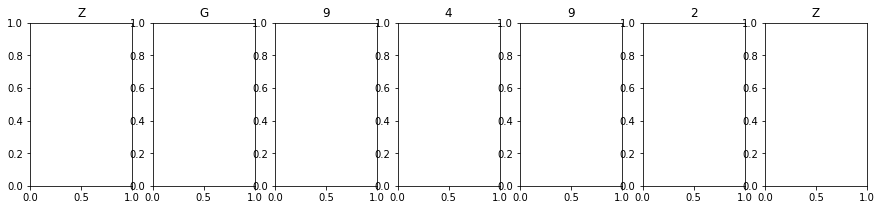

<Figure size 1008x288 with 0 Axes>

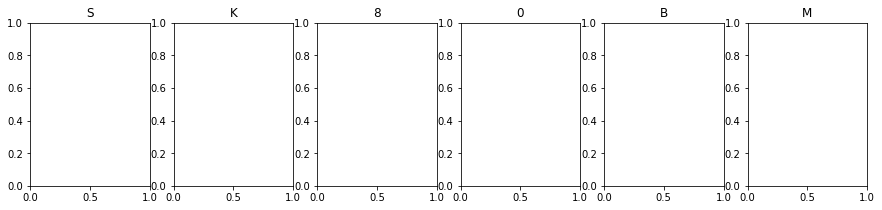

<Figure size 1008x288 with 0 Axes>

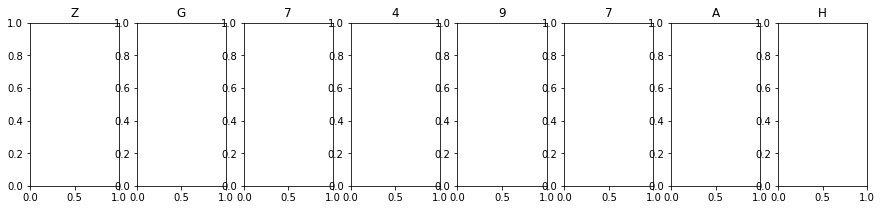

<Figure size 1008x288 with 0 Axes>

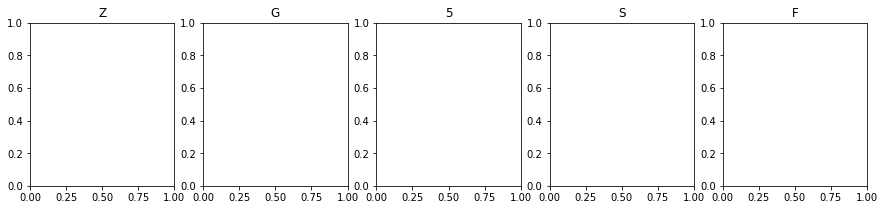

<Figure size 1008x288 with 0 Axes>

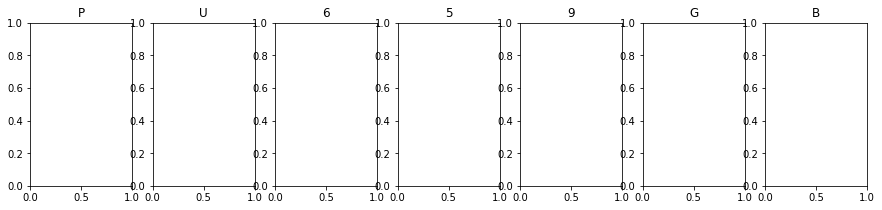

<Figure size 1008x288 with 0 Axes>

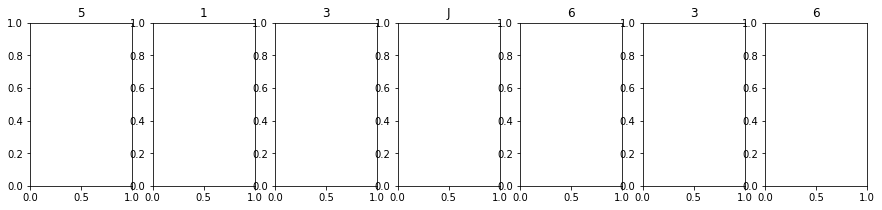

<Figure size 1008x288 with 0 Axes>

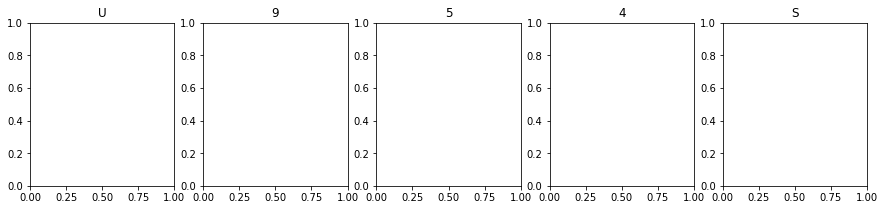

<Figure size 1008x288 with 0 Axes>

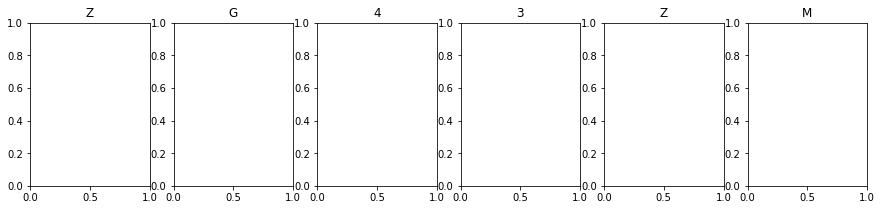

<Figure size 1008x288 with 0 Axes>

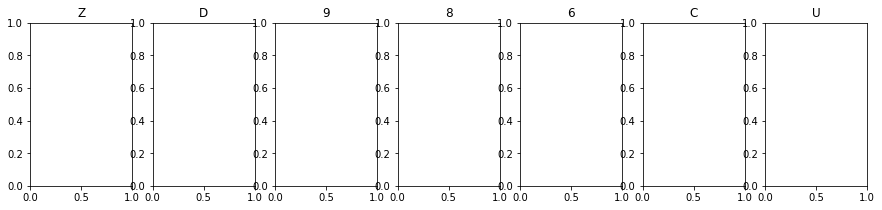

<Figure size 1008x288 with 0 Axes>

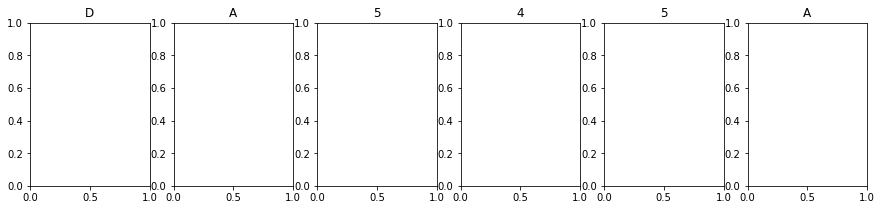

<Figure size 1008x288 with 0 Axes>

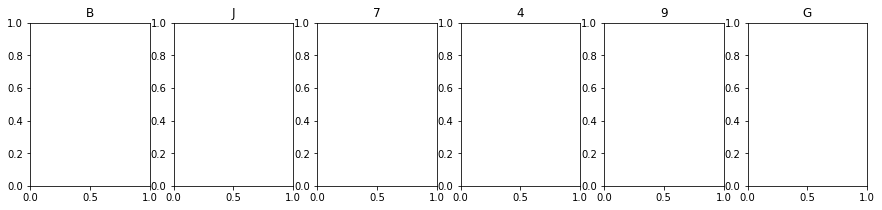

<Figure size 1008x288 with 0 Axes>

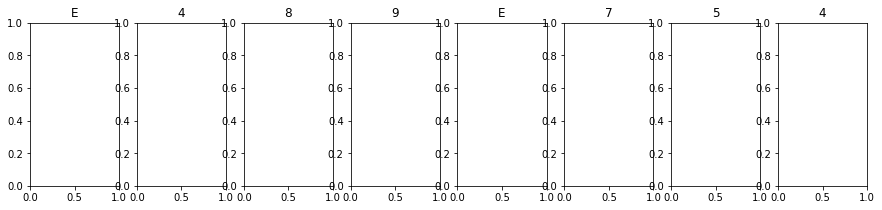

<Figure size 1008x288 with 0 Axes>

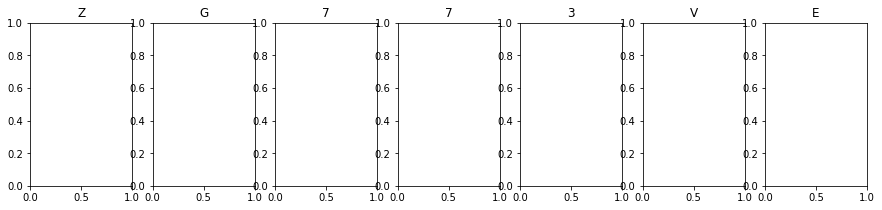

<Figure size 1008x288 with 0 Axes>

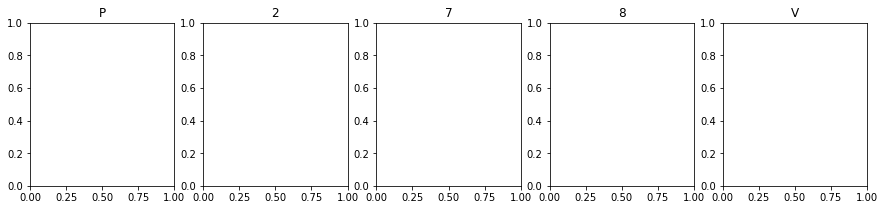

<Figure size 1008x288 with 0 Axes>

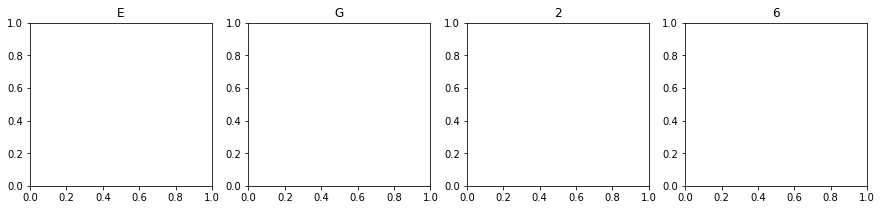

<Figure size 1008x288 with 0 Axes>

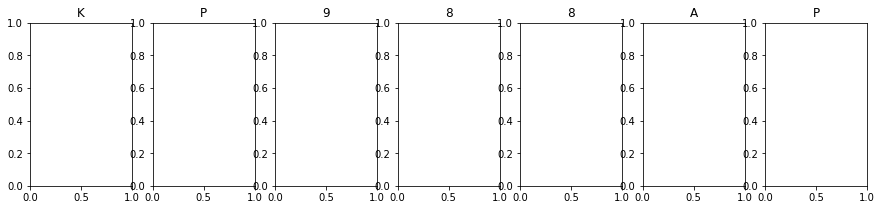

<Figure size 1008x288 with 0 Axes>

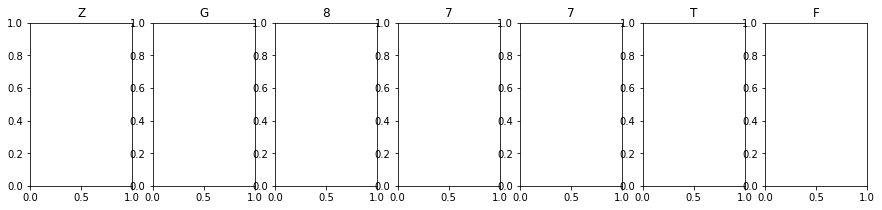

<Figure size 1008x288 with 0 Axes>

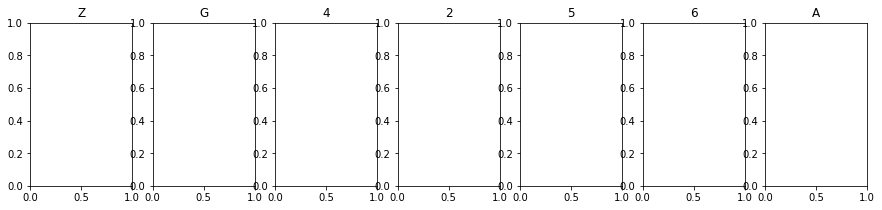

<Figure size 1008x288 with 0 Axes>

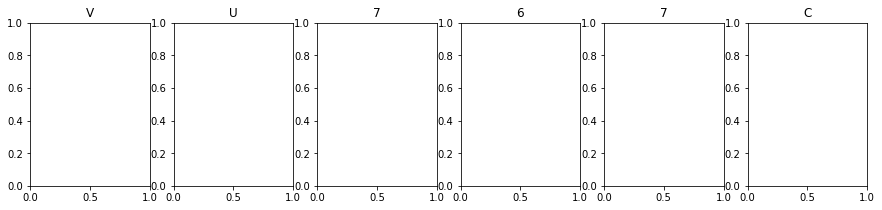

<Figure size 1008x288 with 0 Axes>

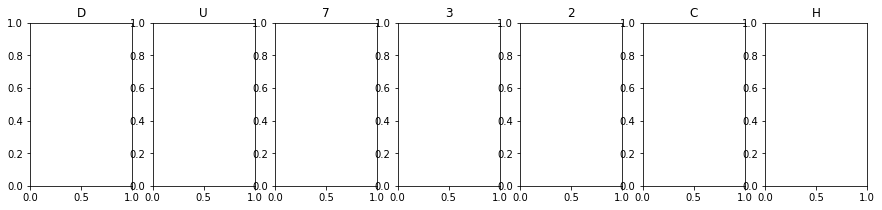

<Figure size 1008x288 with 0 Axes>

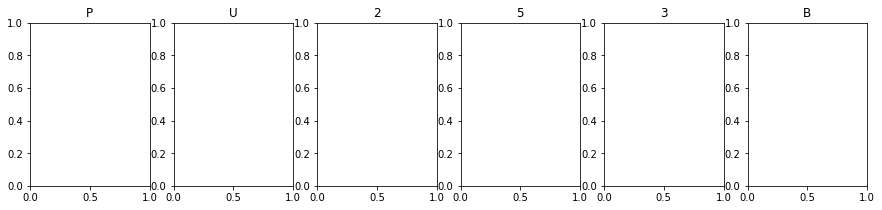

<Figure size 1008x288 with 0 Axes>

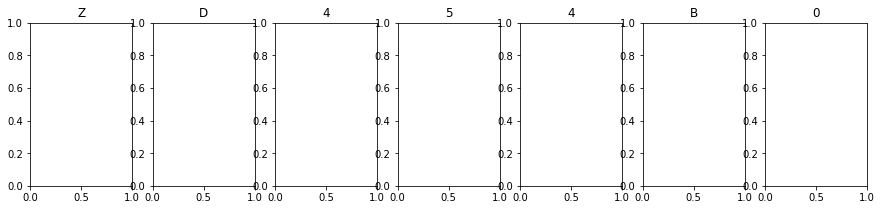

<Figure size 1008x288 with 0 Axes>

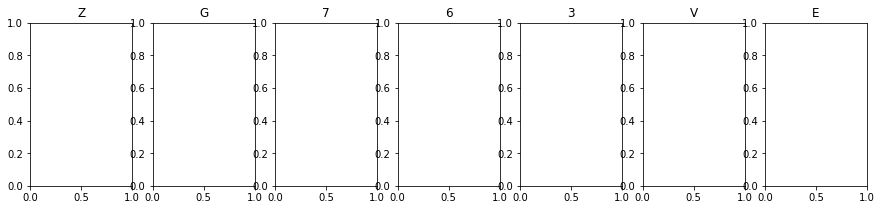

<Figure size 1008x288 with 0 Axes>

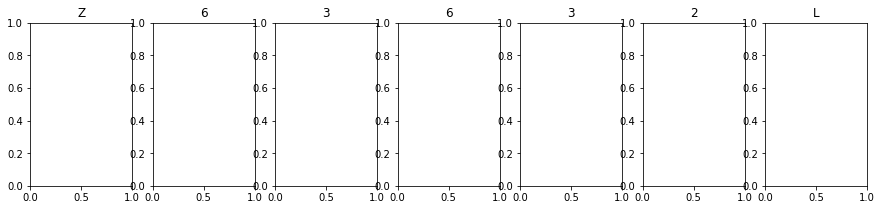

<Figure size 1008x288 with 0 Axes>

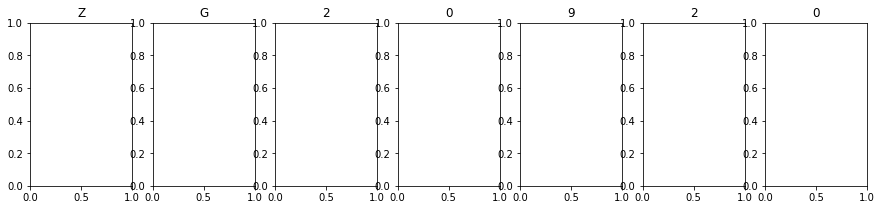

<Figure size 1008x288 with 0 Axes>

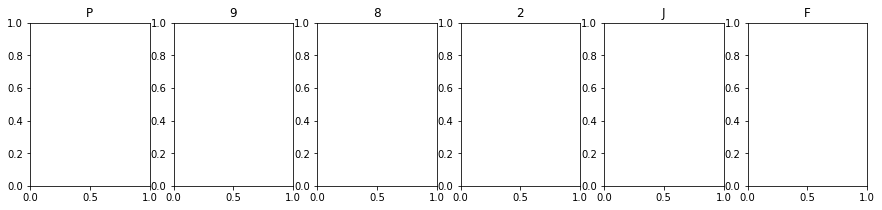

<Figure size 1008x288 with 0 Axes>

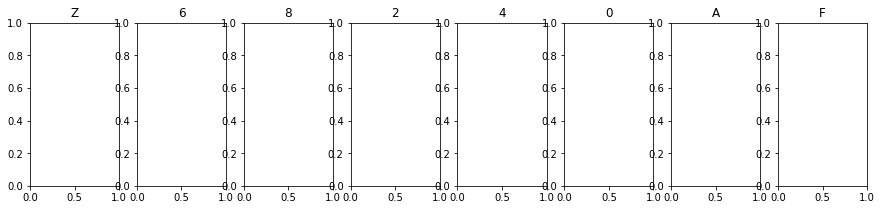

<Figure size 1008x288 with 0 Axes>

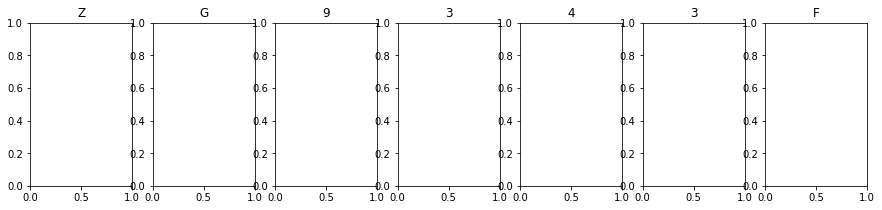

<Figure size 1008x288 with 0 Axes>

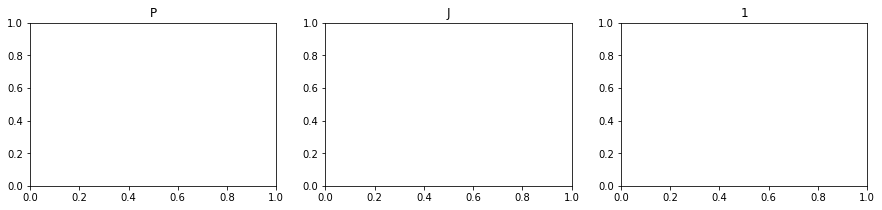

<Figure size 1008x288 with 0 Axes>

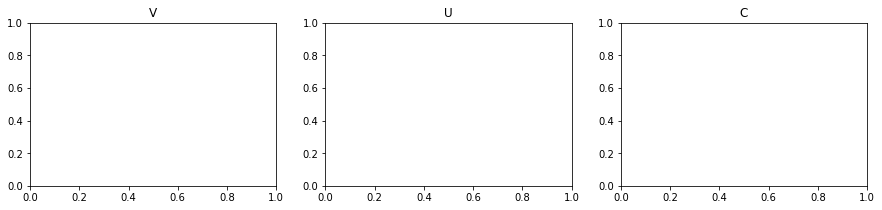

<Figure size 1008x288 with 0 Axes>

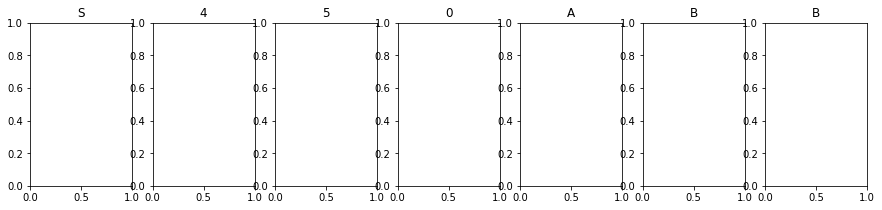

<Figure size 1008x288 with 0 Axes>

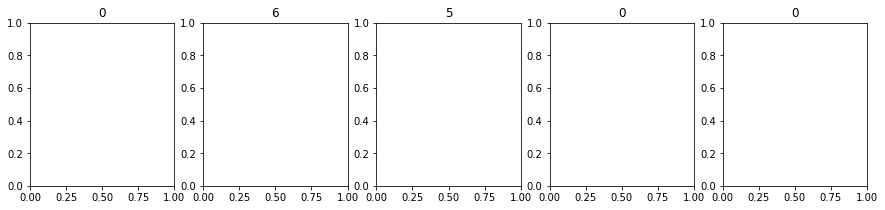

<Figure size 1008x288 with 0 Axes>

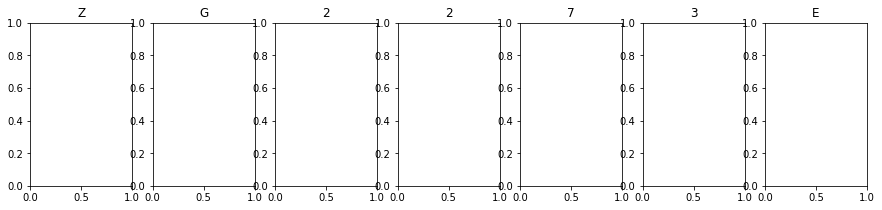

<Figure size 1008x288 with 0 Axes>

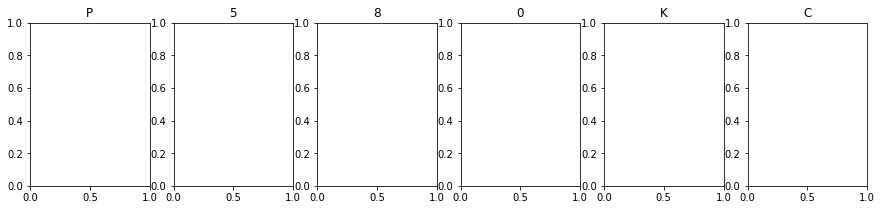

<Figure size 1008x288 with 0 Axes>

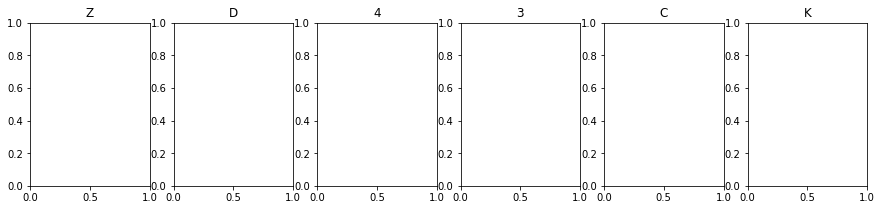

<Figure size 1008x288 with 0 Axes>

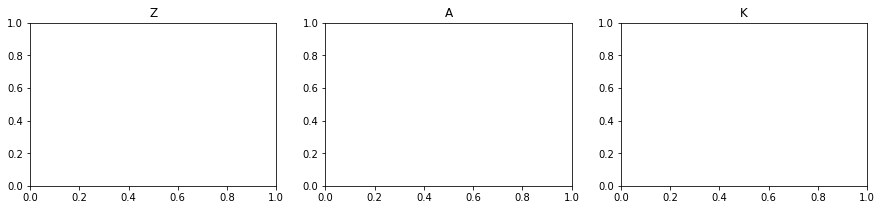

<Figure size 1008x288 with 0 Axes>

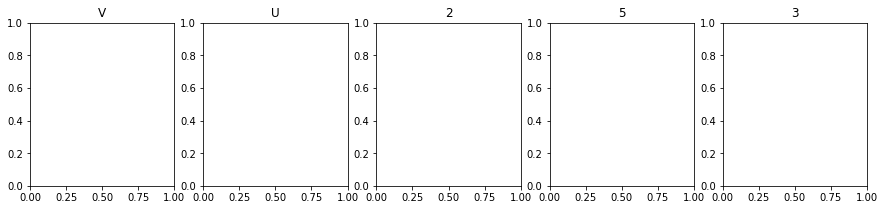

<Figure size 1008x288 with 0 Axes>

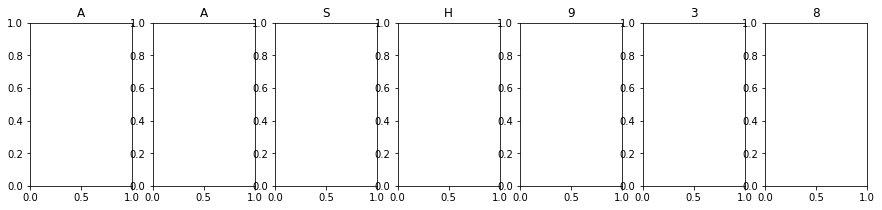

<Figure size 1008x288 with 0 Axes>

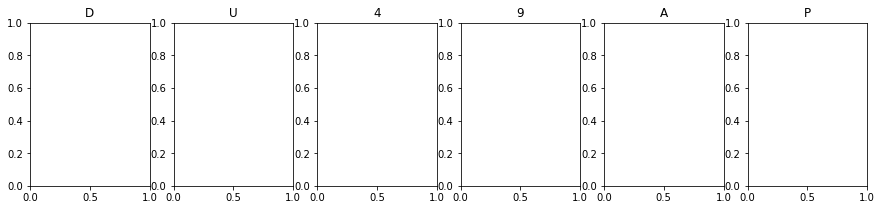

<Figure size 1008x288 with 0 Axes>

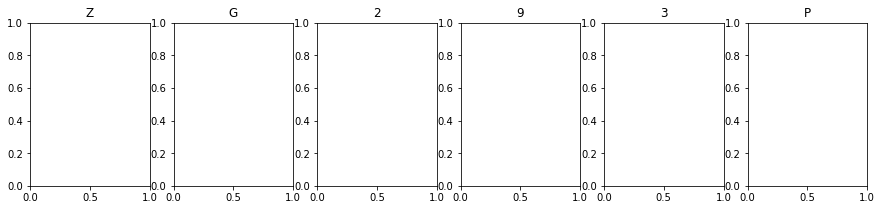

<Figure size 1008x288 with 0 Axes>

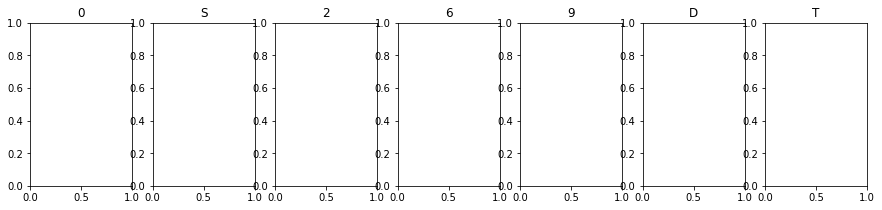

<Figure size 1008x288 with 0 Axes>

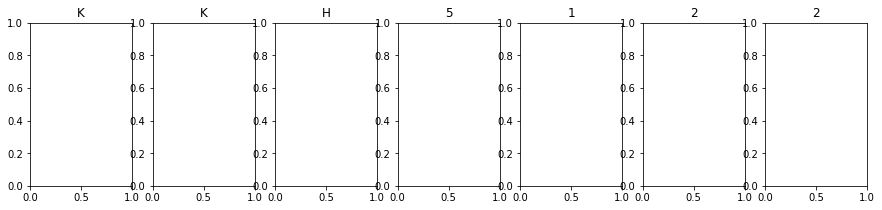

<Figure size 1008x288 with 0 Axes>

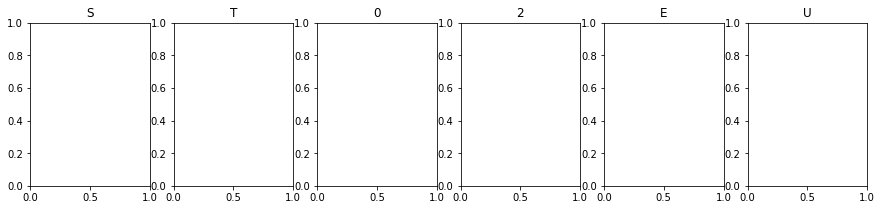

<Figure size 1008x288 with 0 Axes>

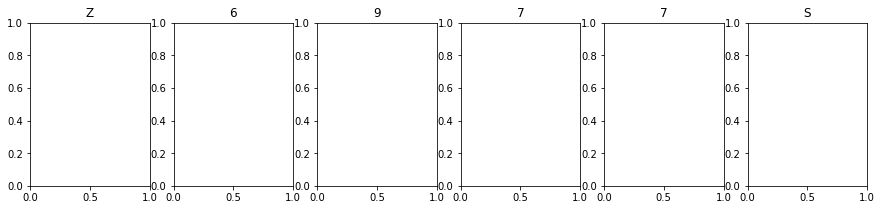

<Figure size 1008x288 with 0 Axes>

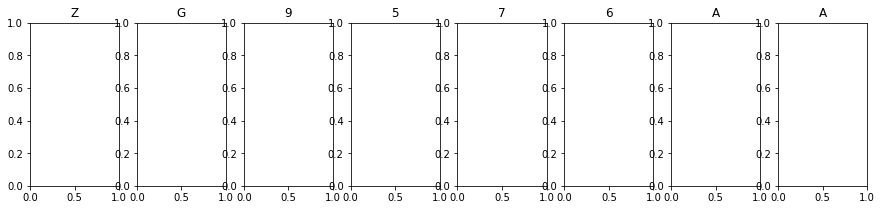

<Figure size 1008x288 with 0 Axes>

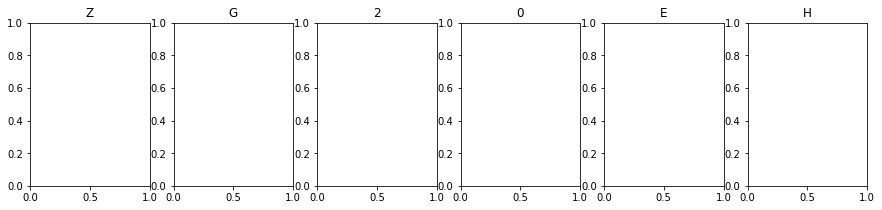

<Figure size 1008x288 with 0 Axes>

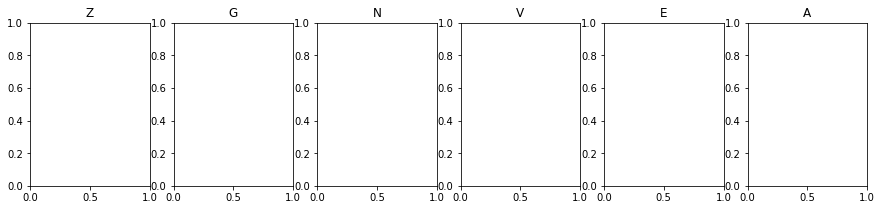

<Figure size 1008x288 with 0 Axes>

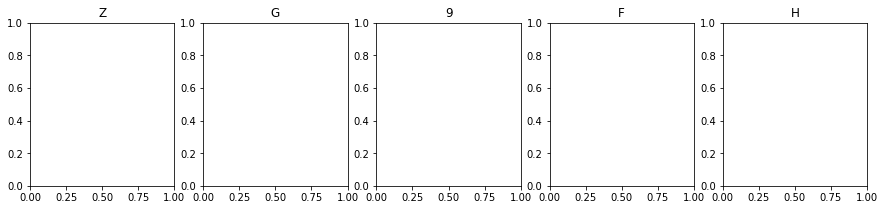

<Figure size 1008x288 with 0 Axes>

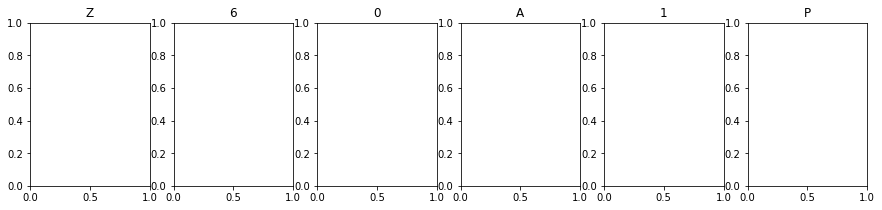

<Figure size 1008x288 with 0 Axes>

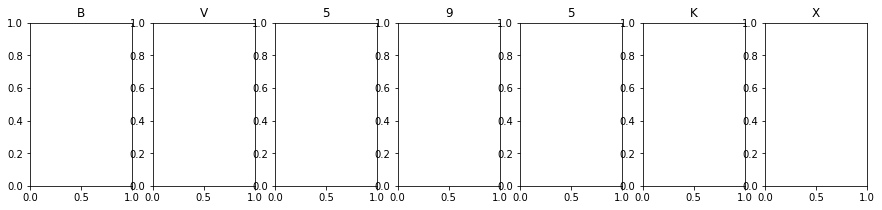

<Figure size 1008x288 with 0 Axes>

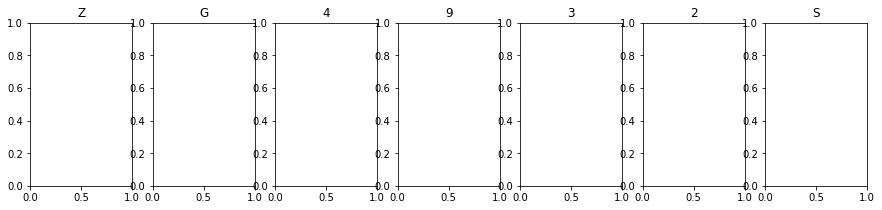

<Figure size 1008x288 with 0 Axes>

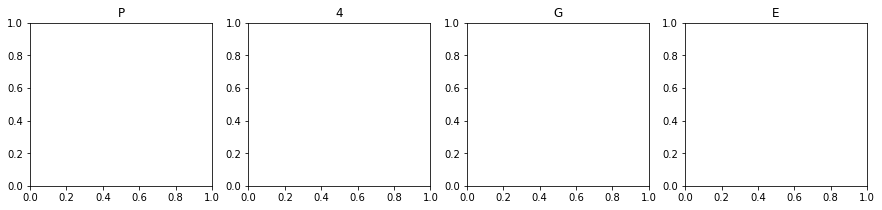

<Figure size 1008x288 with 0 Axes>

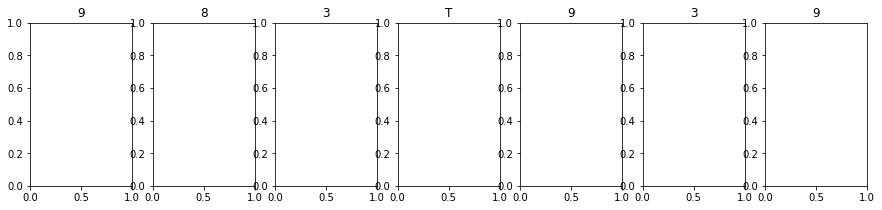

<Figure size 1008x288 with 0 Axes>

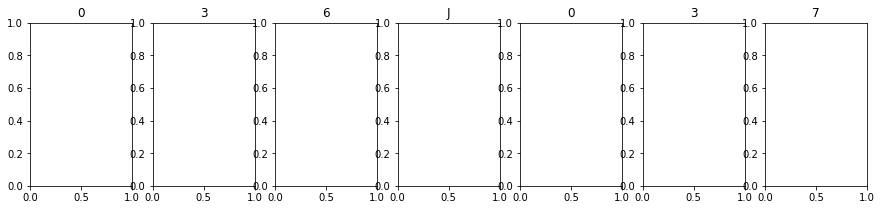

<Figure size 1008x288 with 0 Axes>

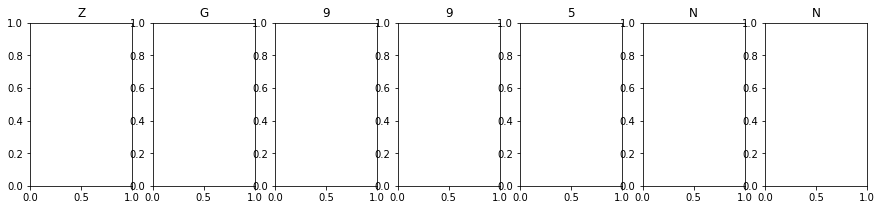

<Figure size 1008x288 with 0 Axes>

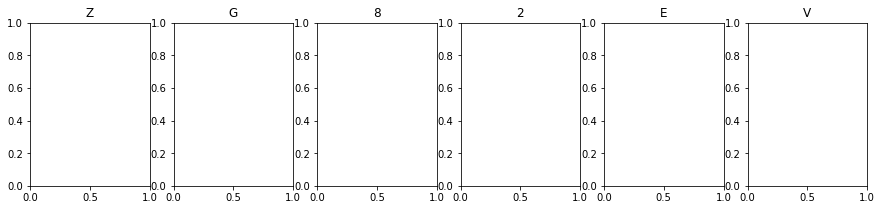

<Figure size 1008x288 with 0 Axes>

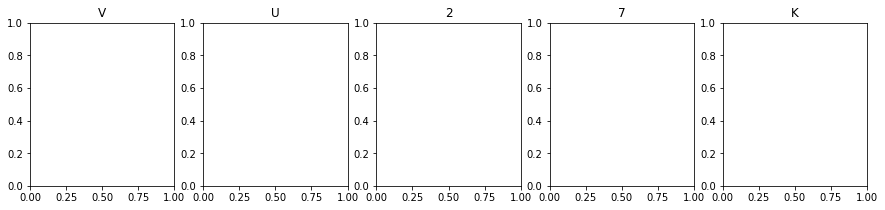

<Figure size 1008x288 with 0 Axes>

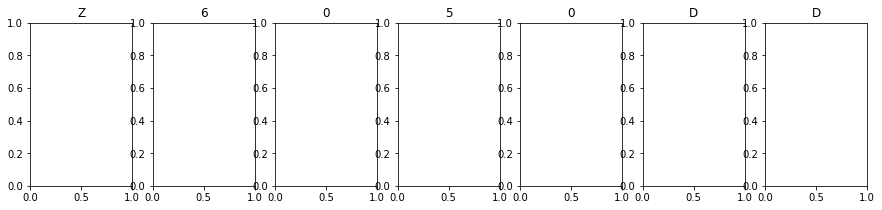

<Figure size 1008x288 with 0 Axes>

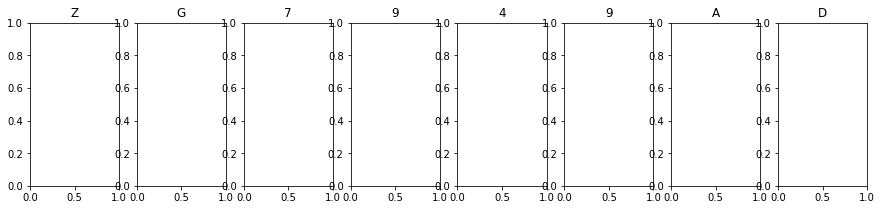

<Figure size 1008x288 with 0 Axes>

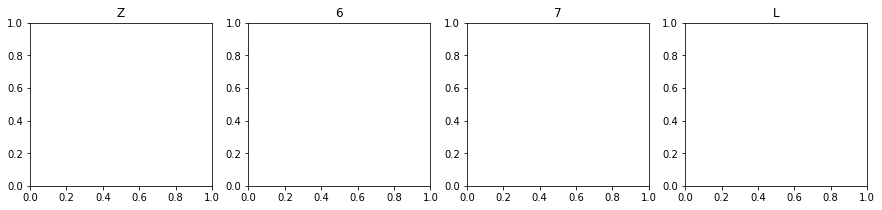

<Figure size 1008x288 with 0 Axes>

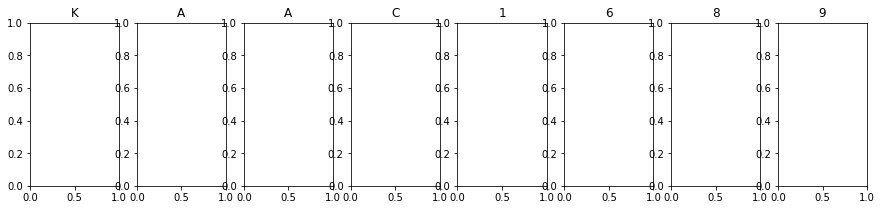

<Figure size 1008x288 with 0 Axes>

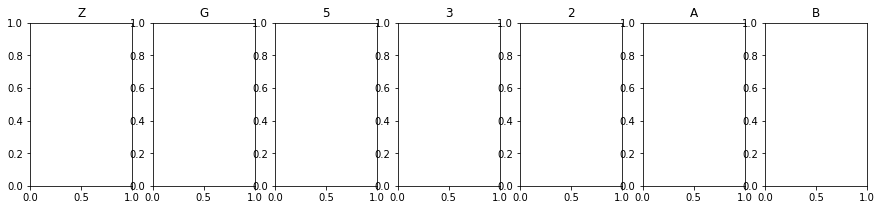

<Figure size 1008x288 with 0 Axes>

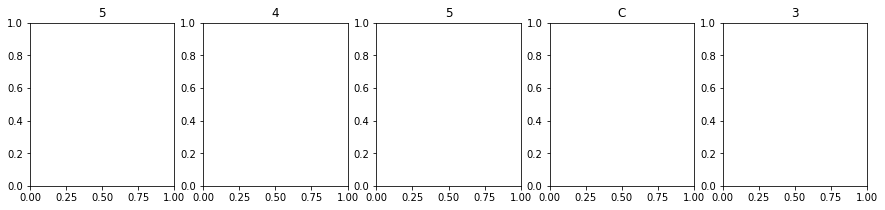

<Figure size 1008x288 with 0 Axes>

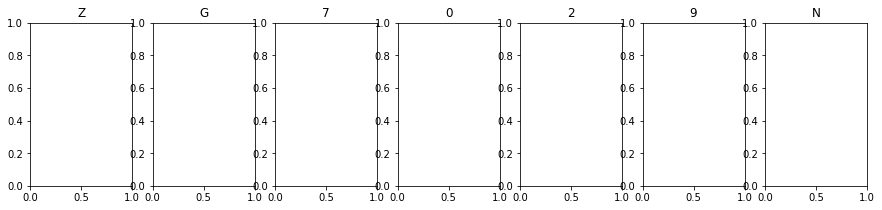

<Figure size 1008x288 with 0 Axes>

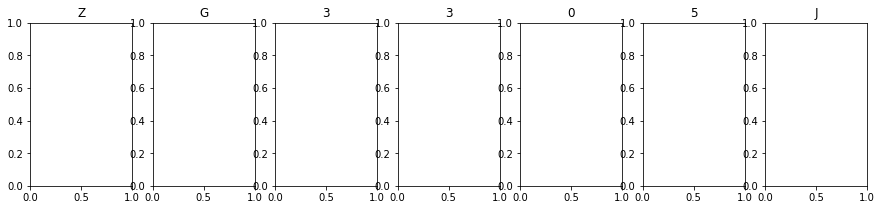

<Figure size 1008x288 with 0 Axes>

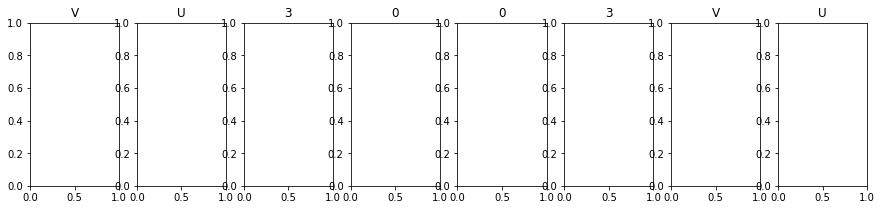

<Figure size 1008x288 with 0 Axes>

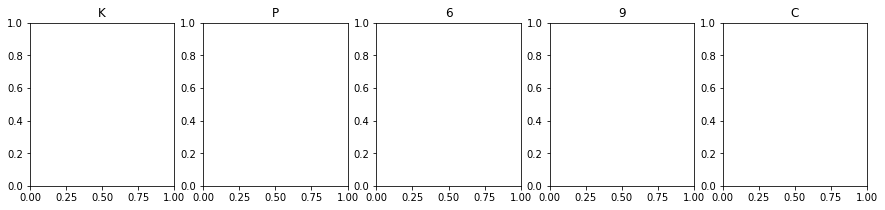

<Figure size 1008x288 with 0 Axes>

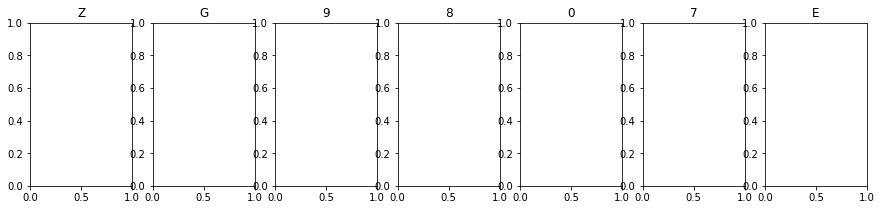

<Figure size 1008x288 with 0 Axes>

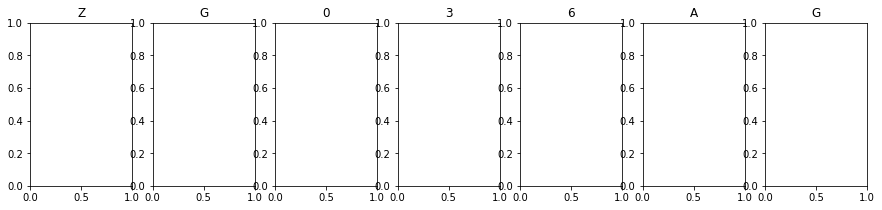

<Figure size 1008x288 with 0 Axes>

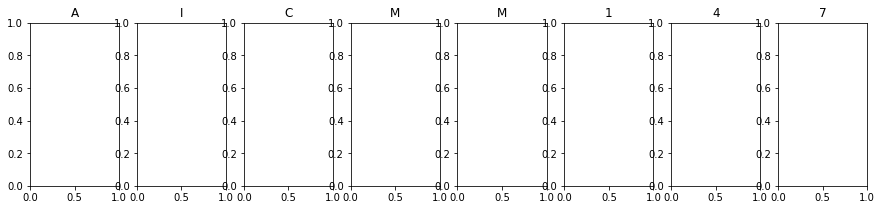

<Figure size 1008x288 with 0 Axes>

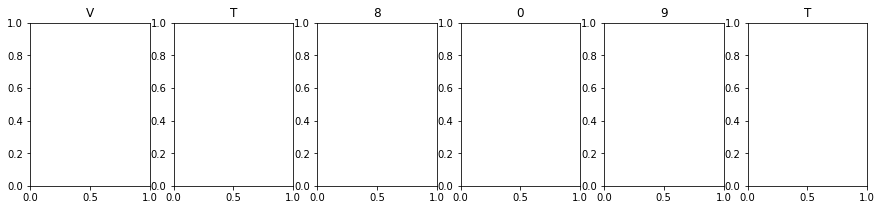

<Figure size 1008x288 with 0 Axes>

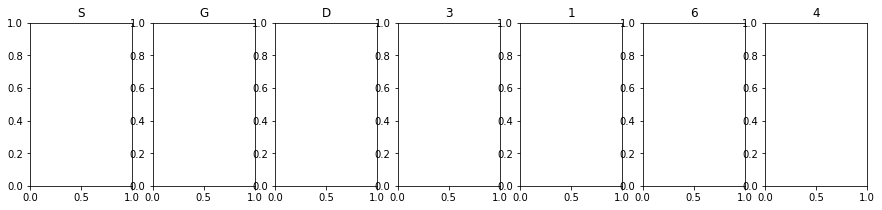

<Figure size 1008x288 with 0 Axes>

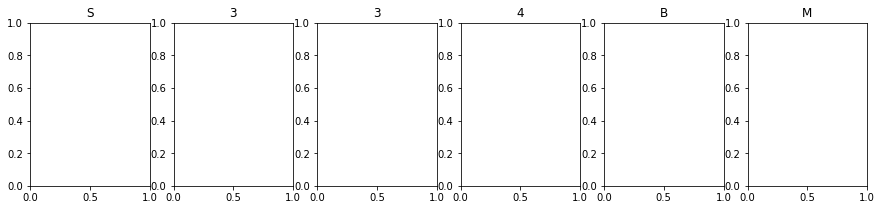

<Figure size 1008x288 with 0 Axes>

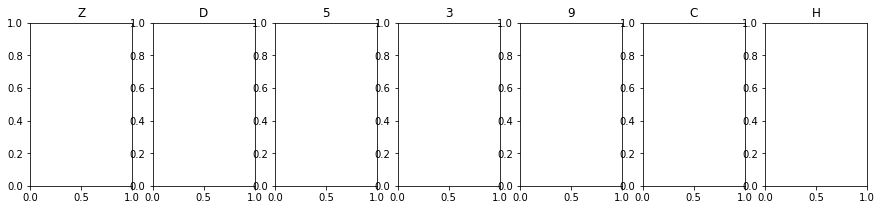

<Figure size 1008x288 with 0 Axes>

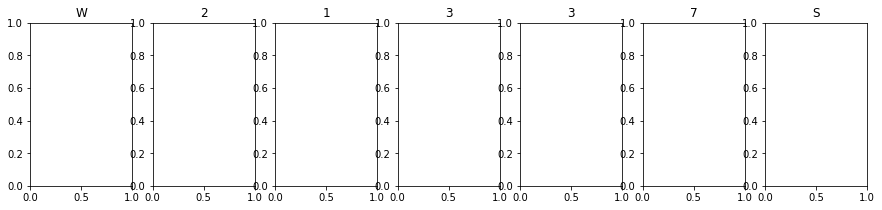

<Figure size 1008x288 with 0 Axes>

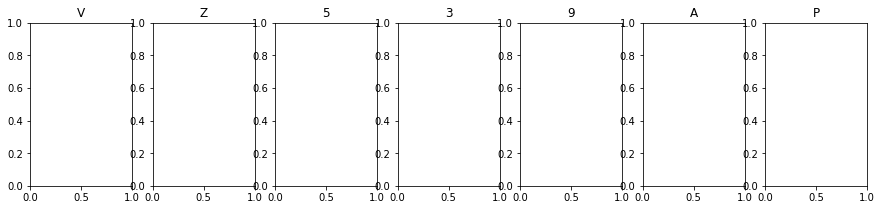

<Figure size 1008x288 with 0 Axes>

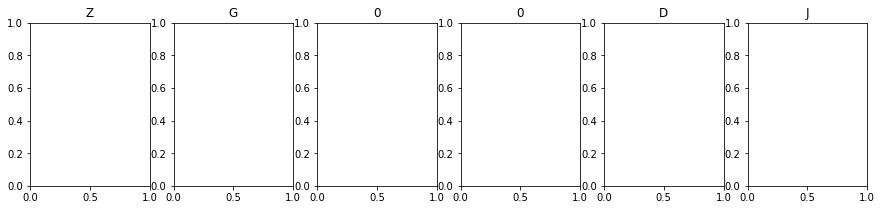

<Figure size 1008x288 with 0 Axes>

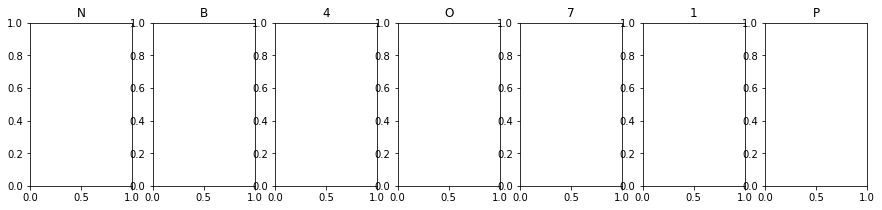

<Figure size 1008x288 with 0 Axes>

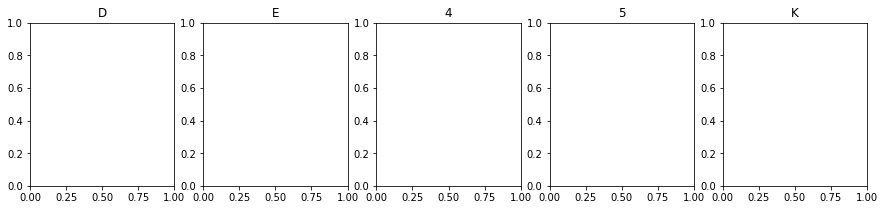

In [ ]:
import os
pathi='/content/Correct Images'
with open('test.csv','w') as f:
    f.write('SNo,Vehicle,Emergency,No Plate\n')
for counter,files in enumerate(os.listdir(pathi)):

    path=os.path.join(pathi,files)
    img = open_image(path)
    dataset=['Ambulance', 'Bus', 'Car', 'Limousine', 'Motorcycle', 'Taxi', 'Truck', 'Van']
    emerge=['Non-Emergency','Emergency']
    tens=model.predict(img)[-1].numpy()
    tens1=model1.predict(img)[-1].numpy()
    #print(count,dataset[np.argmax(tens)],emerge[np.argmax(tens1)],get_string_from_image(path))
    with open('test.csv','a') as f:
        f.write('{},{},{},{}\n'.format(counter,dataset[np.argmax(tens)],emerge[np.argmax(tens1)],get_string_from_image(path)))


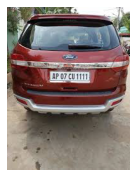

In [ ]:
img.show()

In [ ]:
from script import predict_plates,get_string_from_image

Loading model successfully...
[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


In [ ]:
TEST_PATH='/content/baza_slika/040603'

U


K43GC
PU253B
V6
W21337S
EG26
ZG763VE



/content/script.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(14,4))
/content/script.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,3))


ZG453P

1NVX75

N

S663BN
ZG4240AC
U954S
ZG4459L
SK253CL

FN165

ZG655UR
DU748BHU

ZG877TF
SGD3164
list index out of range


KZ386L


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

ZD539CH
SK80BM



SW71AE
P
S66BN
Z6848L
ZG425AC


BV595KX
ZD43CK
VT809T
1
VZ820DD






LJE797P

ST329JH

227E0




ZG6839A

KC538AG
ZAC
HGAS18G2


<Figure size 1008x288 with 0 Axes>

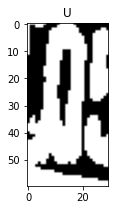

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

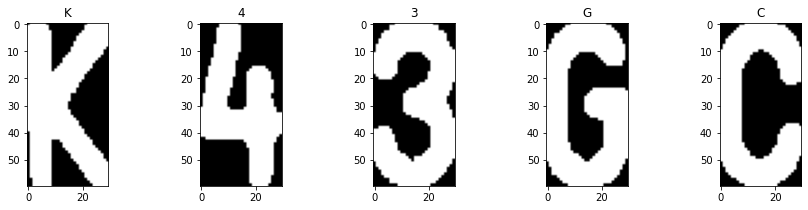

<Figure size 1008x288 with 0 Axes>

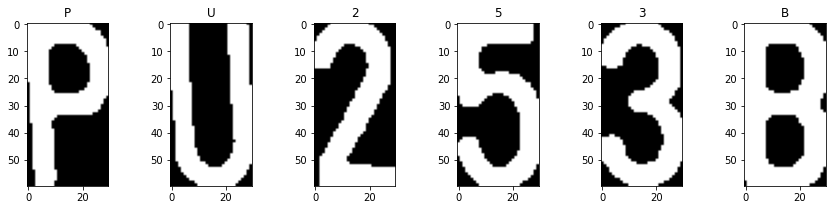

<Figure size 1008x288 with 0 Axes>

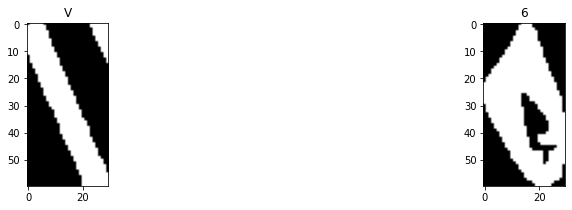

<Figure size 1008x288 with 0 Axes>

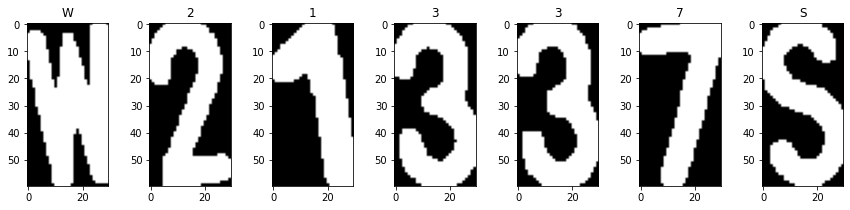

<Figure size 1008x288 with 0 Axes>

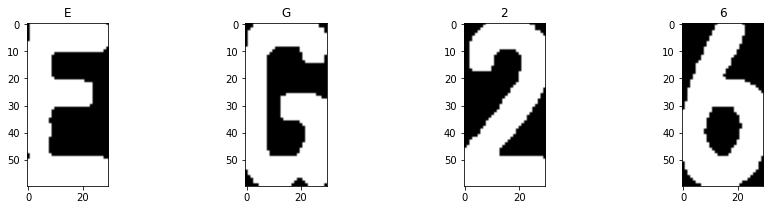

<Figure size 1008x288 with 0 Axes>

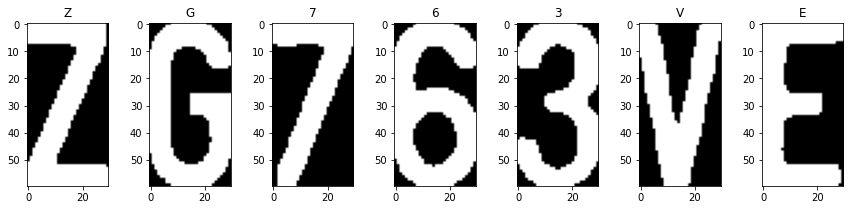

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

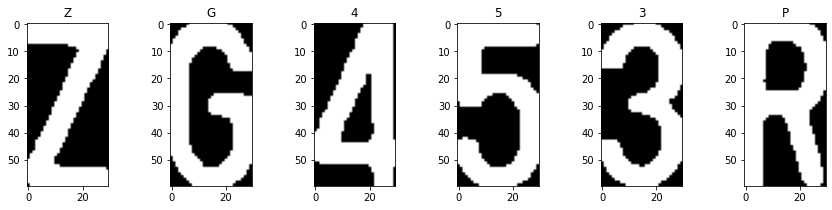

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

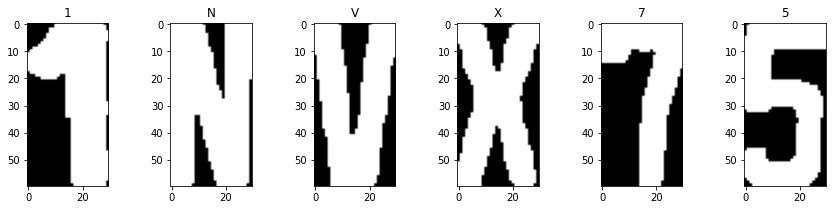

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

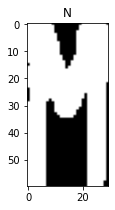

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

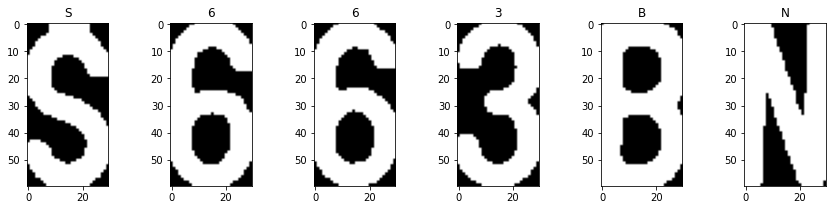

<Figure size 1008x288 with 0 Axes>

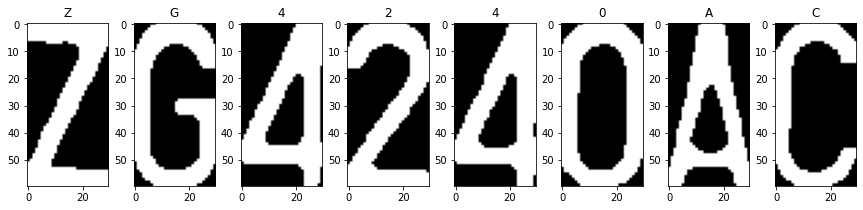

<Figure size 1008x288 with 0 Axes>

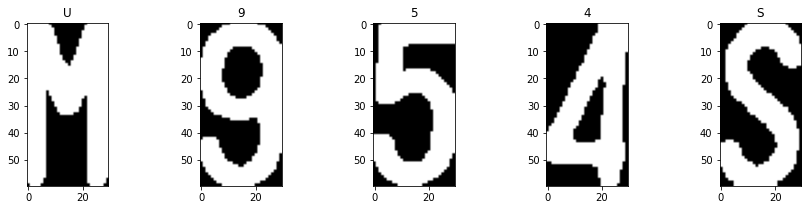

<Figure size 1008x288 with 0 Axes>

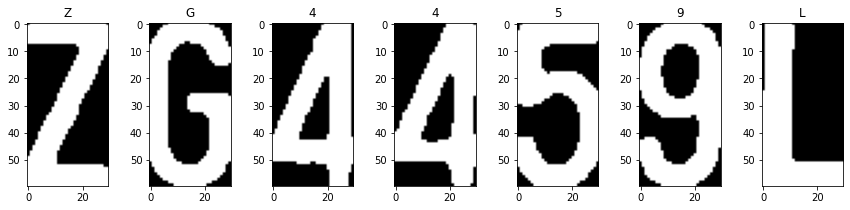

<Figure size 1008x288 with 0 Axes>

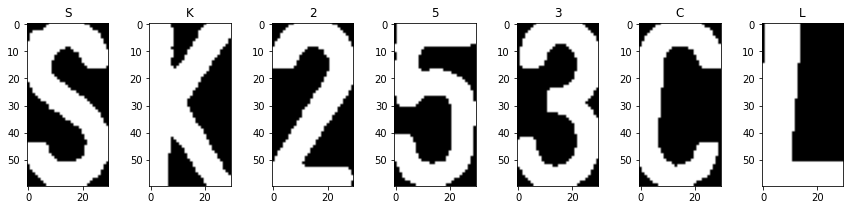

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

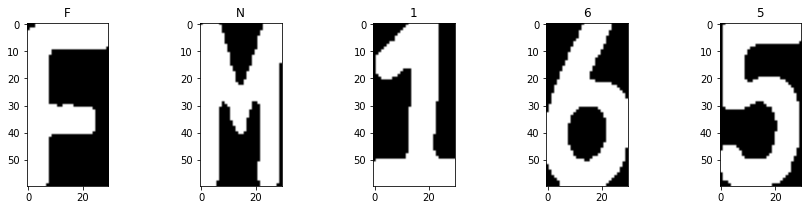

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

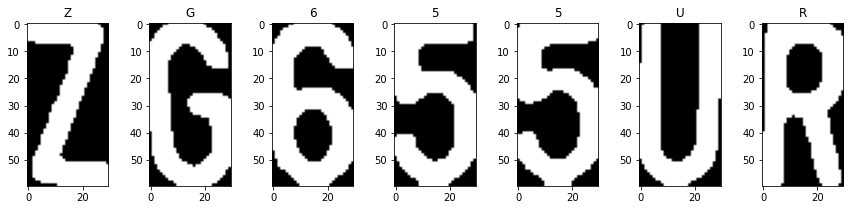

<Figure size 1008x288 with 0 Axes>

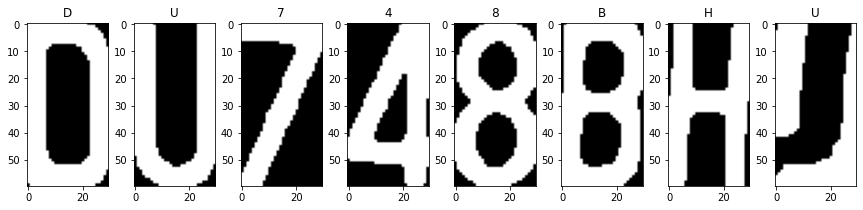

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

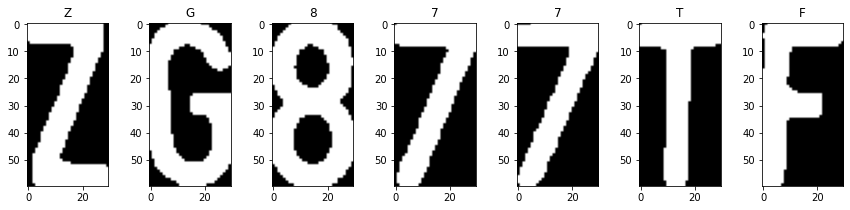

<Figure size 1008x288 with 0 Axes>

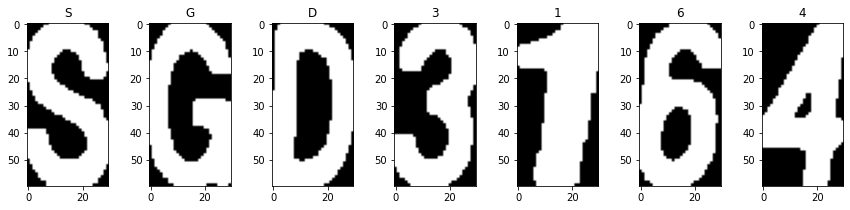

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

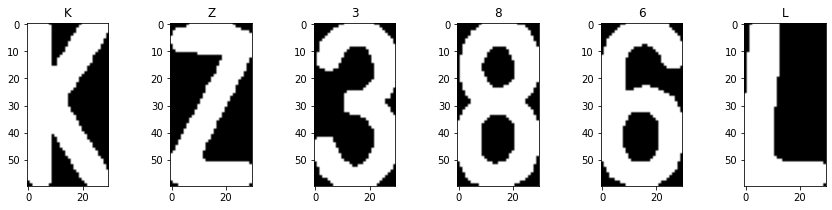

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

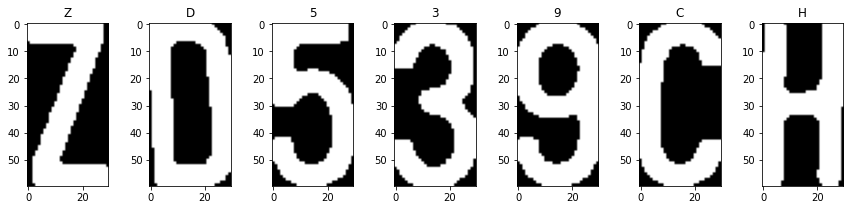

<Figure size 1008x288 with 0 Axes>

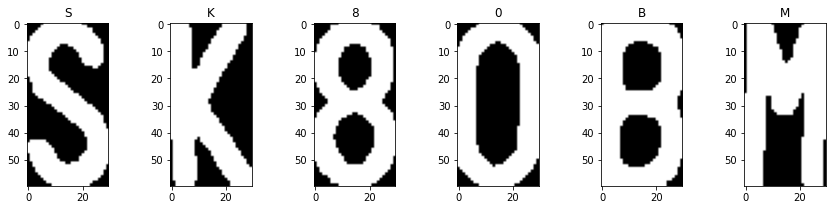

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

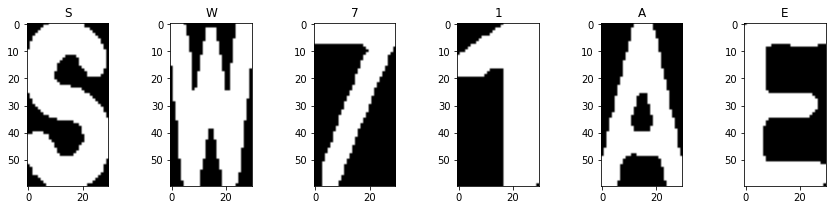

<Figure size 1008x288 with 0 Axes>

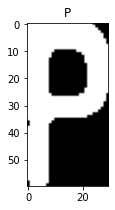

<Figure size 1008x288 with 0 Axes>

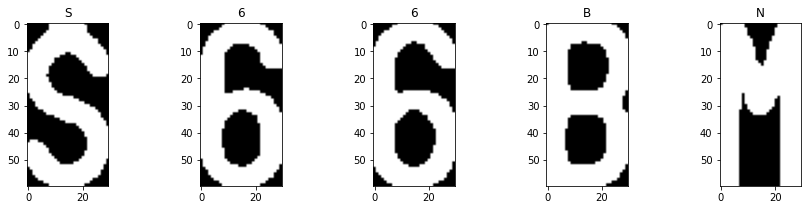

<Figure size 1008x288 with 0 Axes>

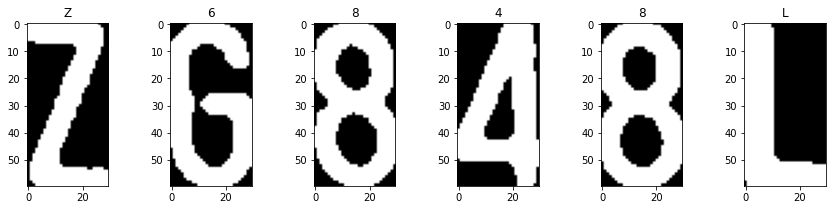

<Figure size 1008x288 with 0 Axes>

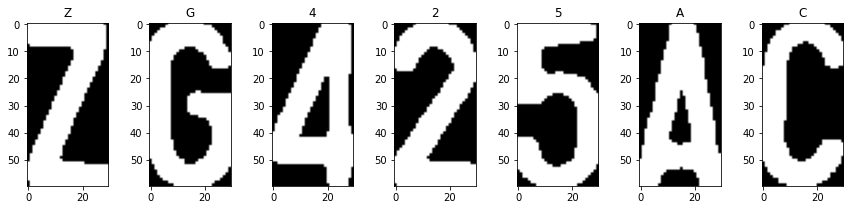

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

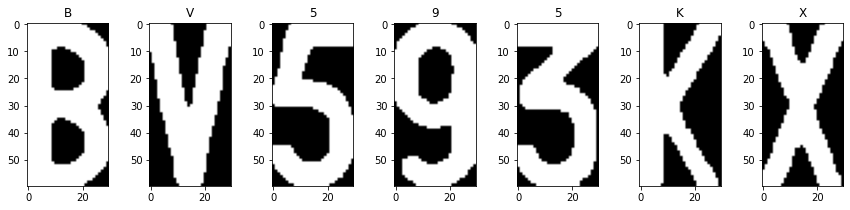

<Figure size 1008x288 with 0 Axes>

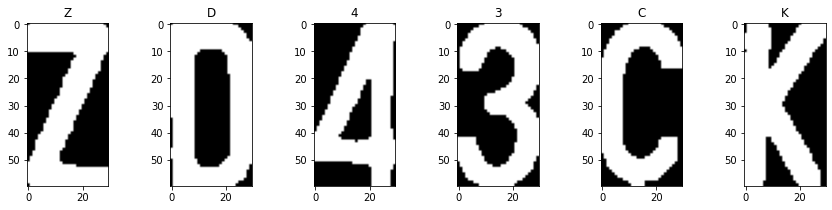

<Figure size 1008x288 with 0 Axes>

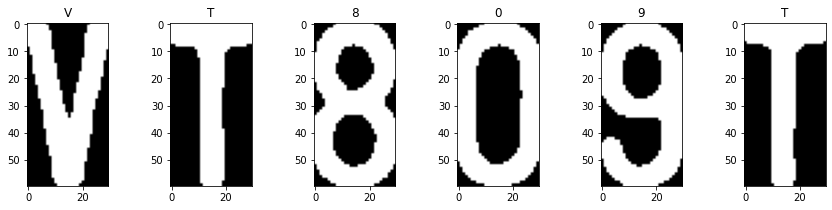

<Figure size 1008x288 with 0 Axes>

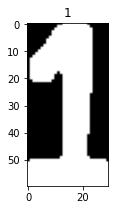

<Figure size 1008x288 with 0 Axes>

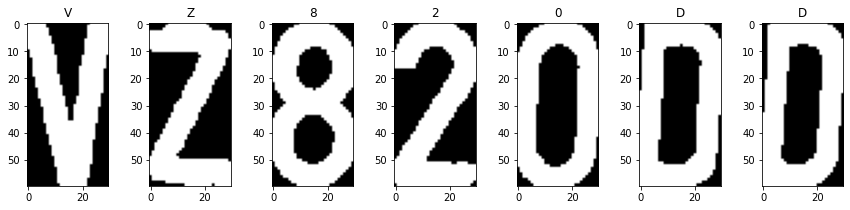

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

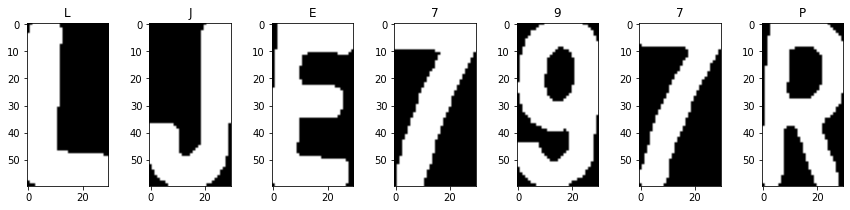

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

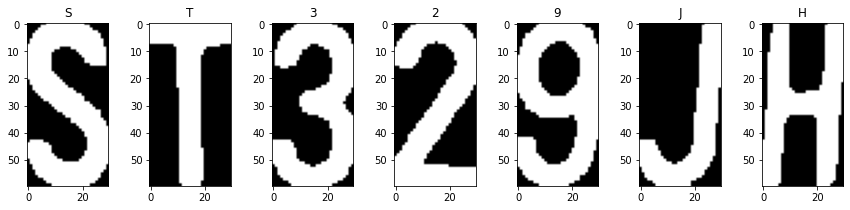

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

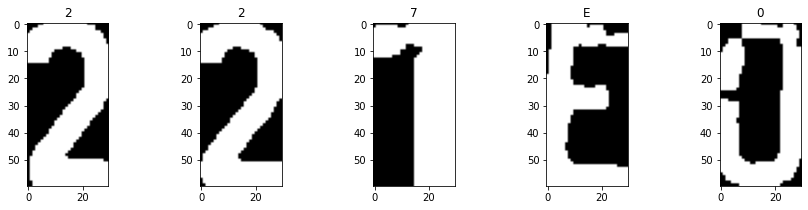

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

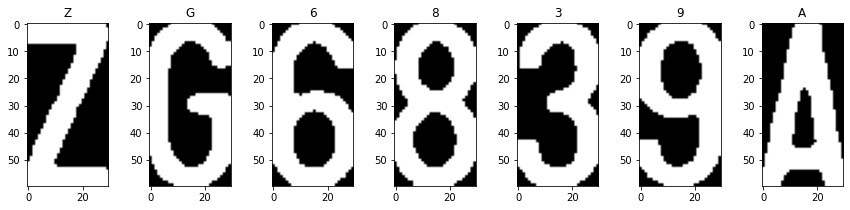

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

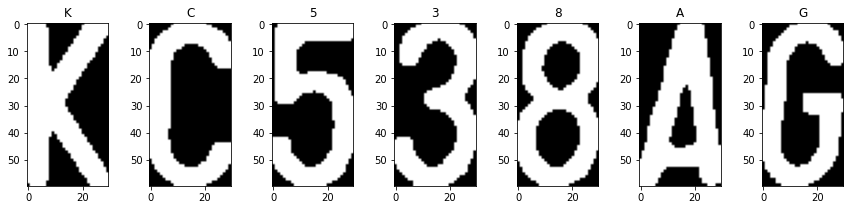

<Figure size 1008x288 with 0 Axes>

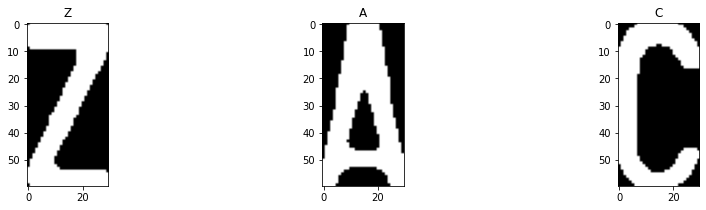

<Figure size 1008x288 with 0 Axes>

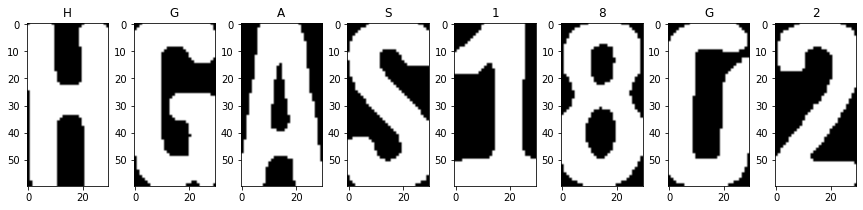

In [ ]:
predict_plates(TEST_PATH)

In [ ]:
!unrar x "pop.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from pop.rar

Creating    pop                                                       OK
Extracting  pop/front_ambulance.jpg                                       82%  OK 
Extracting  pop/front_bike.jpg                                            83%  OK 
Extracting  pop/front_car.jpg                                             98%  OK 
Extracting  pop/rear_car.jpg                                              99%  OK 
All OK


In [ ]:
import pandas as pd
df=pd.read_csv('test.csv')

In [ ]:
!mkdir('images_you')


/bin/bash: -c: line 0: syntax error near unexpected token `'images_you''
/bin/bash: -c: line 0: `mkdir('images_you')'


In [ ]:
l=[]
for folders in os.listdir('baza_slika'):
    l.append(folders)

In [ ]:
l=['280503',
 '210503',
 '180902',
 '070603',
 '141002',
 '170902',
 '040603']

/content/script.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  #fig = plt.figure(figsize=(14,4))
/content/script.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  #fig = plt.figure(figsize=(15,3))


0.5387596899224806


<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

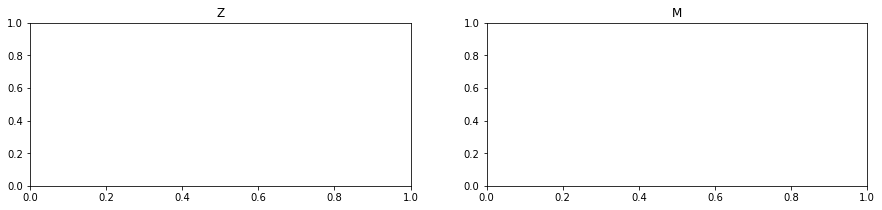

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

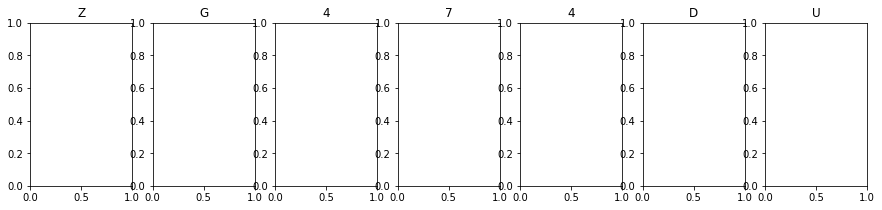

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

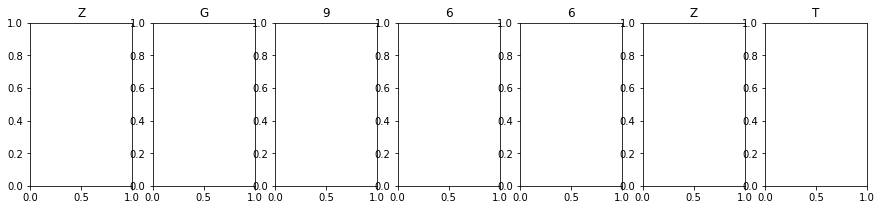

<Figure size 1008x288 with 0 Axes>

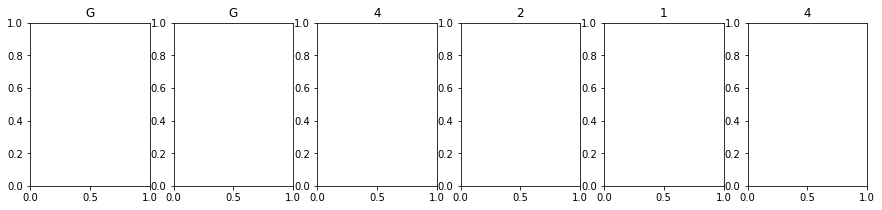

<Figure size 1008x288 with 0 Axes>

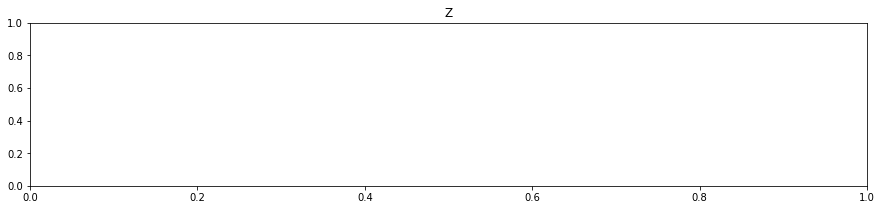

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

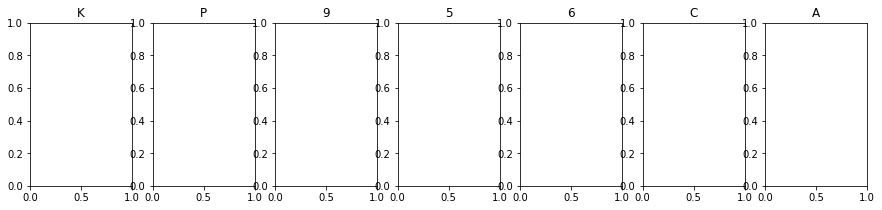

<Figure size 1008x288 with 0 Axes>

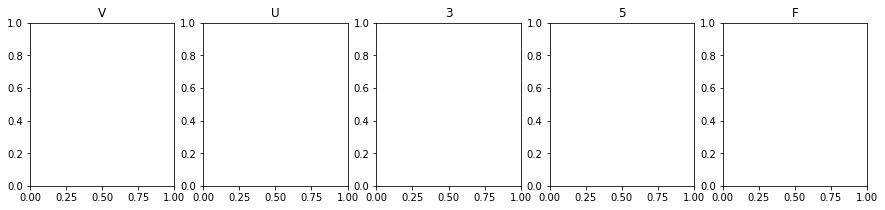

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

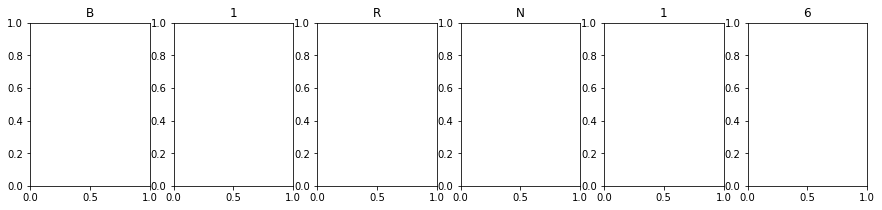

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

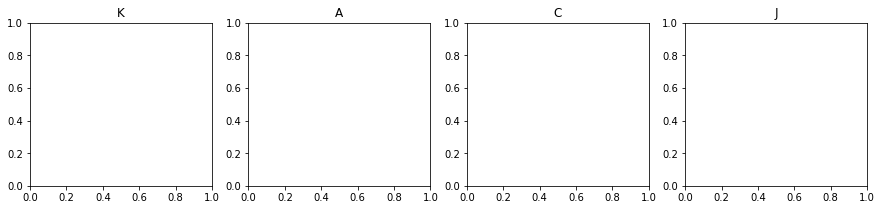

<Figure size 1008x288 with 0 Axes>

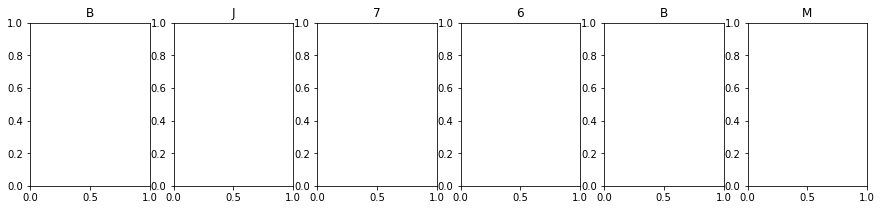

<Figure size 1008x288 with 0 Axes>

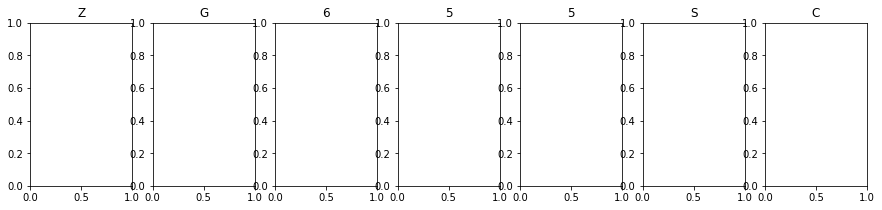

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

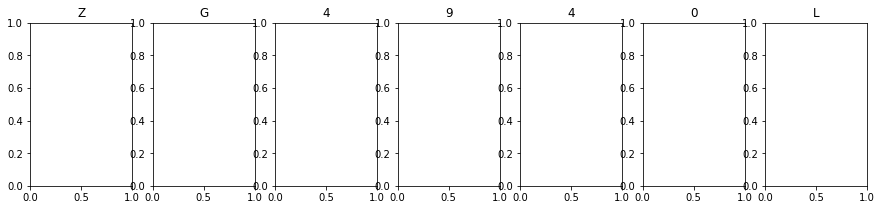

<Figure size 1008x288 with 0 Axes>

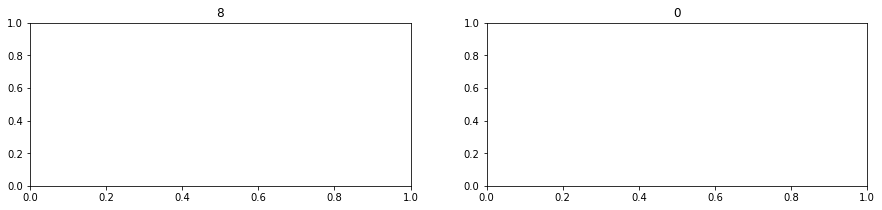

<Figure size 1008x288 with 0 Axes>

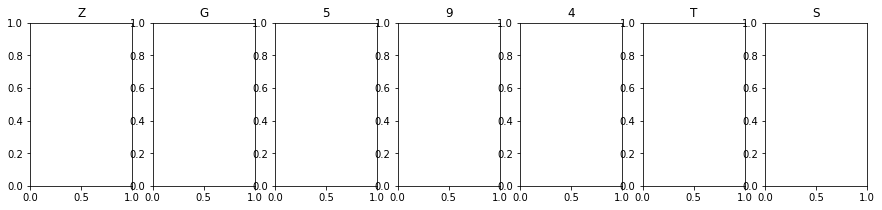

<Figure size 1008x288 with 0 Axes>

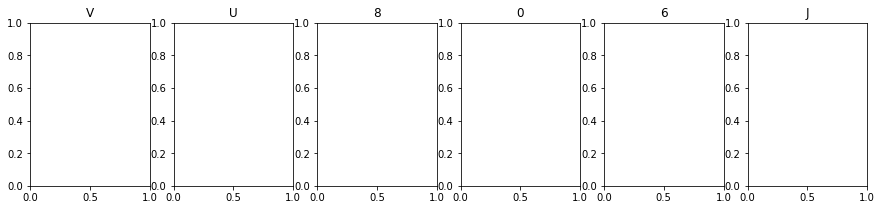

<Figure size 1008x288 with 0 Axes>

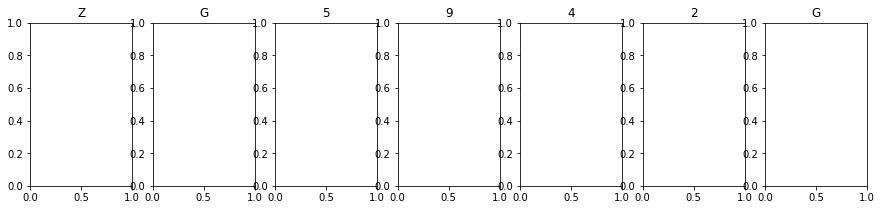

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

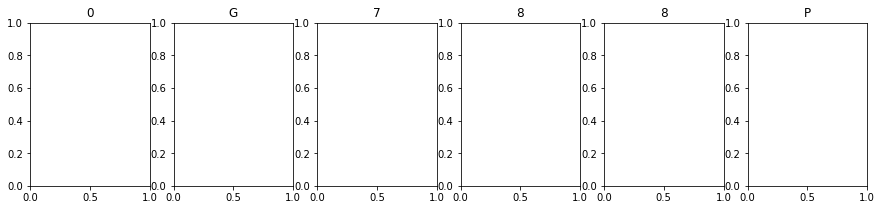

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

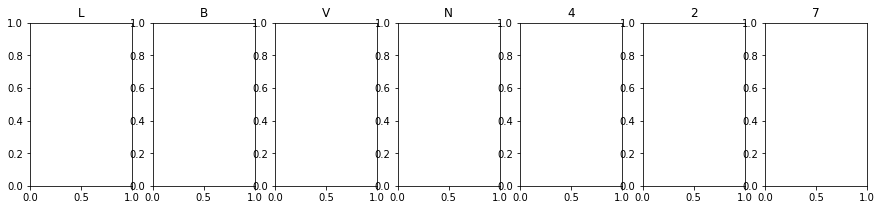

<Figure size 1008x288 with 0 Axes>

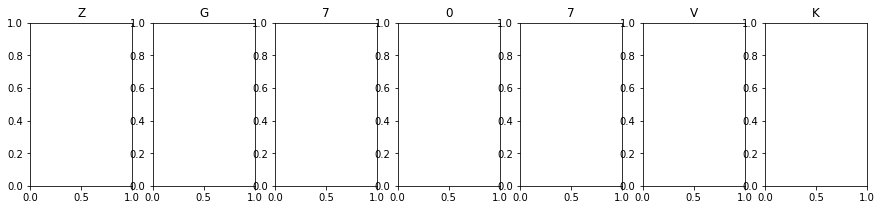

<Figure size 1008x288 with 0 Axes>

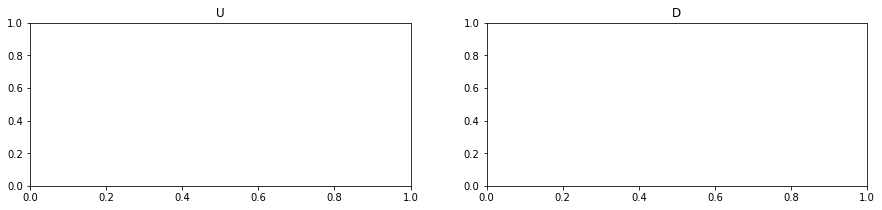

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

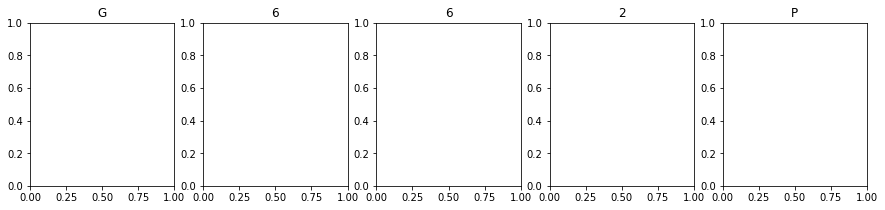

<Figure size 1008x288 with 0 Axes>

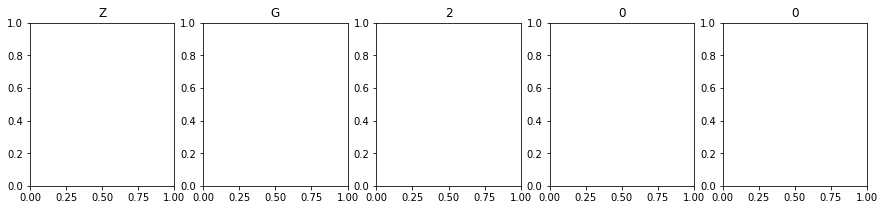

<Figure size 1008x288 with 0 Axes>

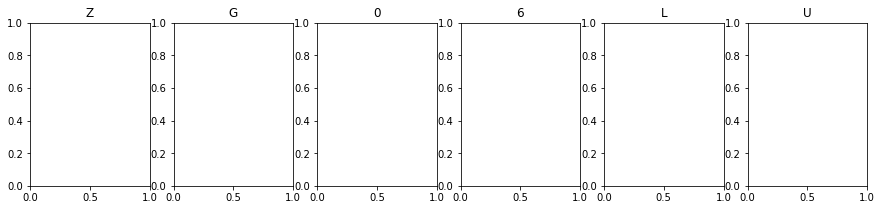

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

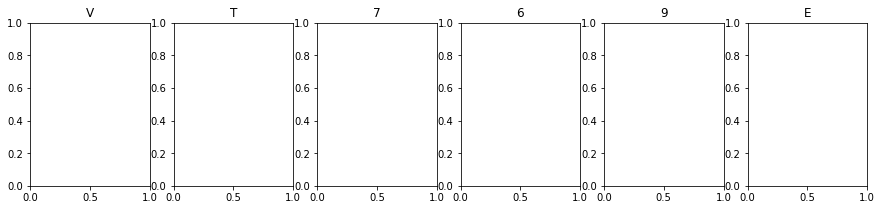

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

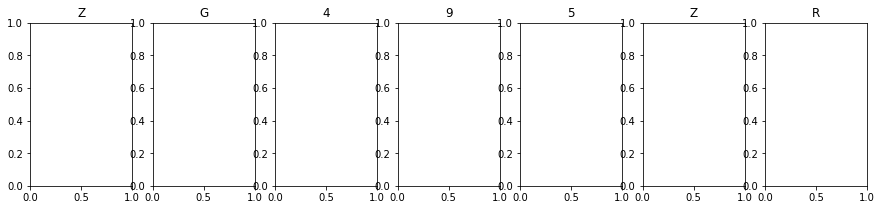

<Figure size 1008x288 with 0 Axes>

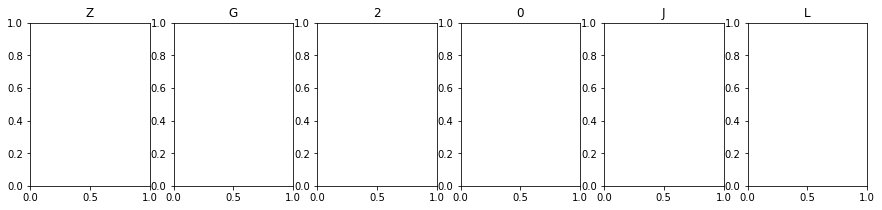

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

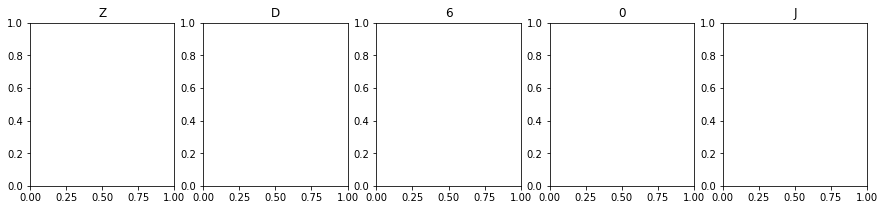

<Figure size 1008x288 with 0 Axes>

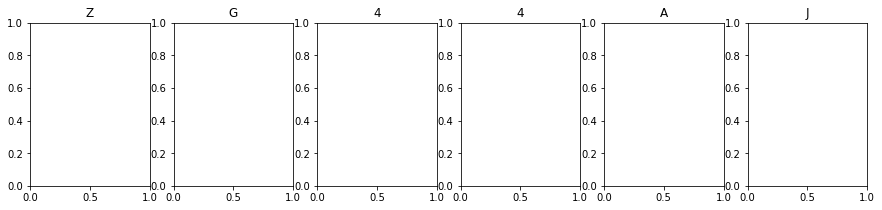

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

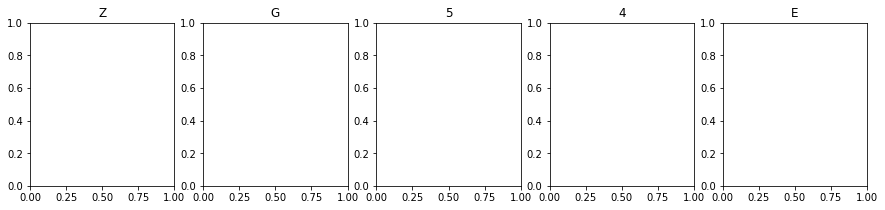

<Figure size 1008x288 with 0 Axes>

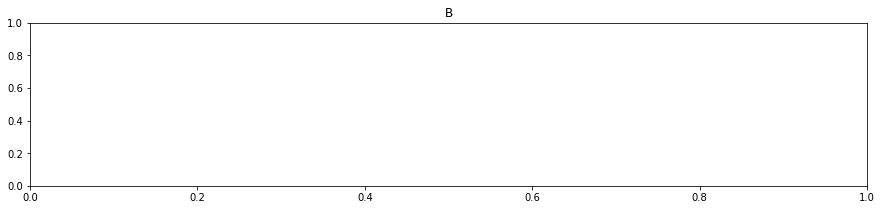

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

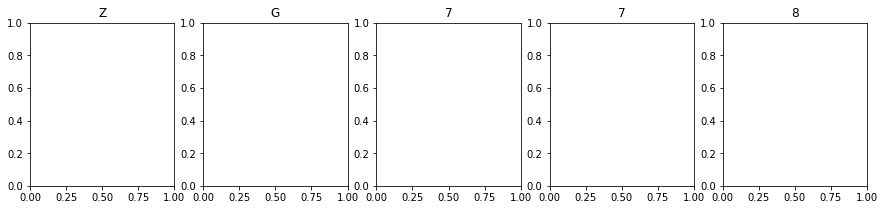

<Figure size 1008x288 with 0 Axes>

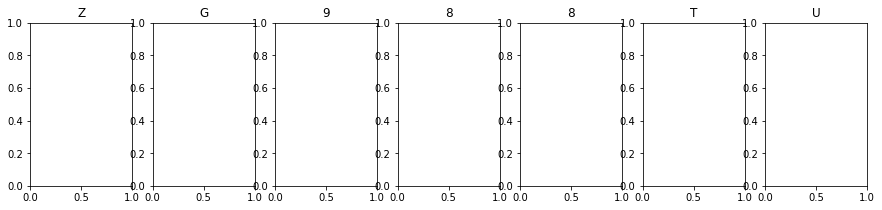

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

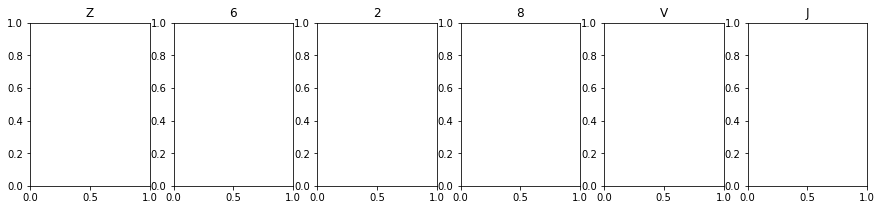

<Figure size 1008x288 with 0 Axes>

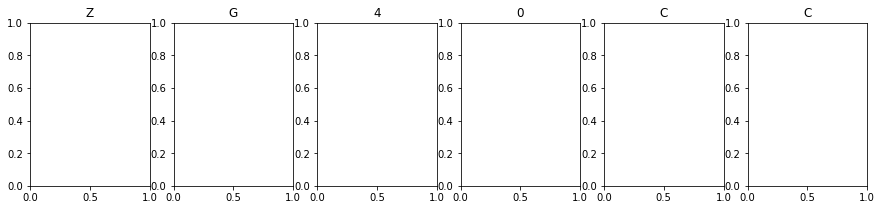

<Figure size 1008x288 with 0 Axes>

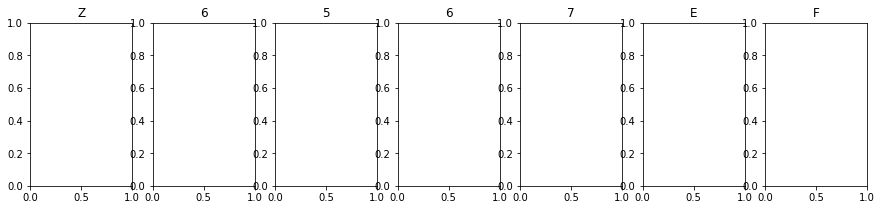

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

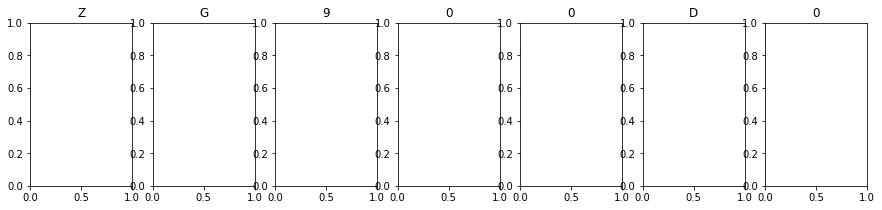

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

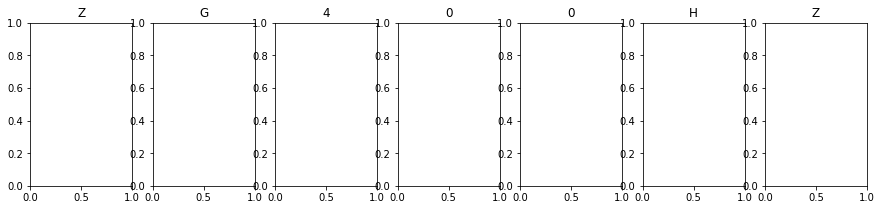

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

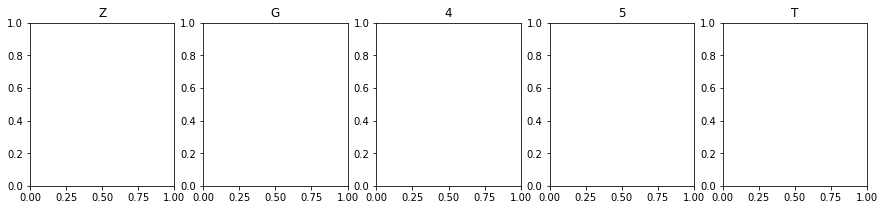

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

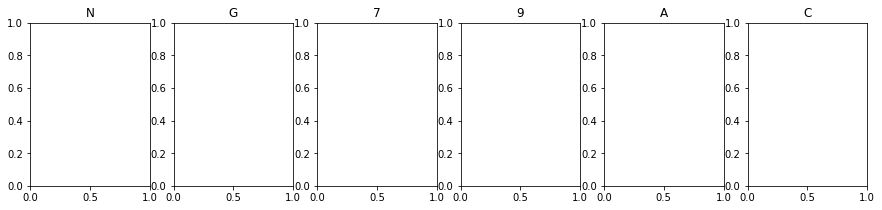

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

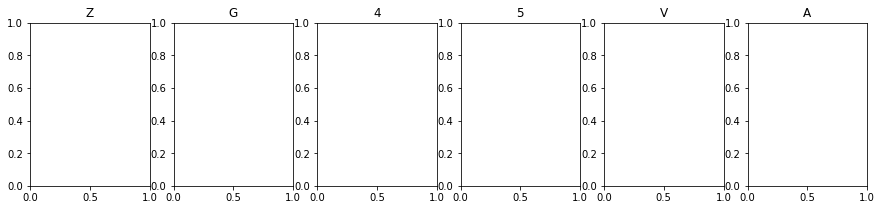

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

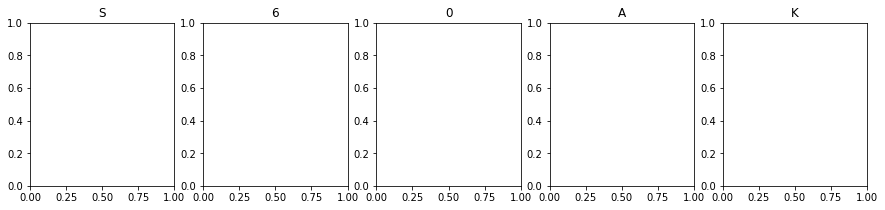

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

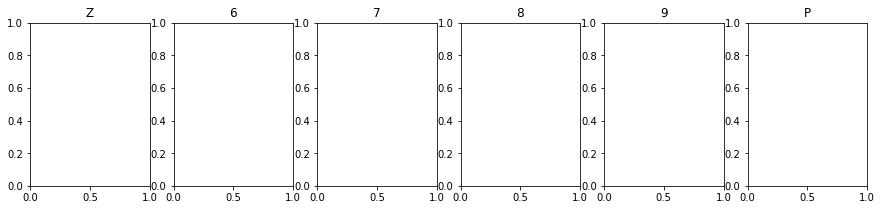

<Figure size 1008x288 with 0 Axes>

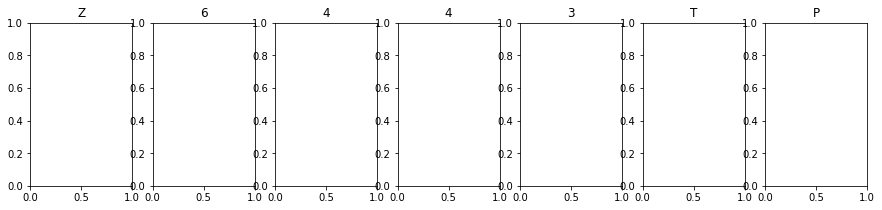

<Figure size 1008x288 with 0 Axes>

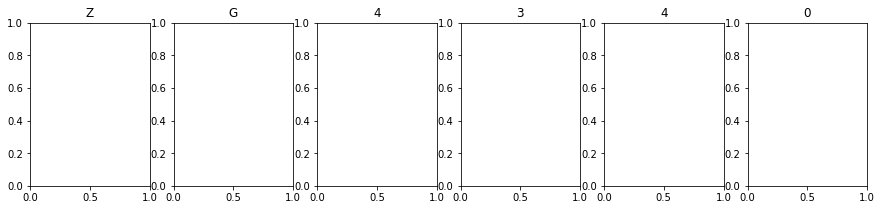

<Figure size 1008x288 with 0 Axes>

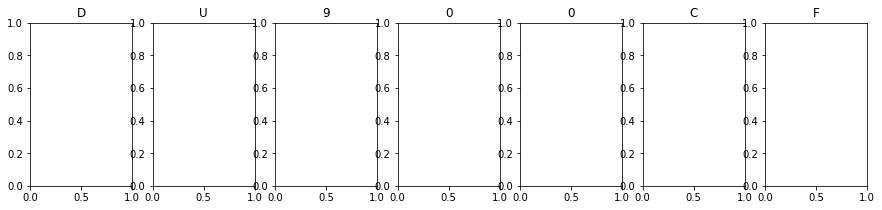

<Figure size 1008x288 with 0 Axes>

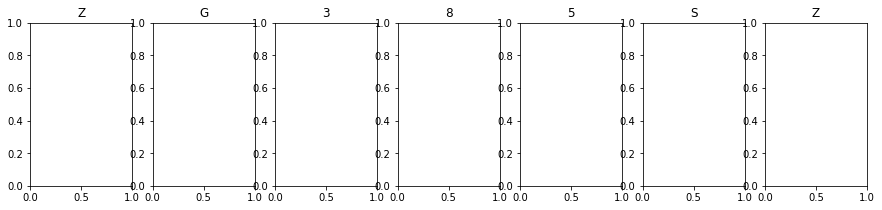

<Figure size 1008x288 with 0 Axes>

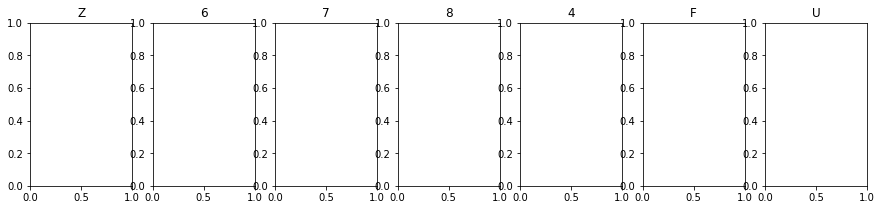

<Figure size 1008x288 with 0 Axes>

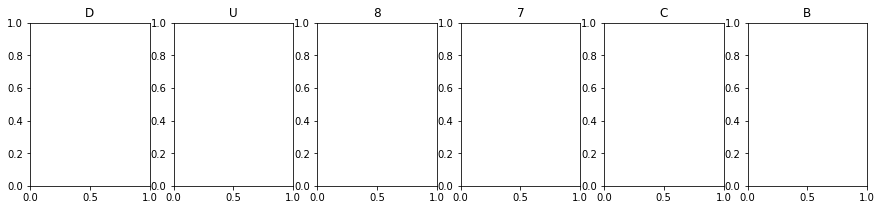

<Figure size 1008x288 with 0 Axes>

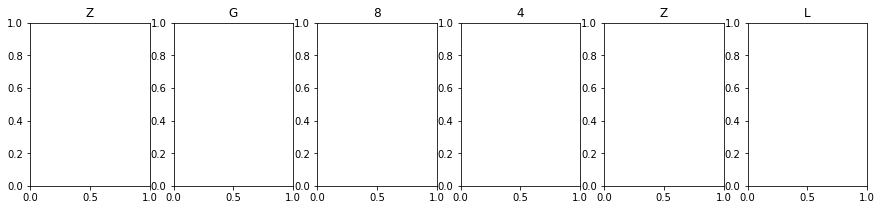

<Figure size 1008x288 with 0 Axes>

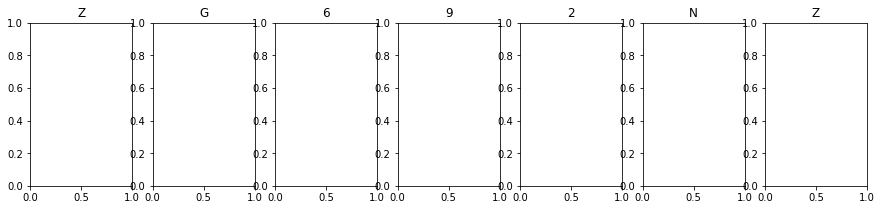

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

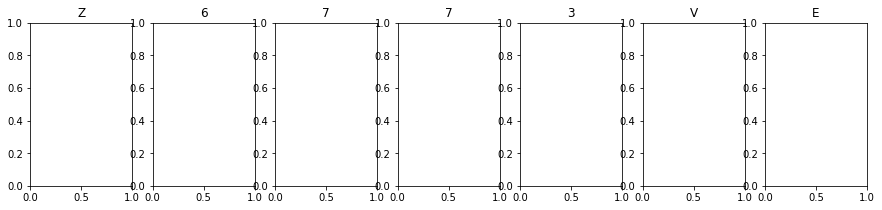

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

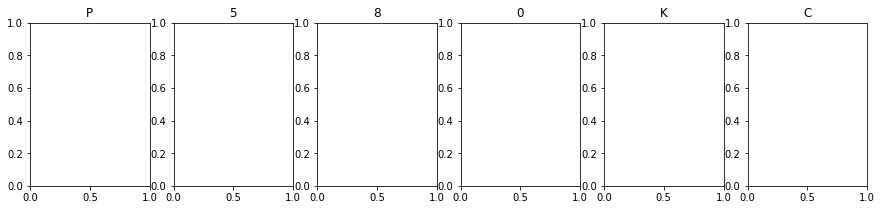

<Figure size 1008x288 with 0 Axes>

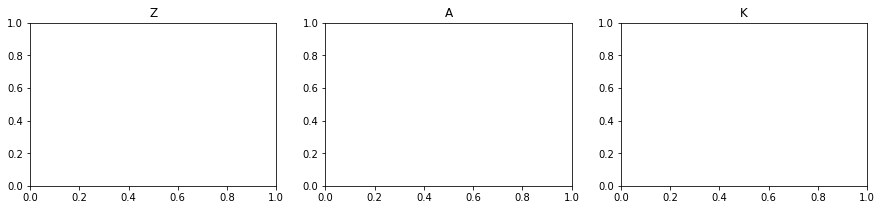

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

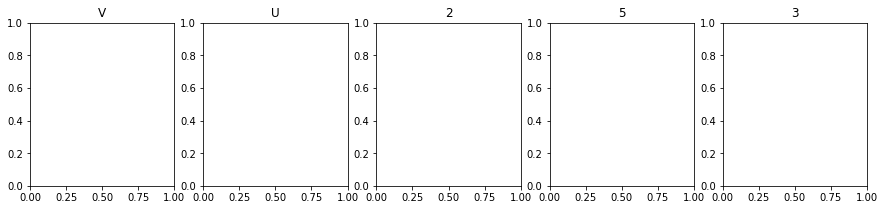

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

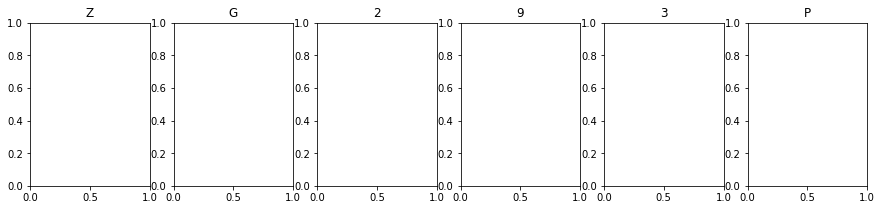

<Figure size 1008x288 with 0 Axes>

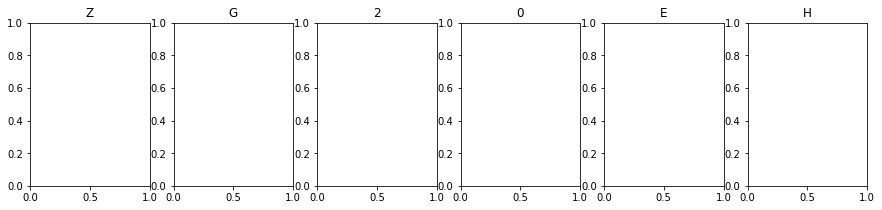

<Figure size 1008x288 with 0 Axes>

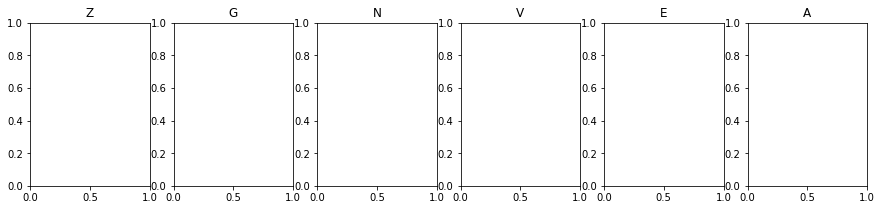

<Figure size 1008x288 with 0 Axes>

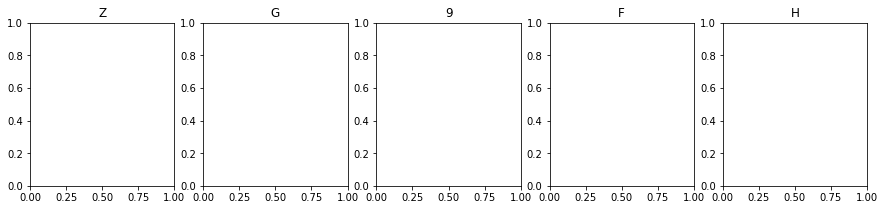

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

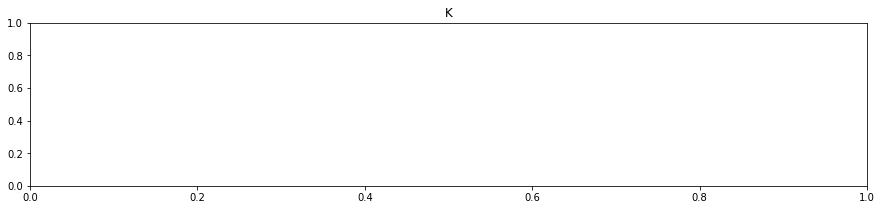

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

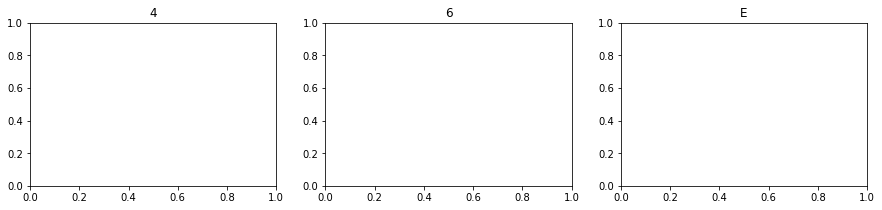

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

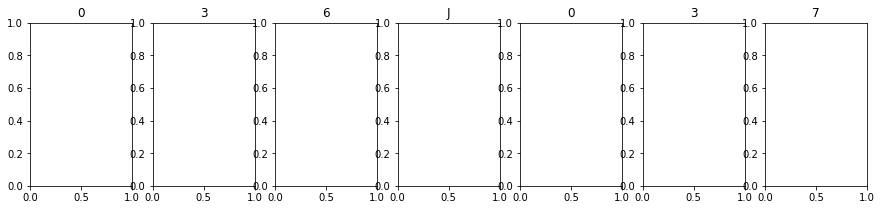

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

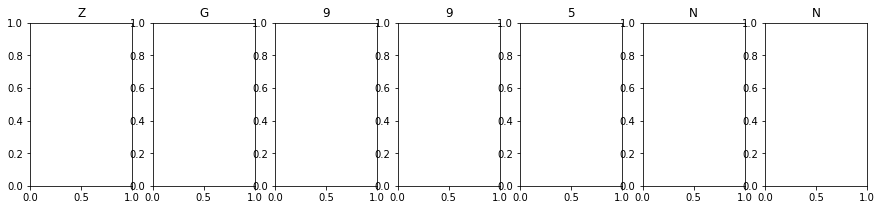

<Figure size 1008x288 with 0 Axes>

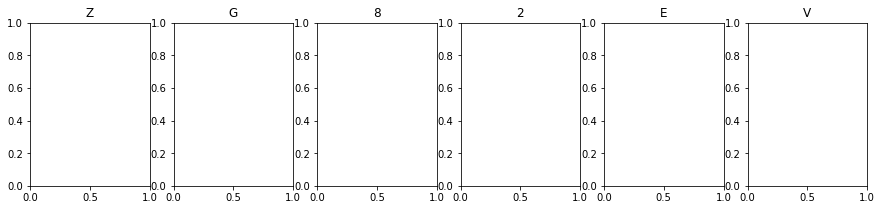

<Figure size 1008x288 with 0 Axes>

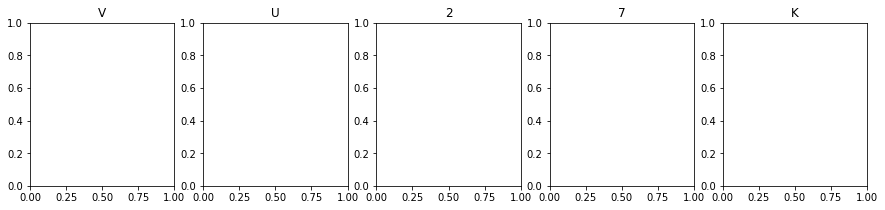

<Figure size 1008x288 with 0 Axes>

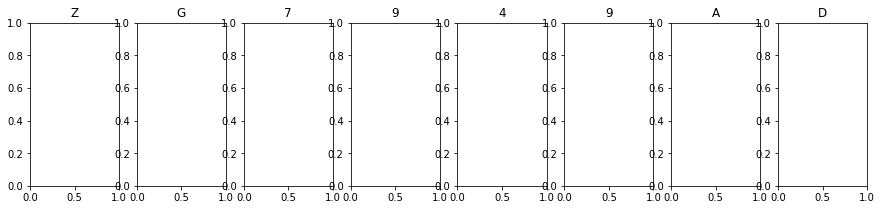

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

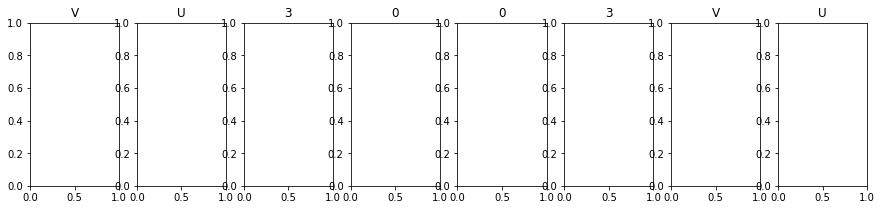

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

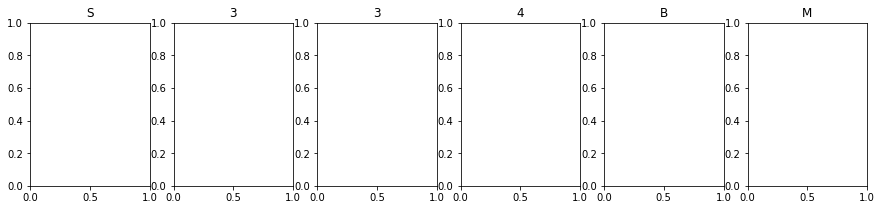

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

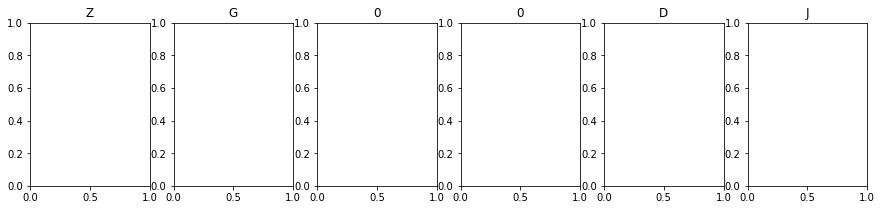

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

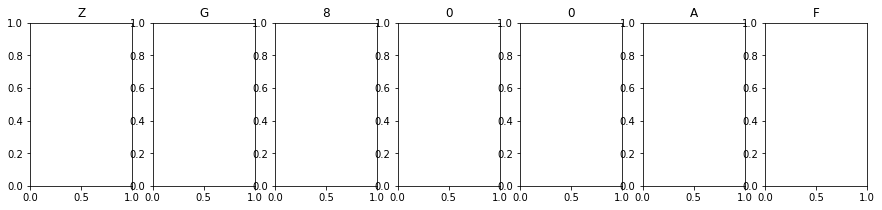

<Figure size 1008x288 with 0 Axes>

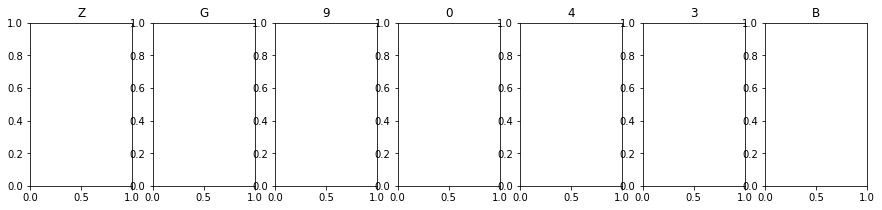

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

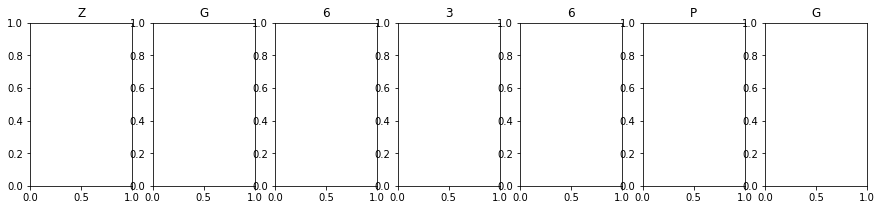

<Figure size 1008x288 with 0 Axes>

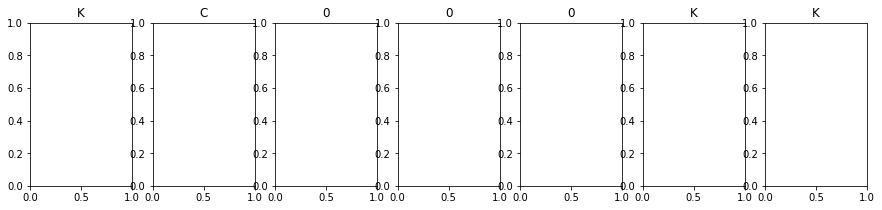

<Figure size 1008x288 with 0 Axes>

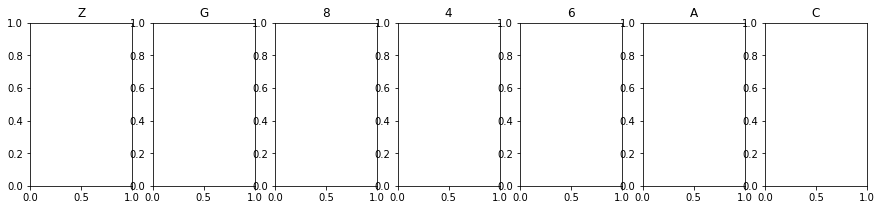

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

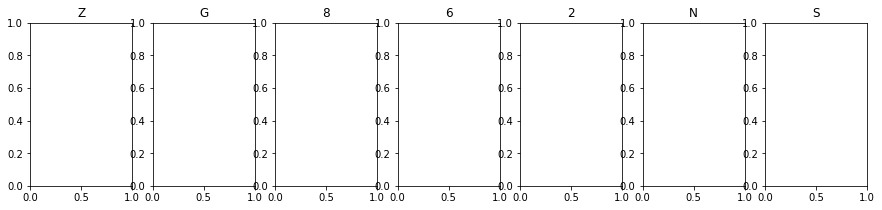

<Figure size 1008x288 with 0 Axes>

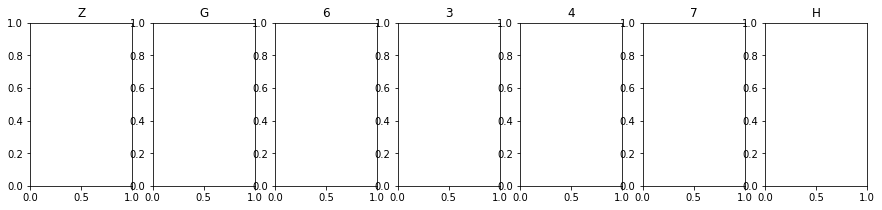

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

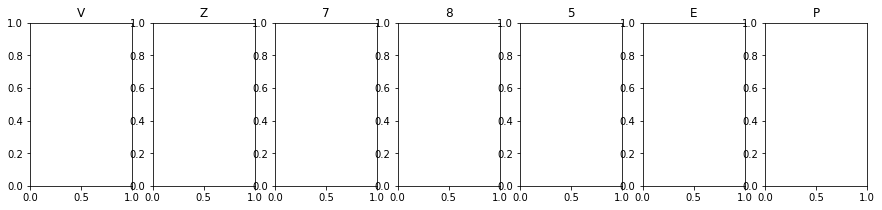

<Figure size 1008x288 with 0 Axes>

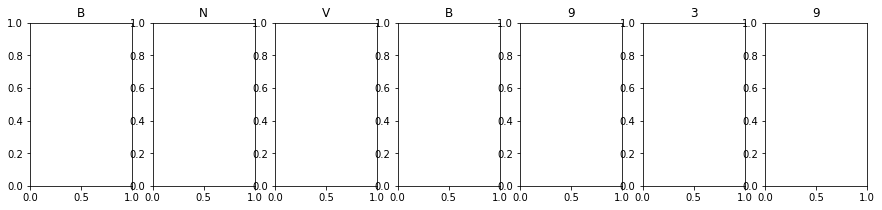

<Figure size 1008x288 with 0 Axes>

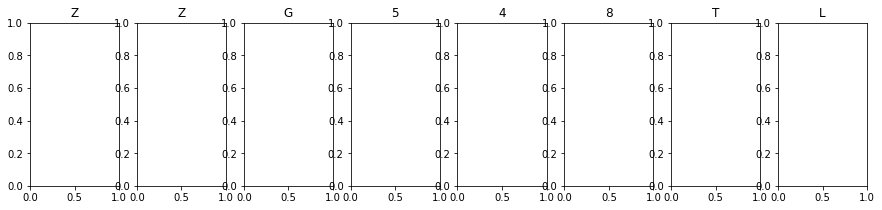

<Figure size 1008x288 with 0 Axes>

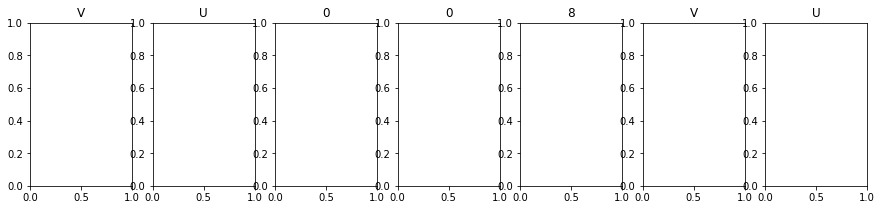

<Figure size 1008x288 with 0 Axes>

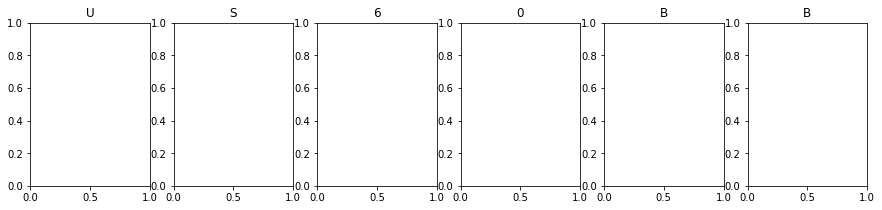

<Figure size 1008x288 with 0 Axes>

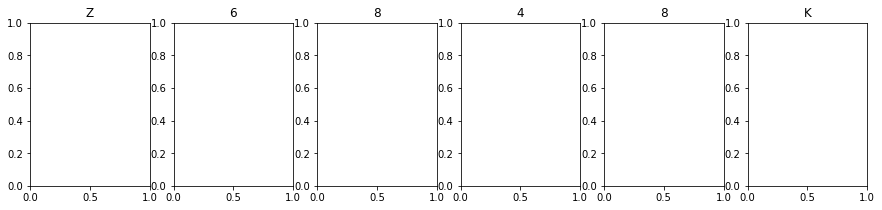

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

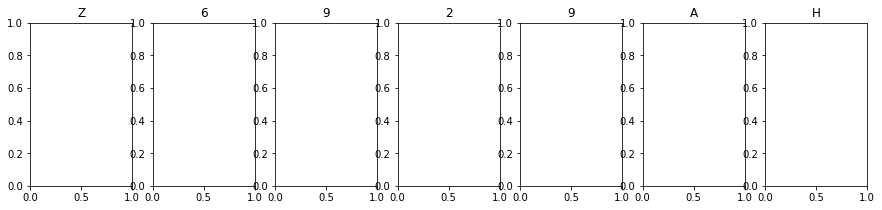

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

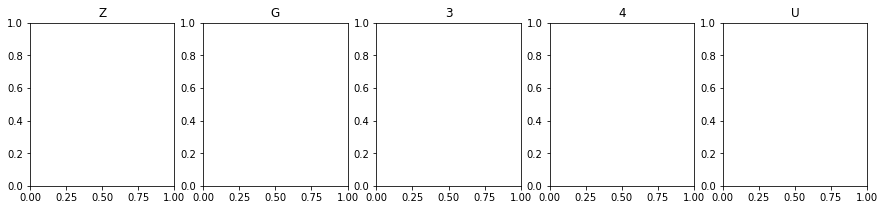

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

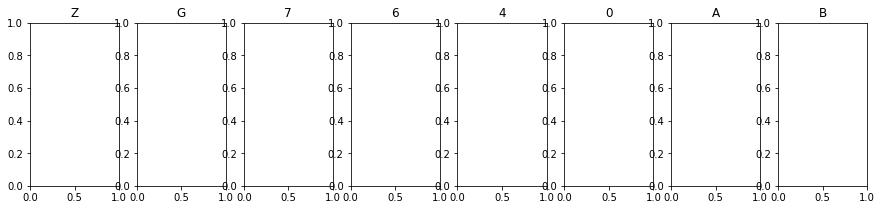

<Figure size 1008x288 with 0 Axes>

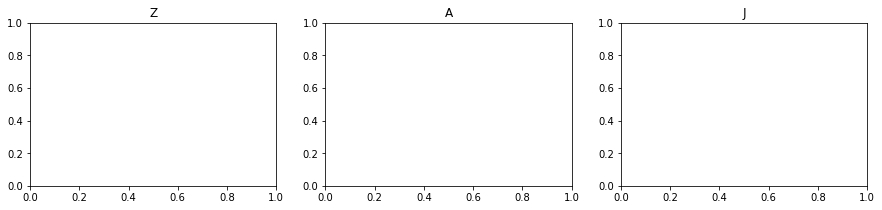

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

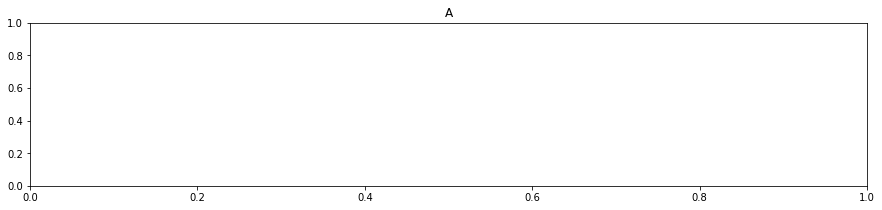

<Figure size 1008x288 with 0 Axes>

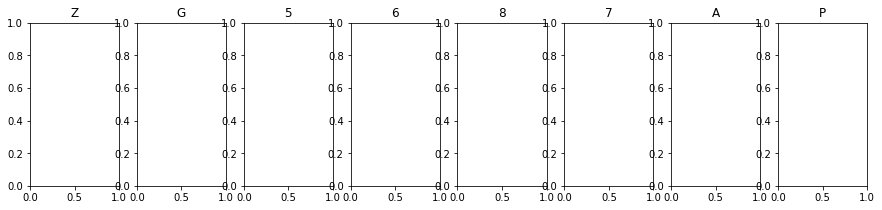

<Figure size 1008x288 with 0 Axes>

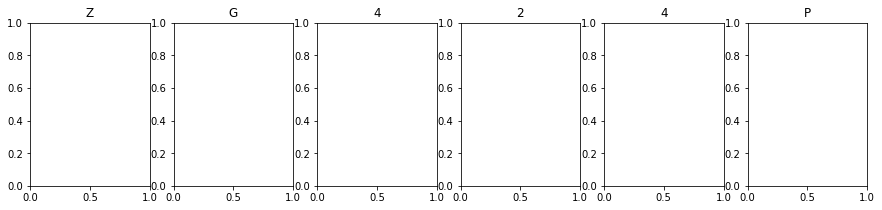

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

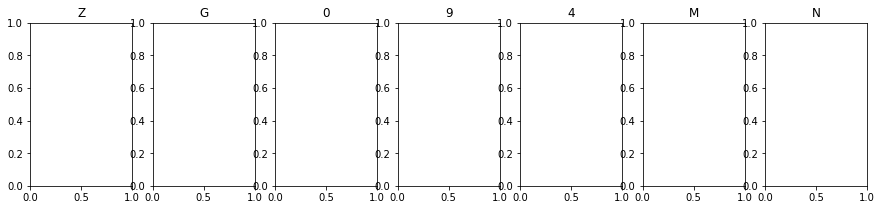

<Figure size 1008x288 with 0 Axes>

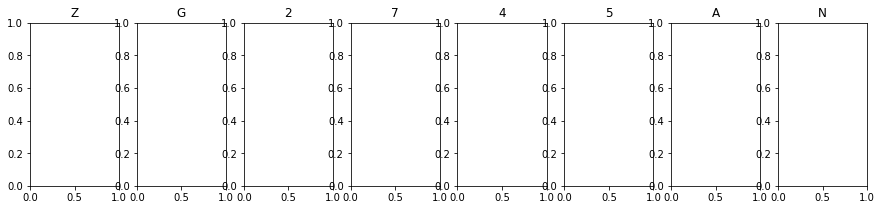

<Figure size 1008x288 with 0 Axes>

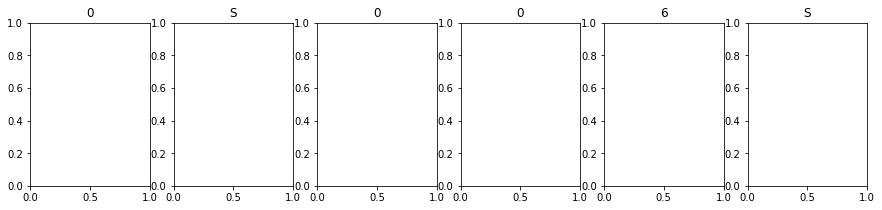

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

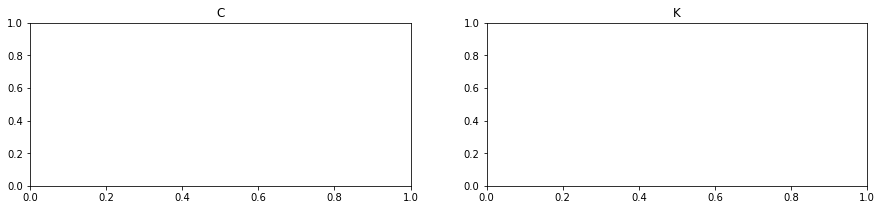

<Figure size 1008x288 with 0 Axes>

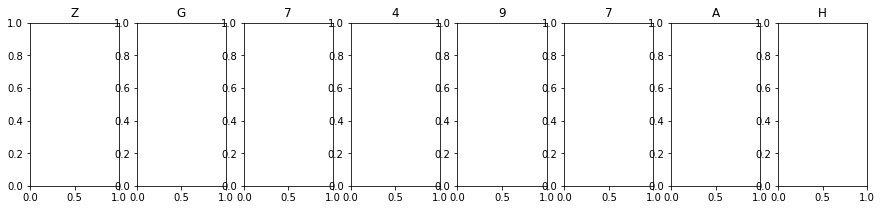

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

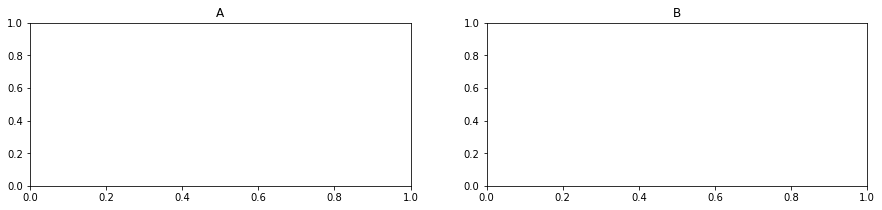

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

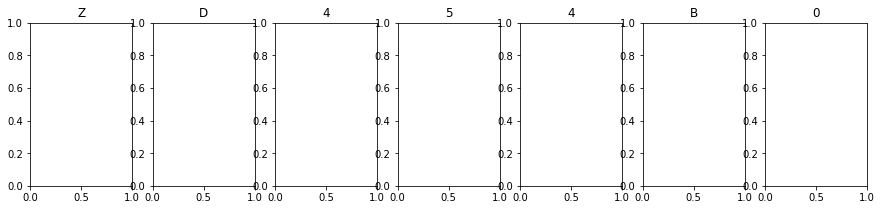

<Figure size 1008x288 with 0 Axes>

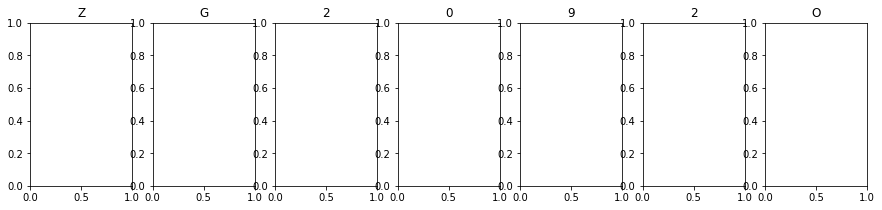

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

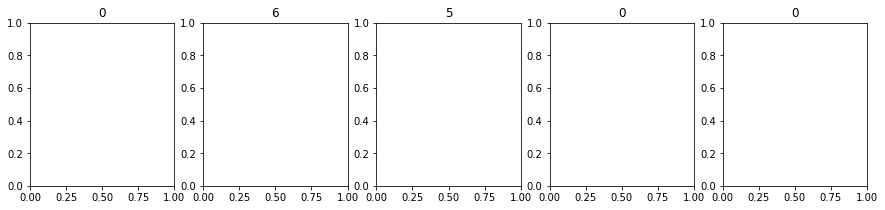

<Figure size 1008x288 with 0 Axes>

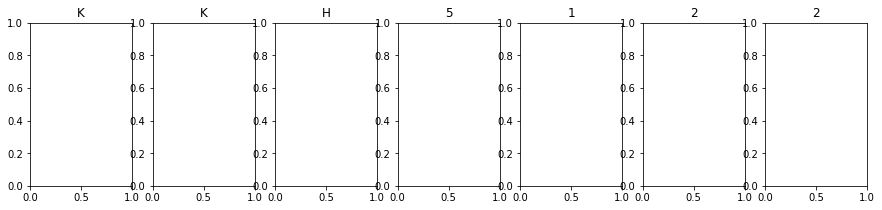

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

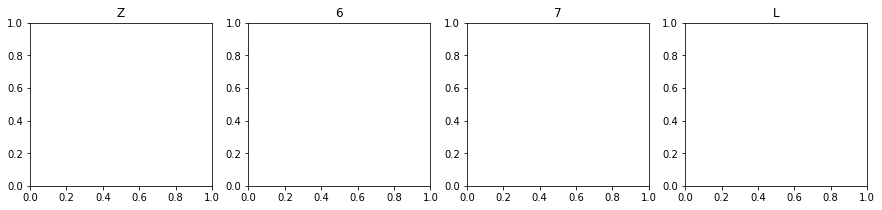

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

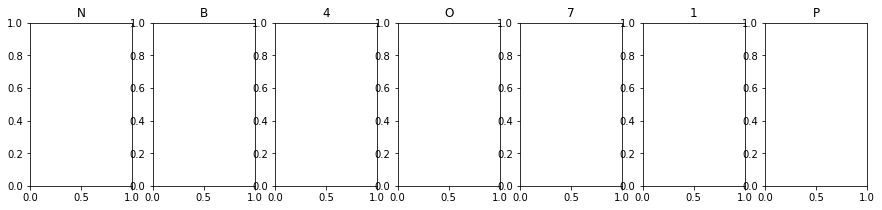

<Figure size 1008x288 with 0 Axes>

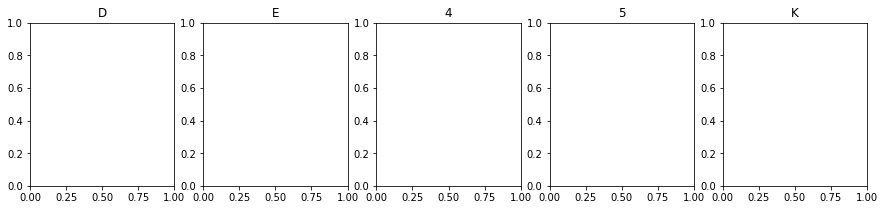

<Figure size 1008x288 with 0 Axes>

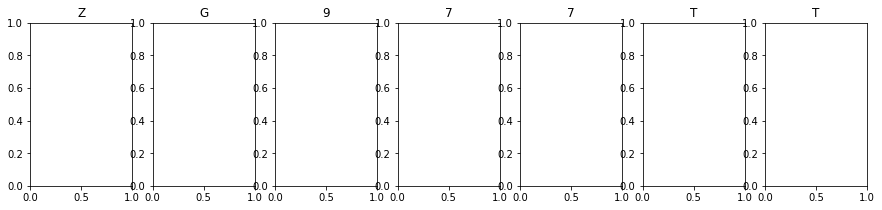

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

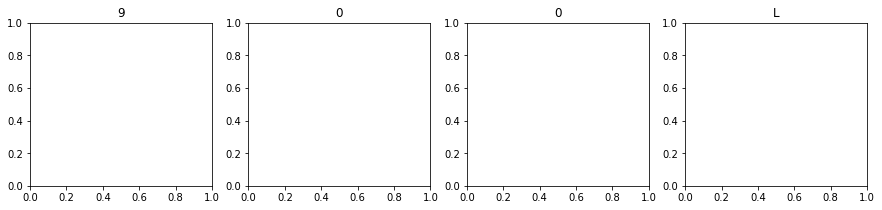

<Figure size 1008x288 with 0 Axes>

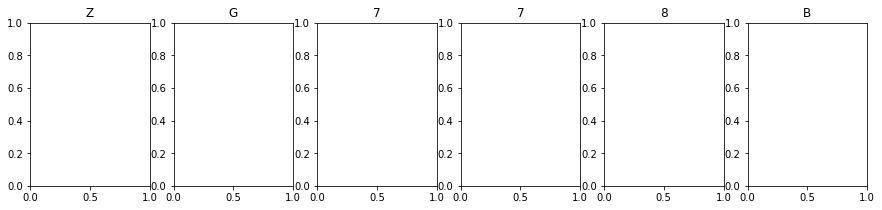

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

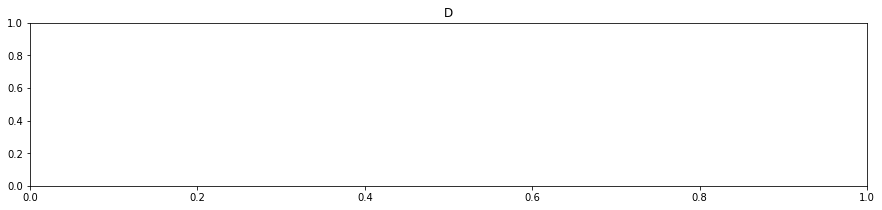

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

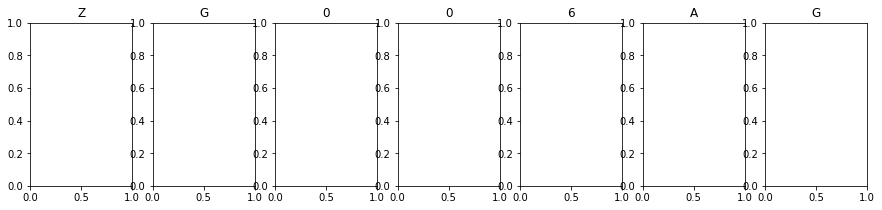

<Figure size 1008x288 with 0 Axes>

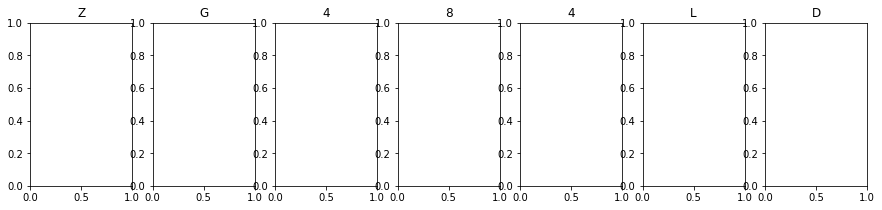

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

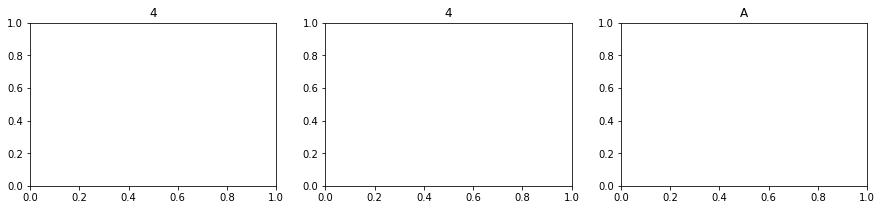

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

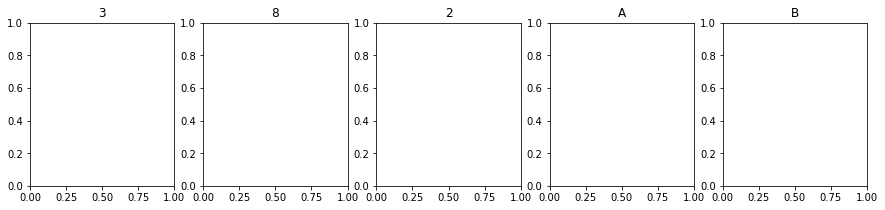

<Figure size 1008x288 with 0 Axes>

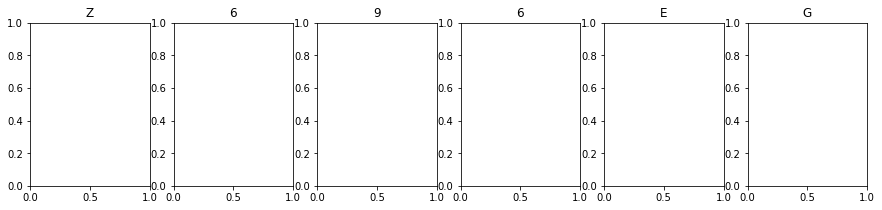

<Figure size 1008x288 with 0 Axes>

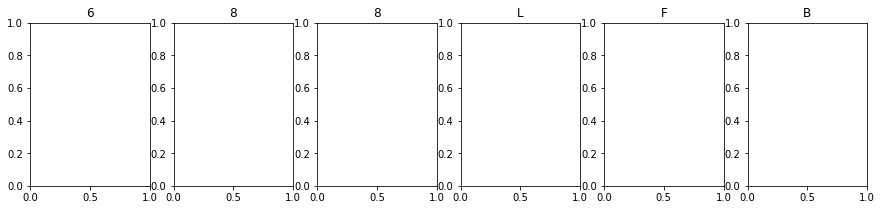

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

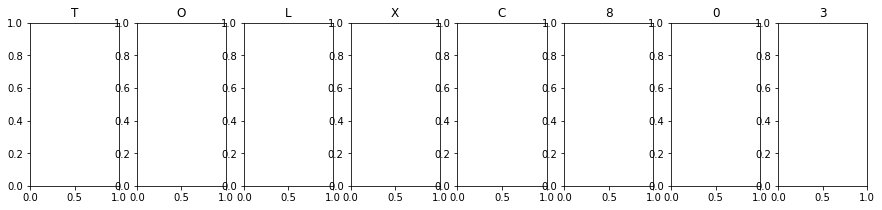

<Figure size 1008x288 with 0 Axes>

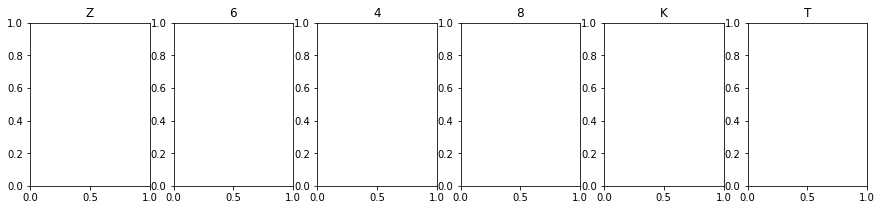

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

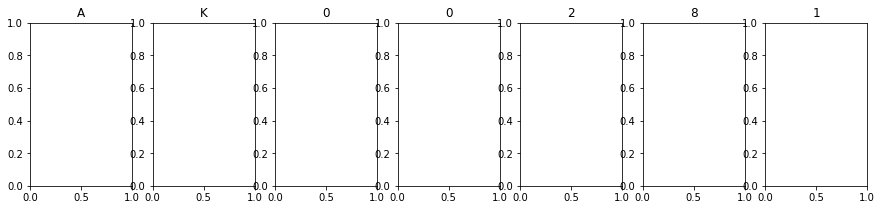

<Figure size 1008x288 with 0 Axes>

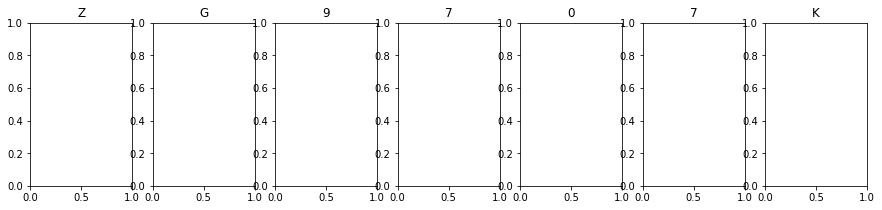

<Figure size 1008x288 with 0 Axes>

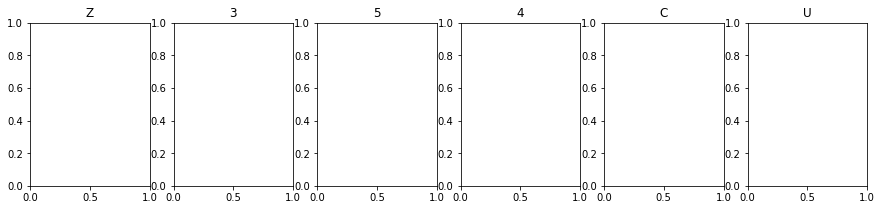

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

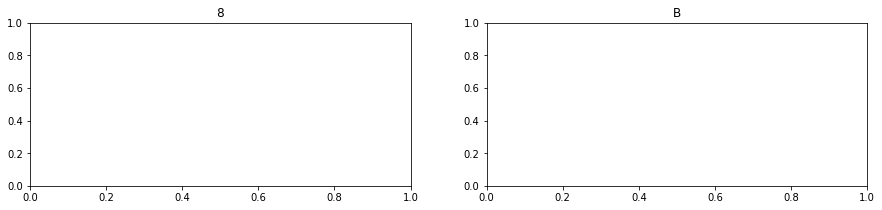

<Figure size 1008x288 with 0 Axes>

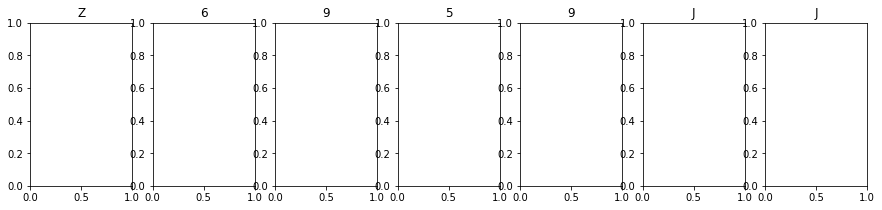

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

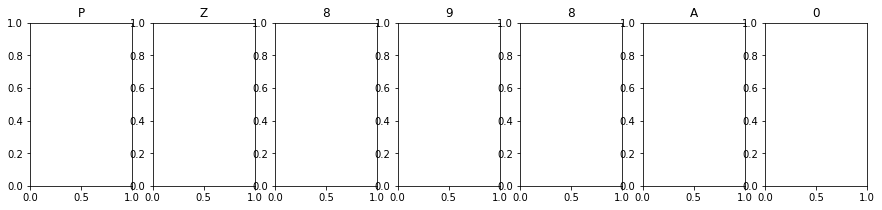

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

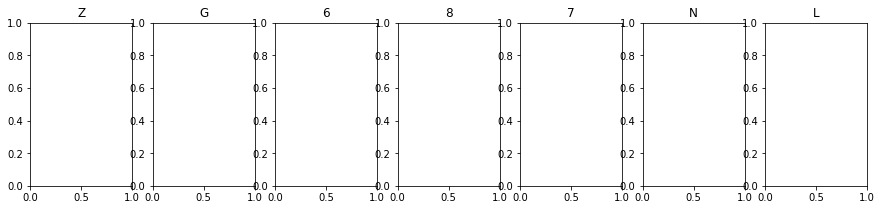

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

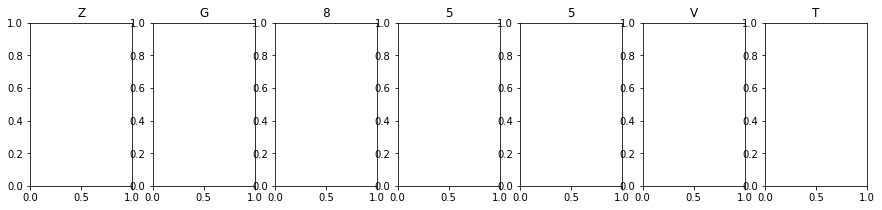

<Figure size 1008x288 with 0 Axes>

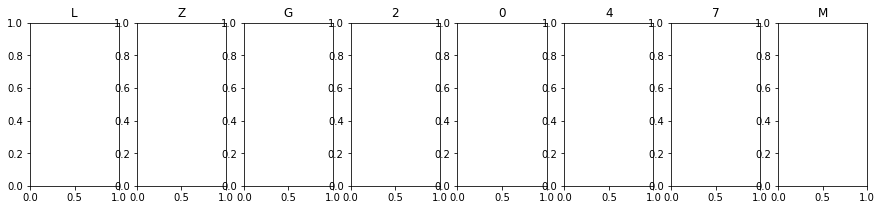

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

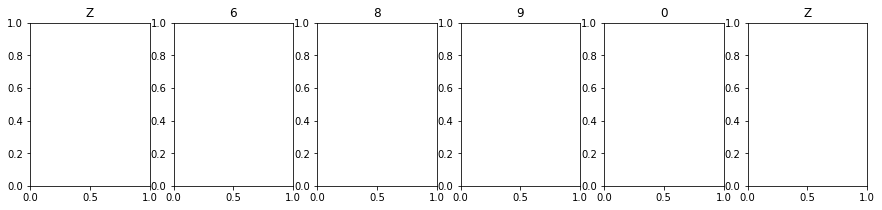

<Figure size 1008x288 with 0 Axes>

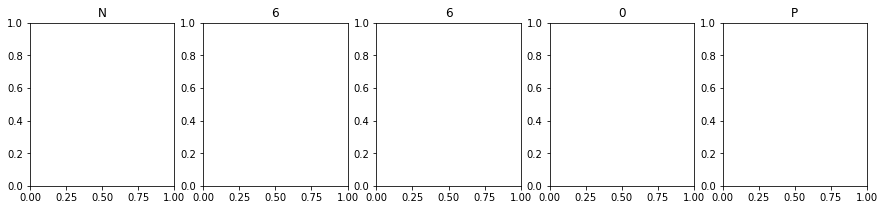

<Figure size 1008x288 with 0 Axes>

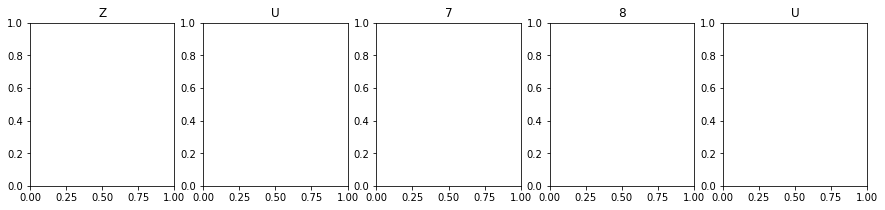

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

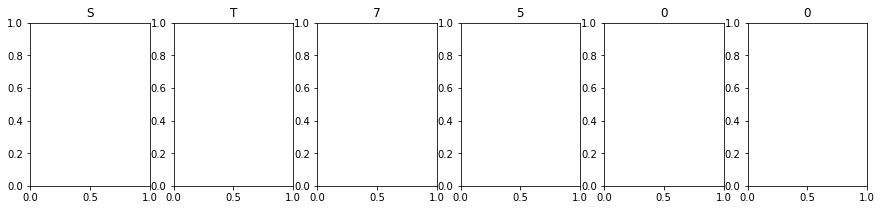

<Figure size 1008x288 with 0 Axes>

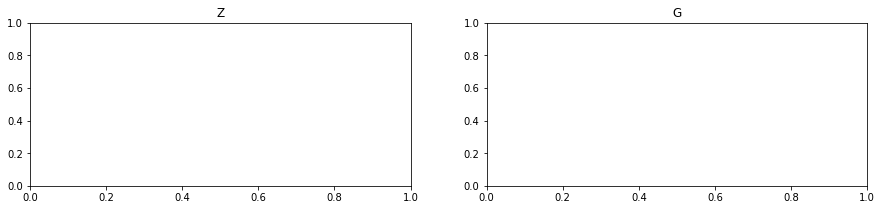

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

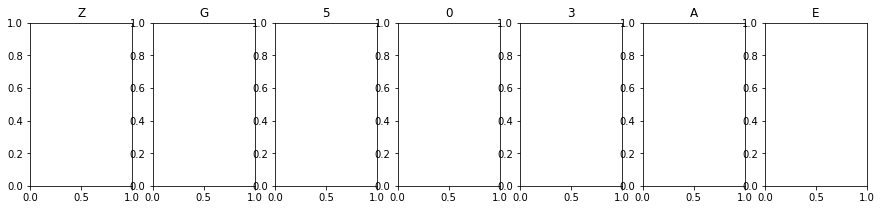

<Figure size 1008x288 with 0 Axes>

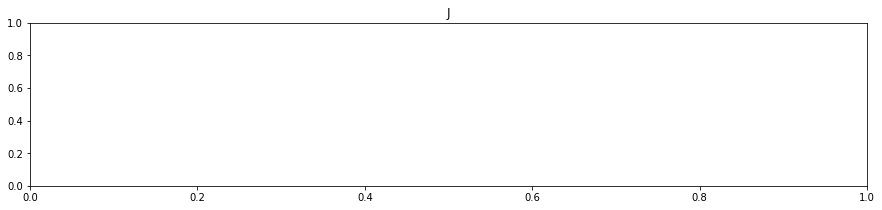

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

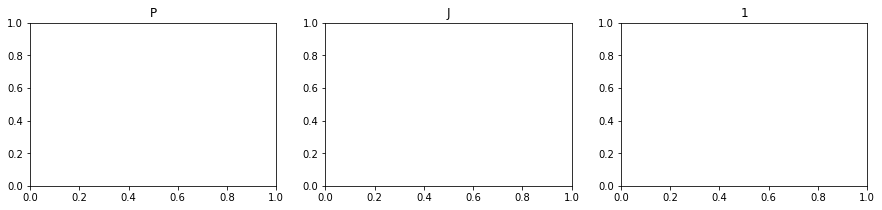

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

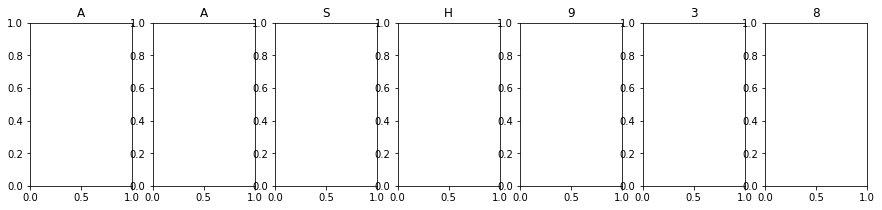

<Figure size 1008x288 with 0 Axes>

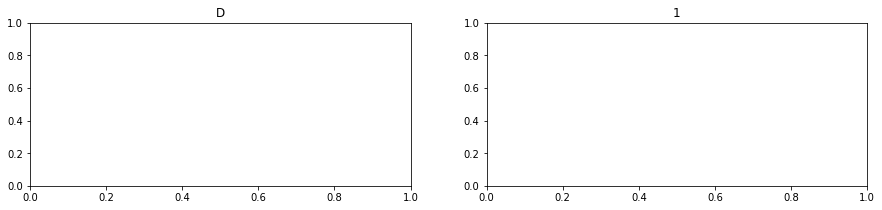

<Figure size 1008x288 with 0 Axes>

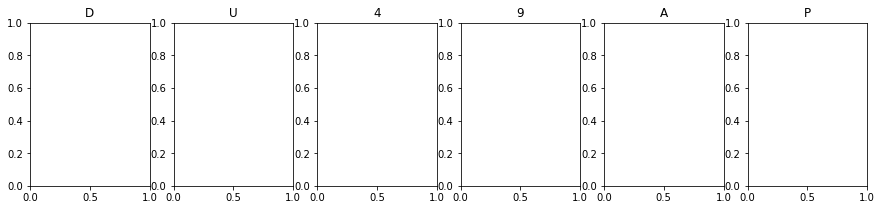

<Figure size 1008x288 with 0 Axes>

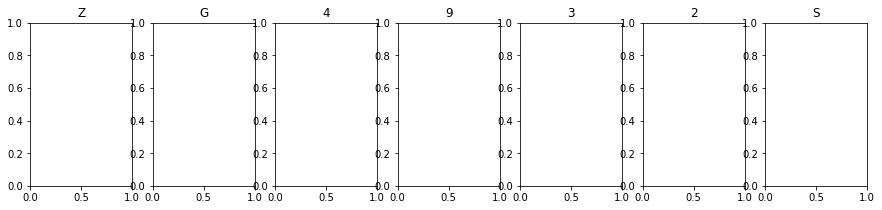

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

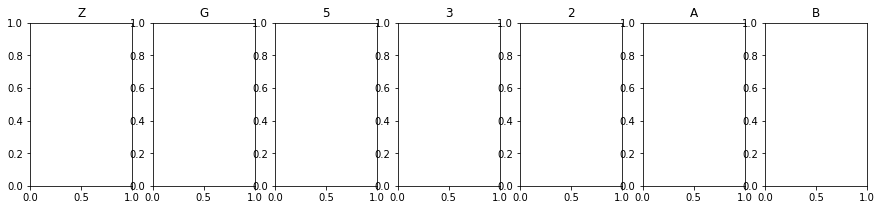

<Figure size 1008x288 with 0 Axes>

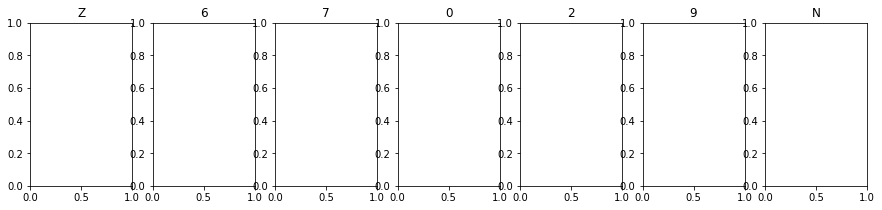

<Figure size 1008x288 with 0 Axes>

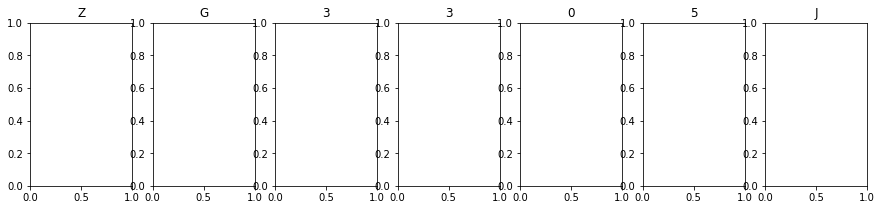

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

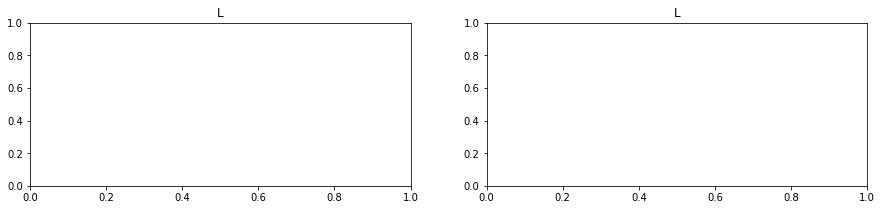

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

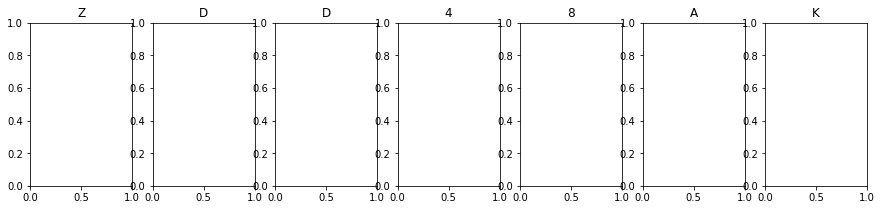

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

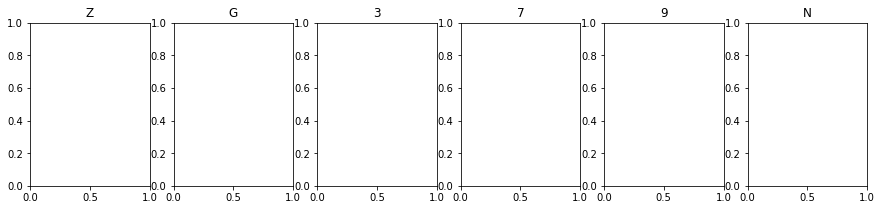

<Figure size 1008x288 with 0 Axes>

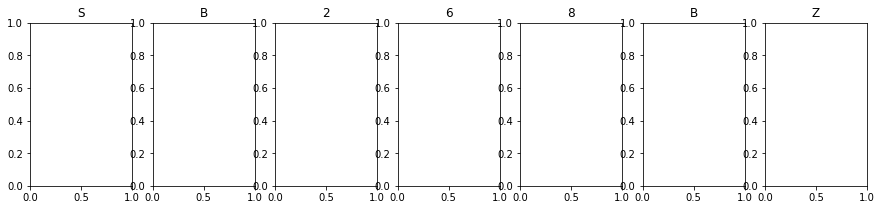

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

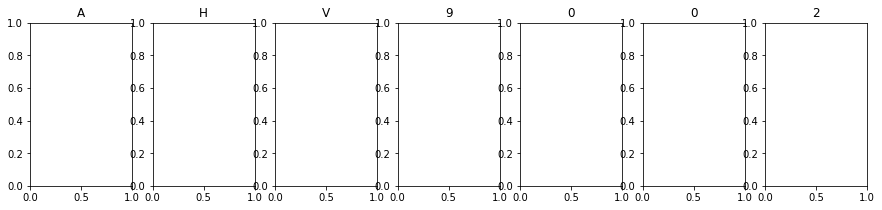

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

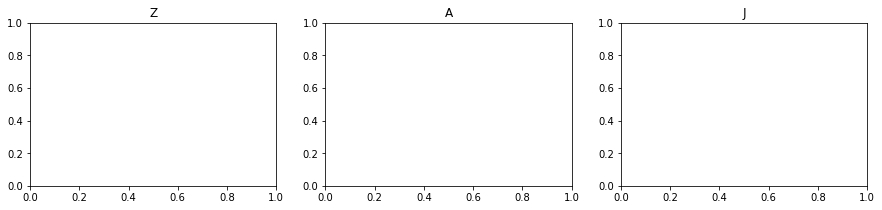

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

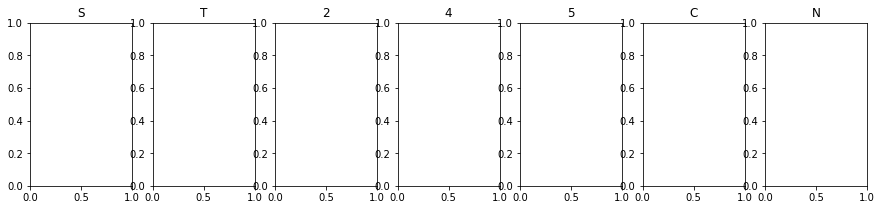

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

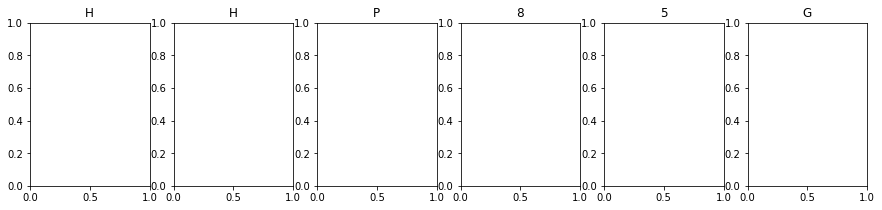

<Figure size 1008x288 with 0 Axes>

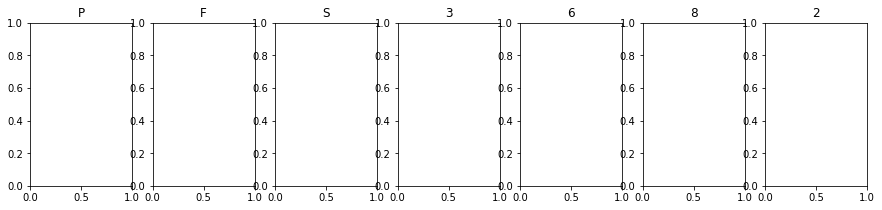

<Figure size 1008x288 with 0 Axes>

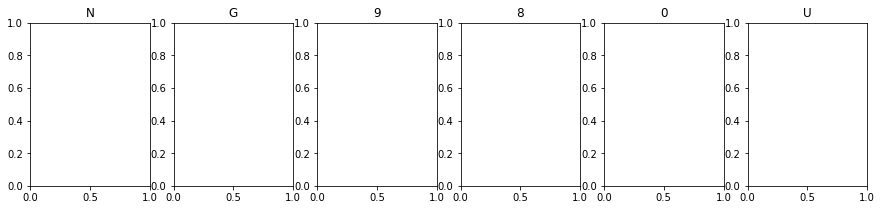

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

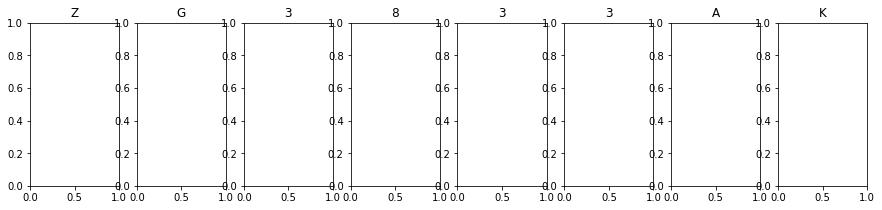

<Figure size 1008x288 with 0 Axes>

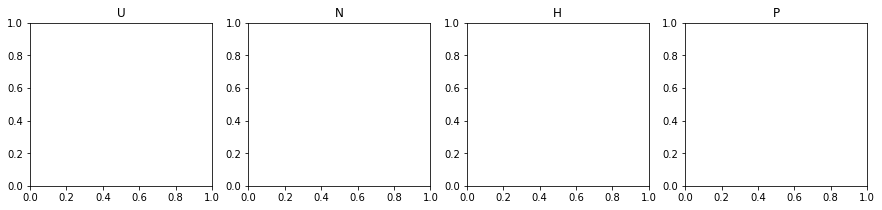

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

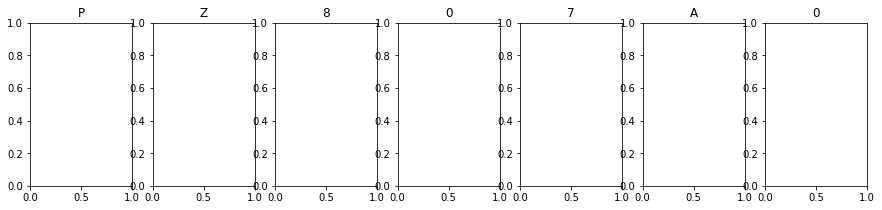

<Figure size 1008x288 with 0 Axes>

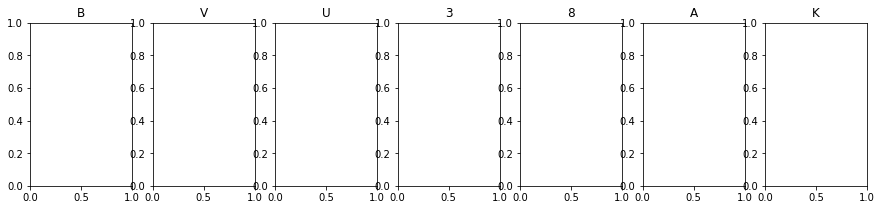

<Figure size 1008x288 with 0 Axes>

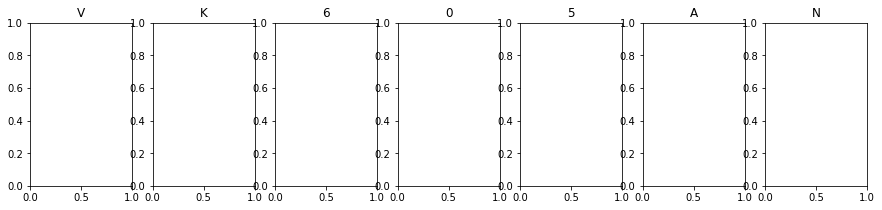

<Figure size 1008x288 with 0 Axes>

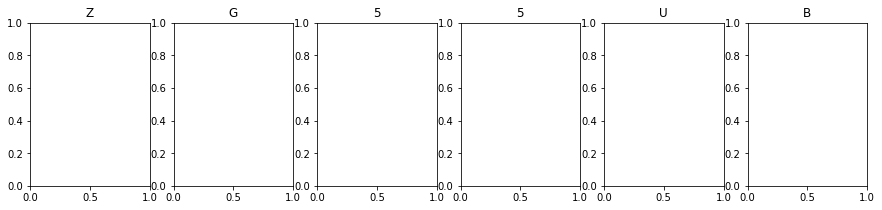

<Figure size 1008x288 with 0 Axes>

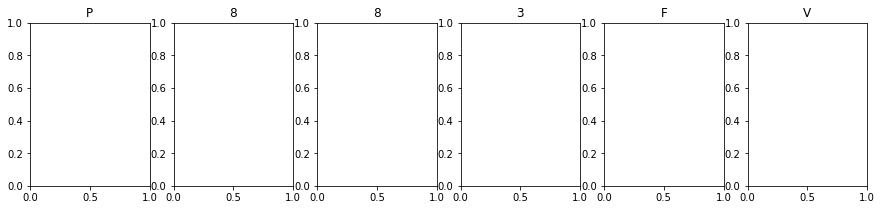

<Figure size 1008x288 with 0 Axes>

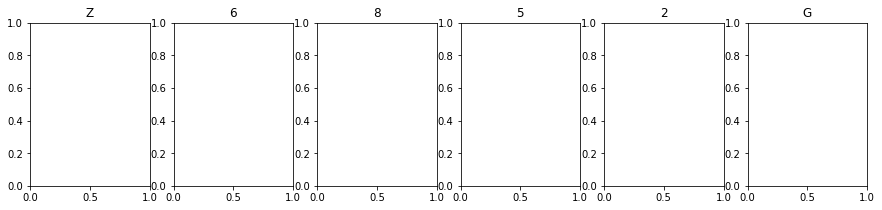

<Figure size 1008x288 with 0 Axes>

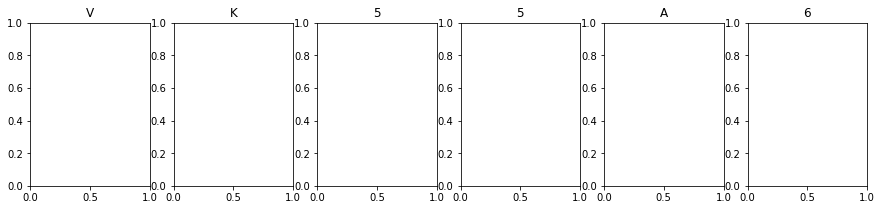

<Figure size 1008x288 with 0 Axes>

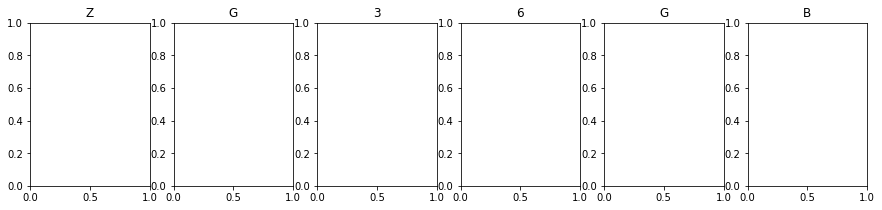

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

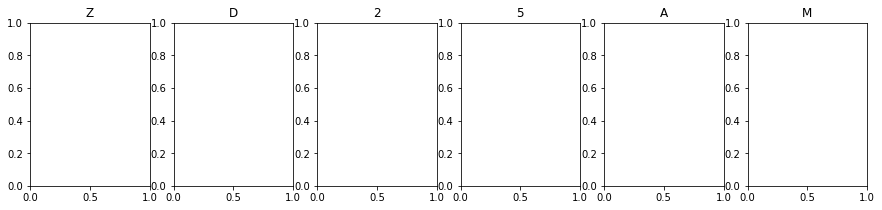

<Figure size 1008x288 with 0 Axes>

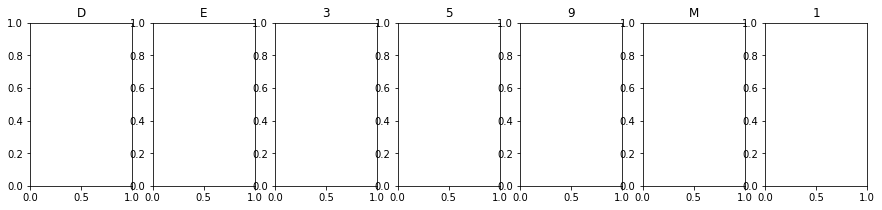

<Figure size 1008x288 with 0 Axes>

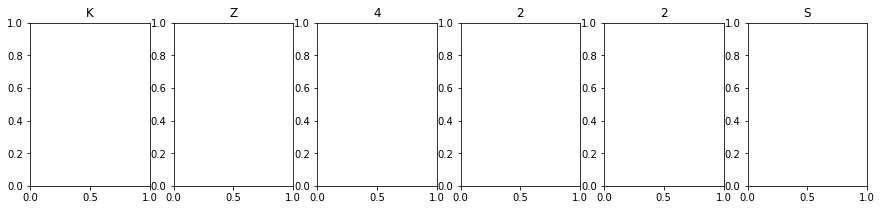

<Figure size 1008x288 with 0 Axes>

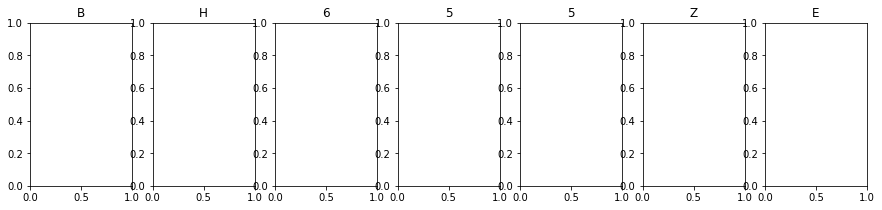

<Figure size 1008x288 with 0 Axes>

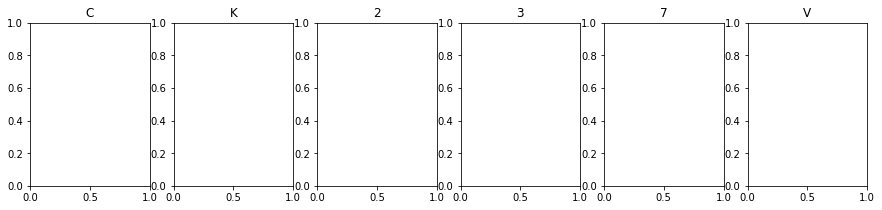

<Figure size 1008x288 with 0 Axes>

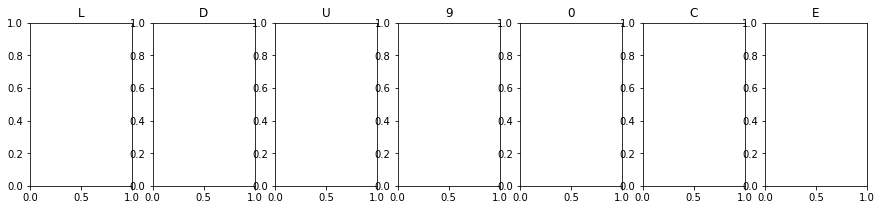

<Figure size 1008x288 with 0 Axes>

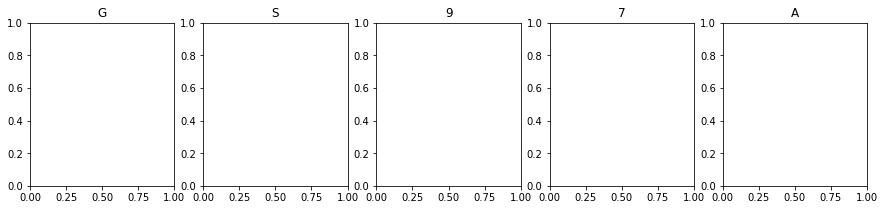

<Figure size 1008x288 with 0 Axes>

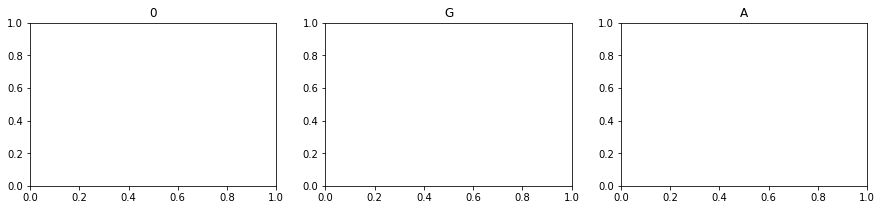

<Figure size 1008x288 with 0 Axes>

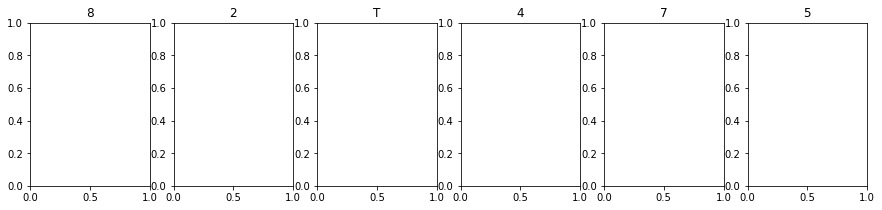

<Figure size 1008x288 with 0 Axes>

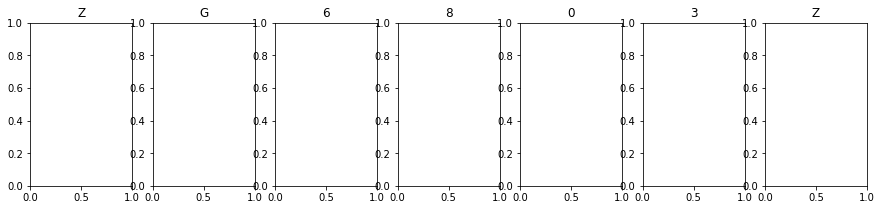

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

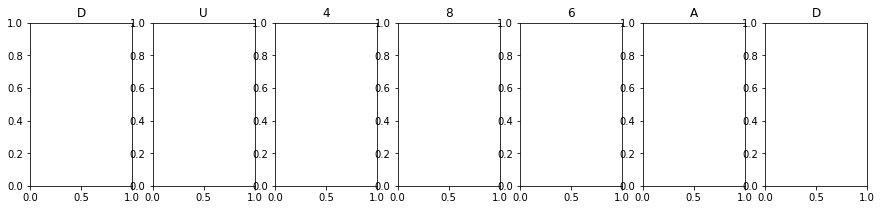

<Figure size 1008x288 with 0 Axes>

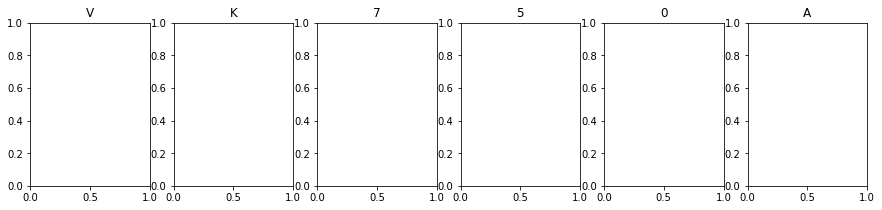

<Figure size 1008x288 with 0 Axes>

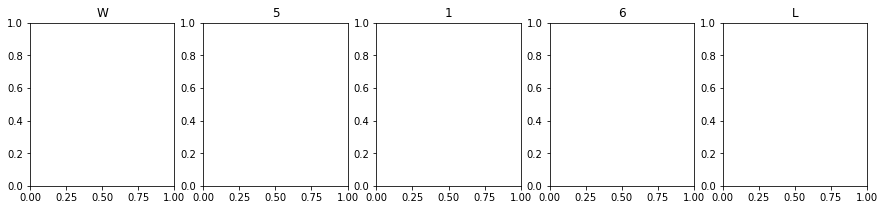

<Figure size 1008x288 with 0 Axes>

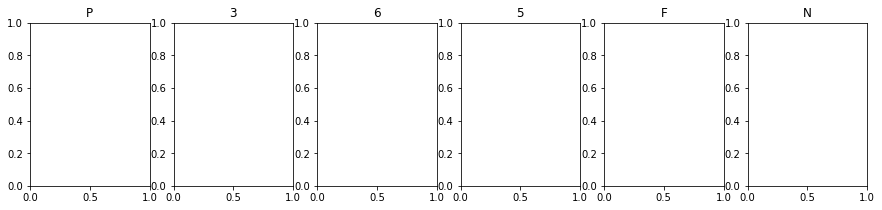

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

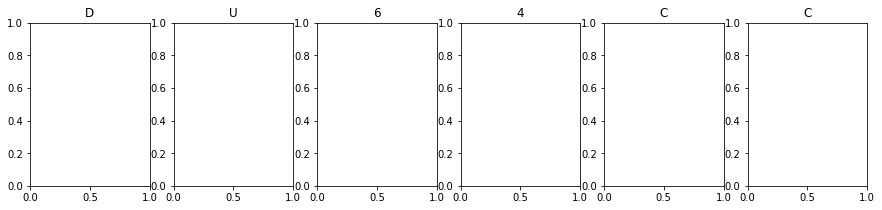

<Figure size 1008x288 with 0 Axes>

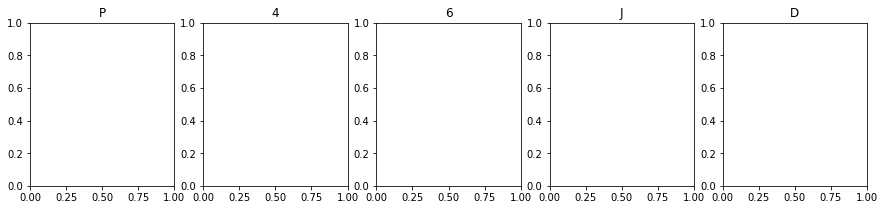

<Figure size 1008x288 with 0 Axes>

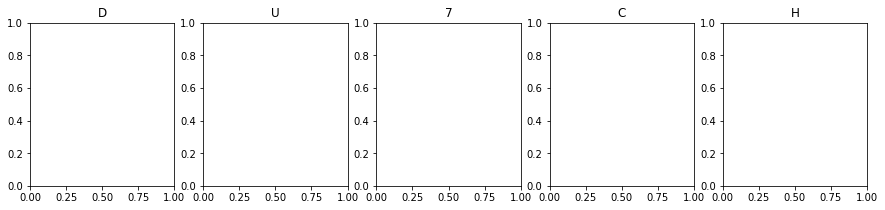

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

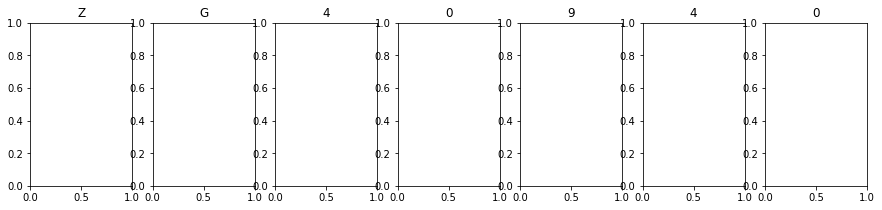

<Figure size 1008x288 with 0 Axes>

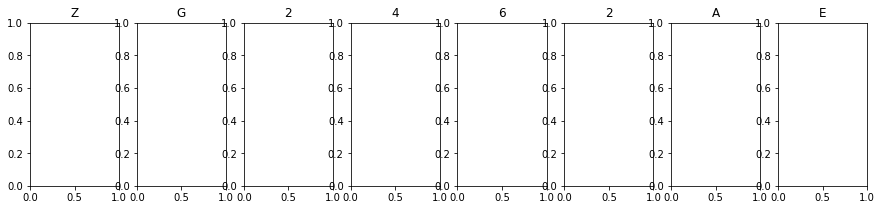

<Figure size 1008x288 with 0 Axes>

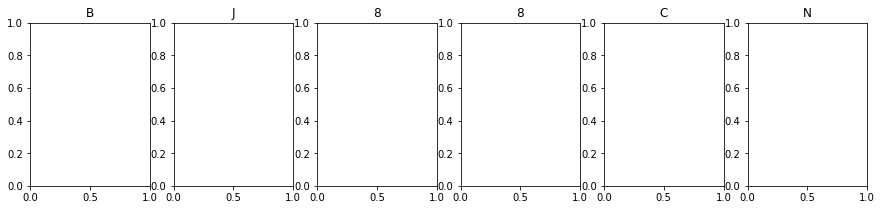

<Figure size 1008x288 with 0 Axes>

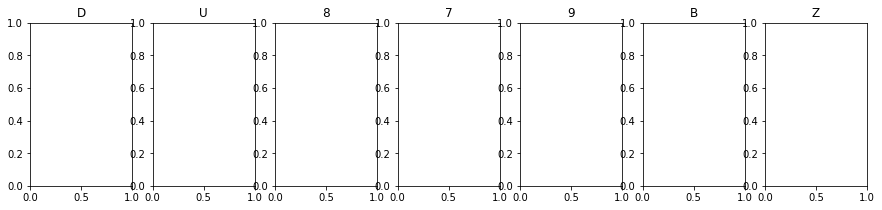

<Figure size 1008x288 with 0 Axes>

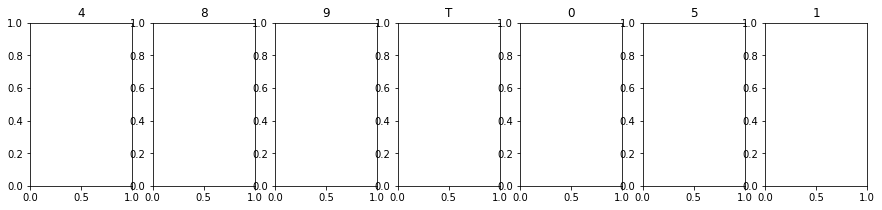

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

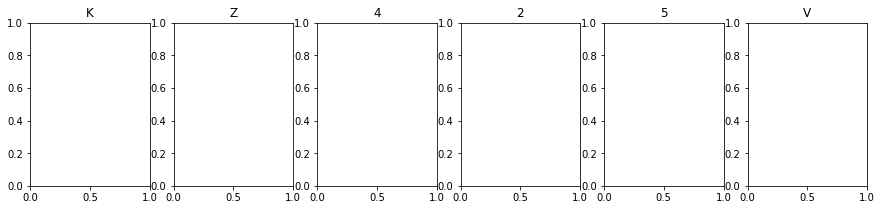

<Figure size 1008x288 with 0 Axes>

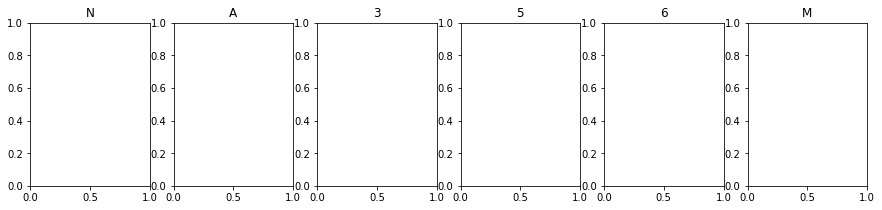

<Figure size 1008x288 with 0 Axes>

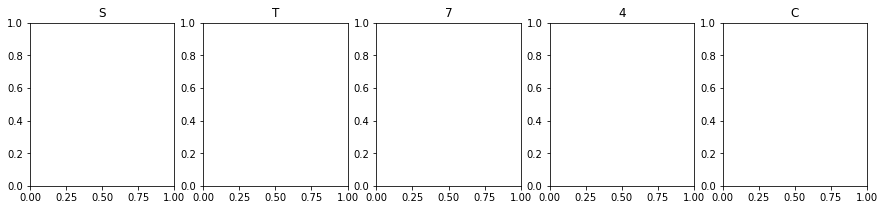

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

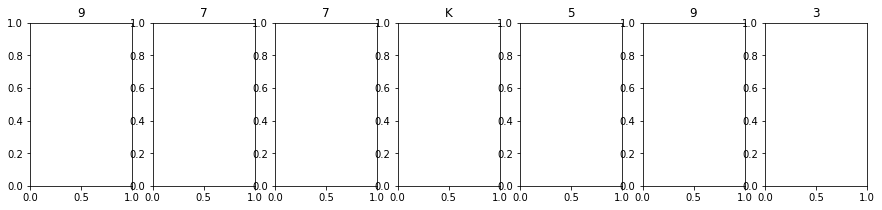

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

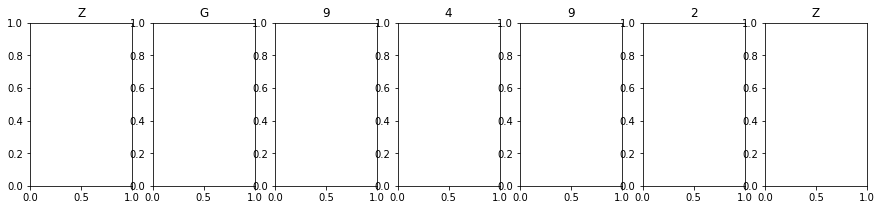

<Figure size 1008x288 with 0 Axes>

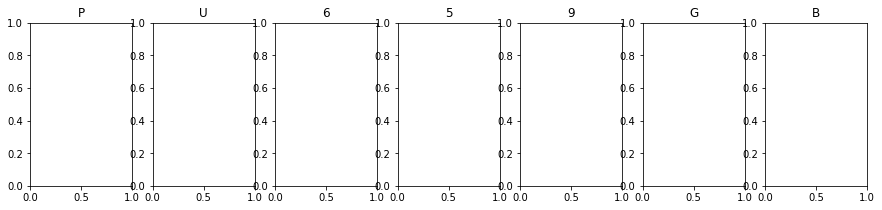

<Figure size 1008x288 with 0 Axes>

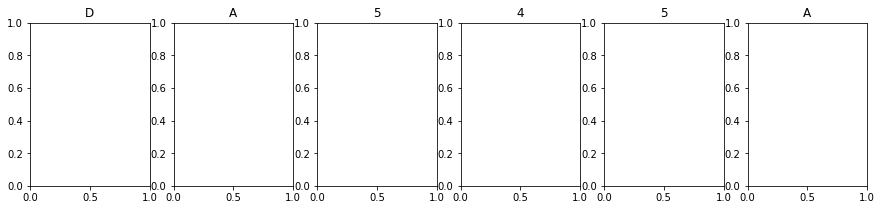

<Figure size 1008x288 with 0 Axes>

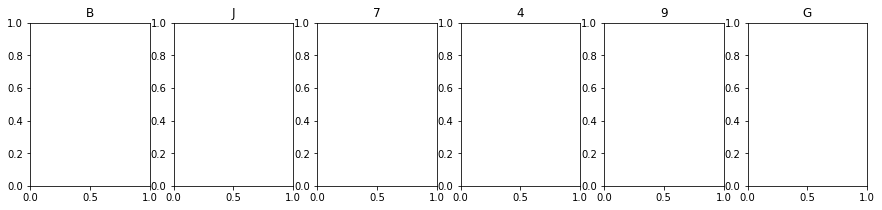

<Figure size 1008x288 with 0 Axes>

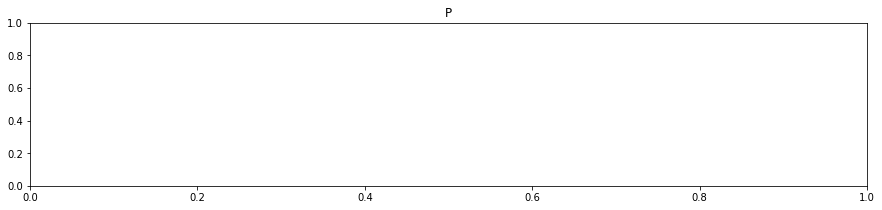

<Figure size 1008x288 with 0 Axes>

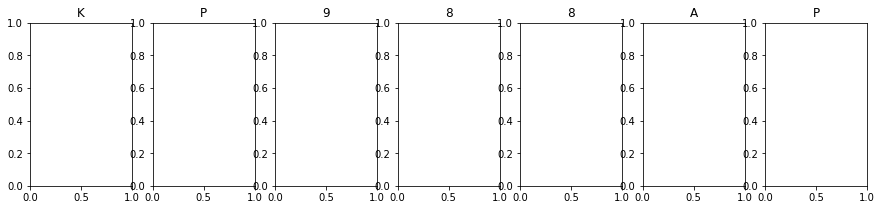

<Figure size 1008x288 with 0 Axes>

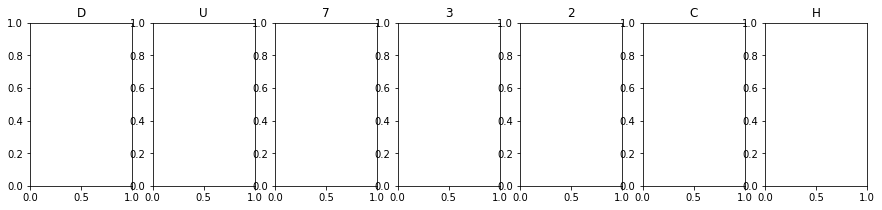

<Figure size 1008x288 with 0 Axes>

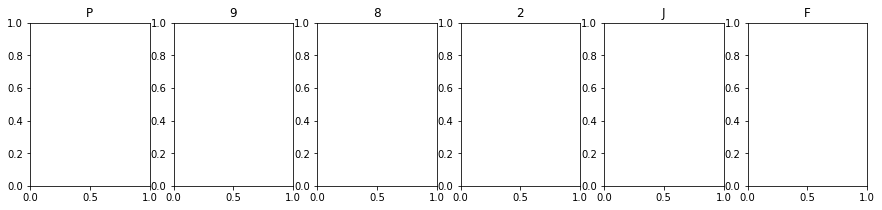

<Figure size 1008x288 with 0 Axes>

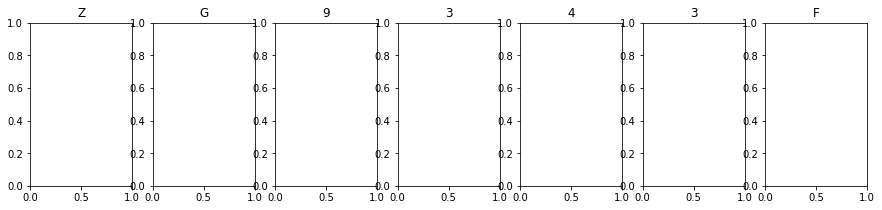

<Figure size 1008x288 with 0 Axes>

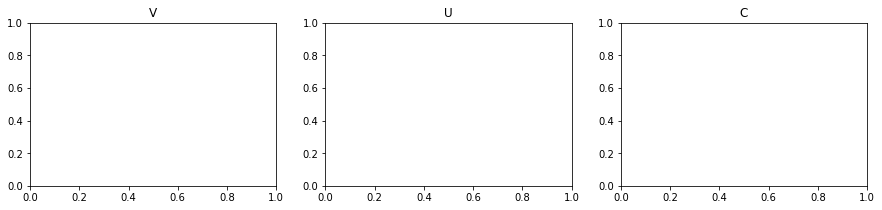

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

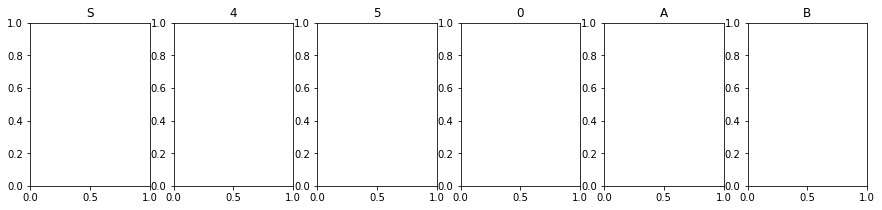

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

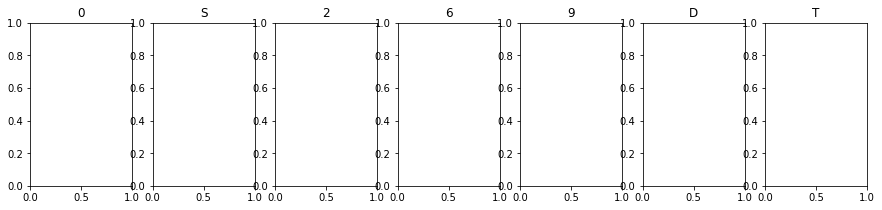

<Figure size 1008x288 with 0 Axes>

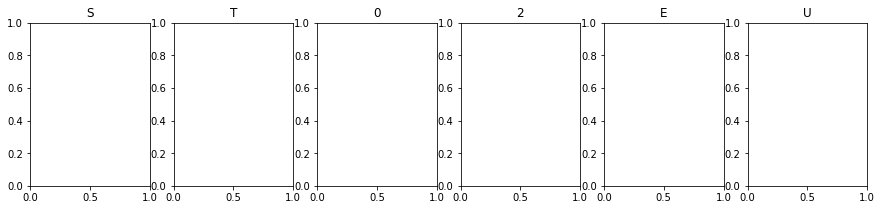

<Figure size 1008x288 with 0 Axes>

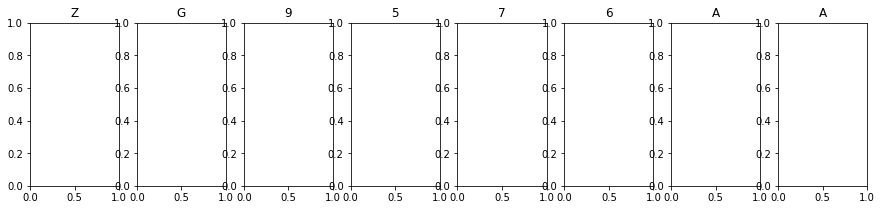

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

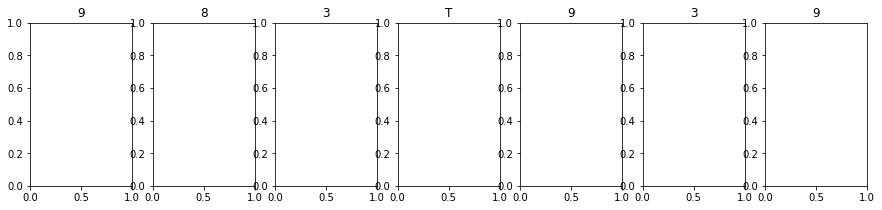

<Figure size 1008x288 with 0 Axes>

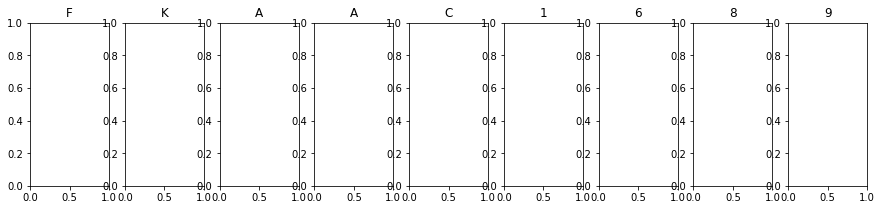

<Figure size 1008x288 with 0 Axes>

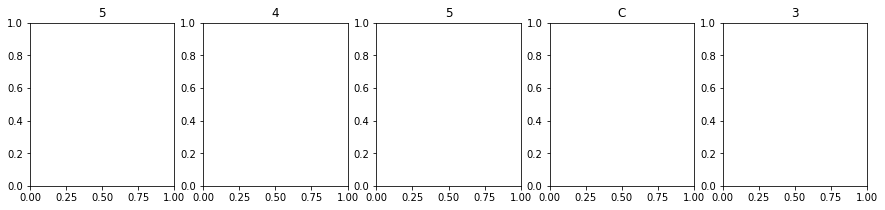

<Figure size 1008x288 with 0 Axes>

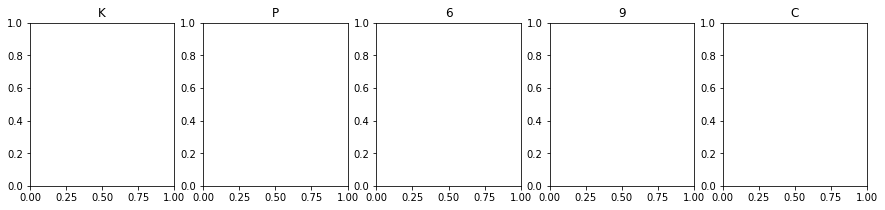

<Figure size 1008x288 with 0 Axes>

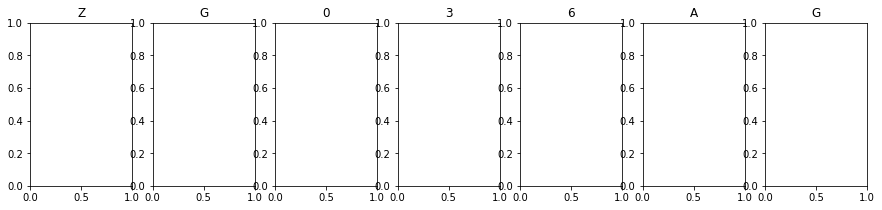

<Figure size 1008x288 with 0 Axes>

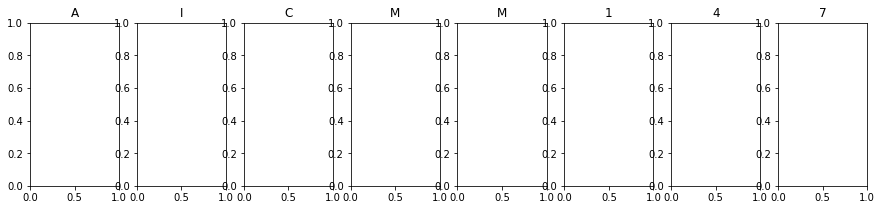

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

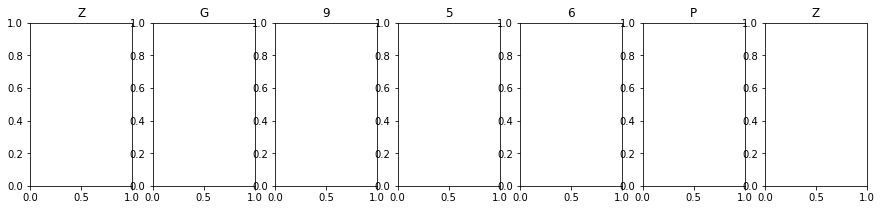

<Figure size 1008x288 with 0 Axes>

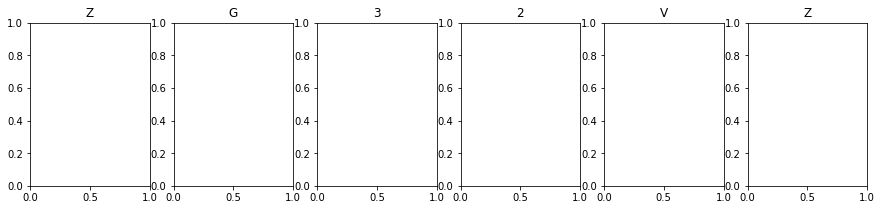

<Figure size 1008x288 with 0 Axes>

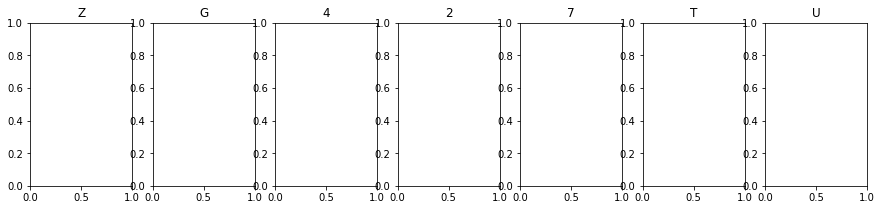

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

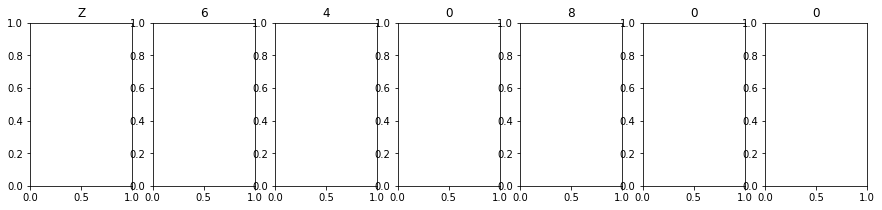

<Figure size 1008x288 with 0 Axes>

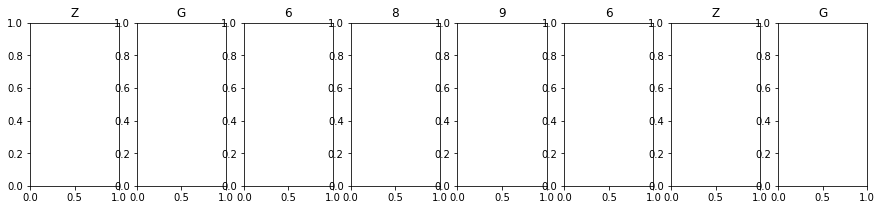

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

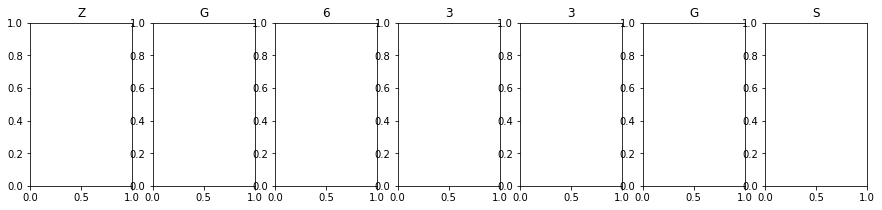

<Figure size 1008x288 with 0 Axes>

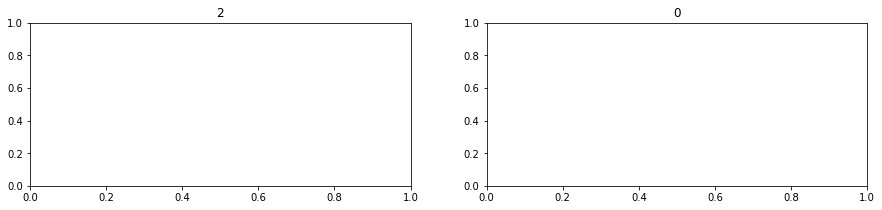

<Figure size 1008x288 with 0 Axes>

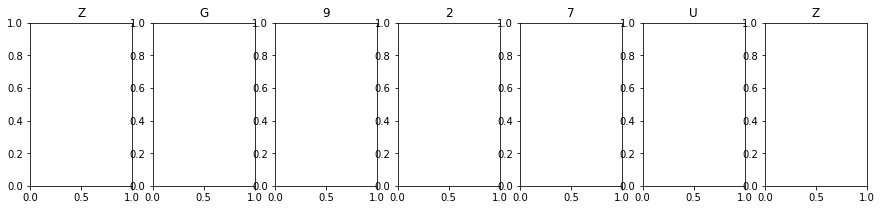

<Figure size 1008x288 with 0 Axes>

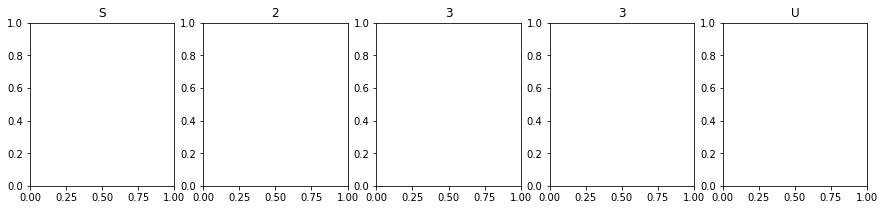

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

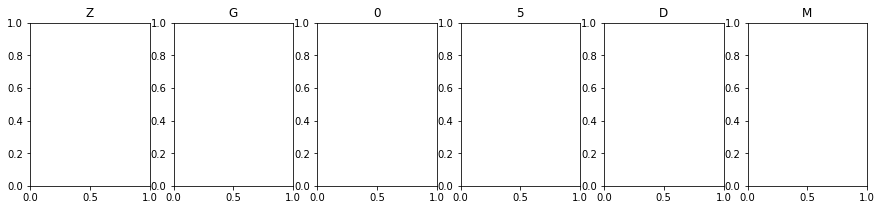

<Figure size 1008x288 with 0 Axes>

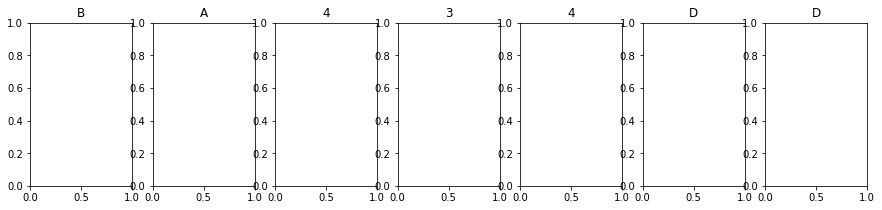

<Figure size 1008x288 with 0 Axes>

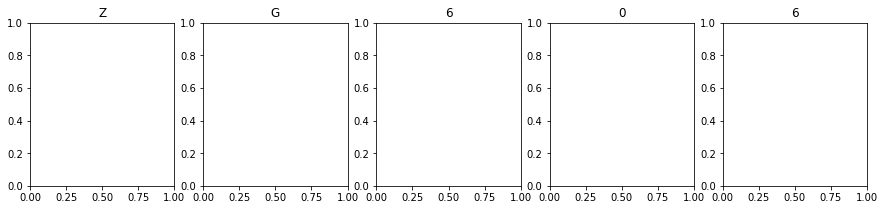

<Figure size 1008x288 with 0 Axes>

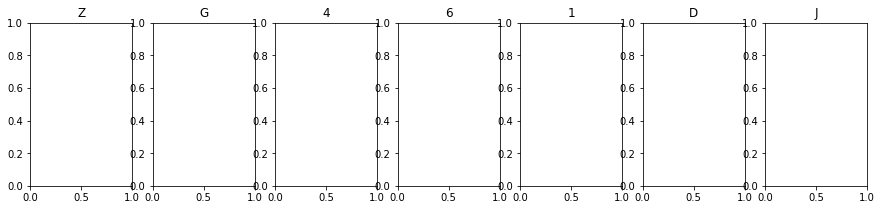

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

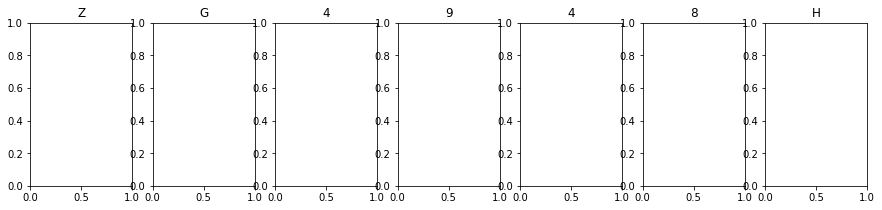

<Figure size 1008x288 with 0 Axes>

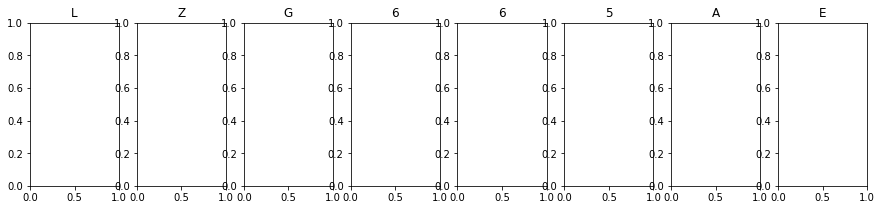

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

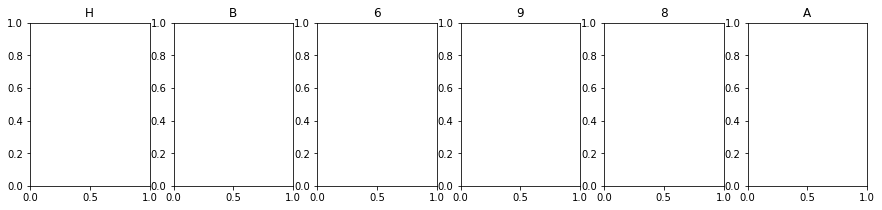

<Figure size 1008x288 with 0 Axes>

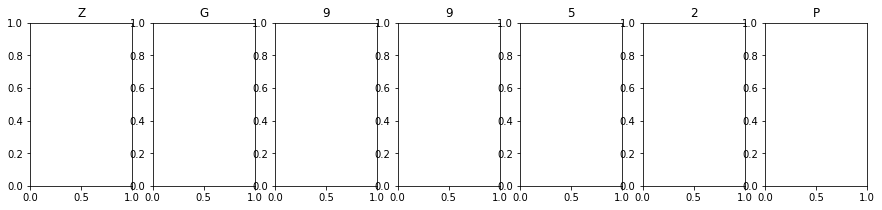

<Figure size 1008x288 with 0 Axes>

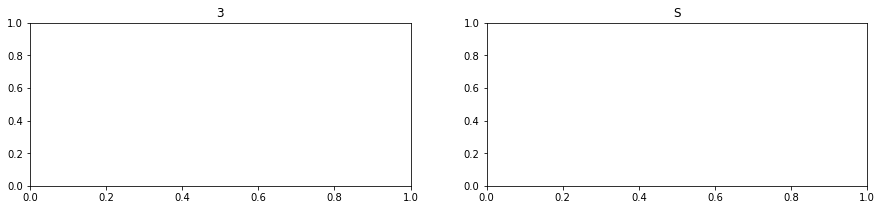

<Figure size 1008x288 with 0 Axes>

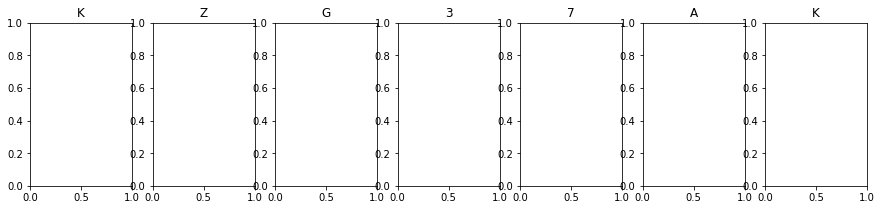

<Figure size 1008x288 with 0 Axes>

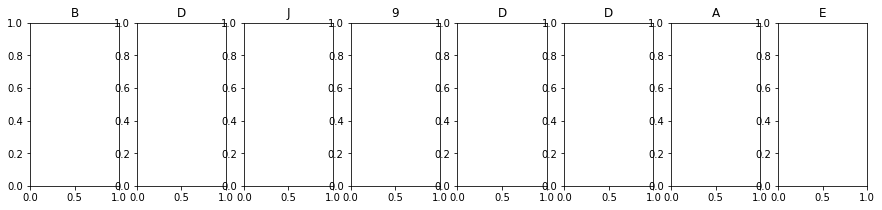

<Figure size 1008x288 with 0 Axes>

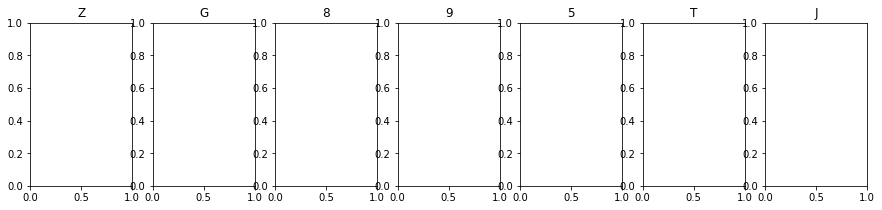

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

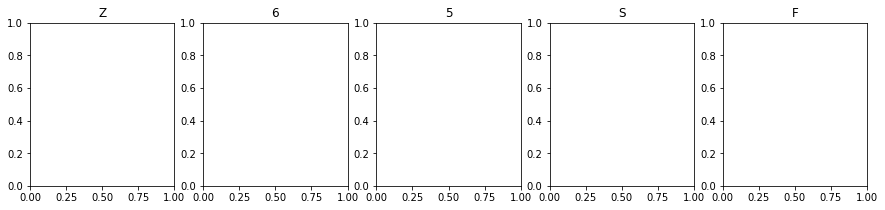

<Figure size 1008x288 with 0 Axes>

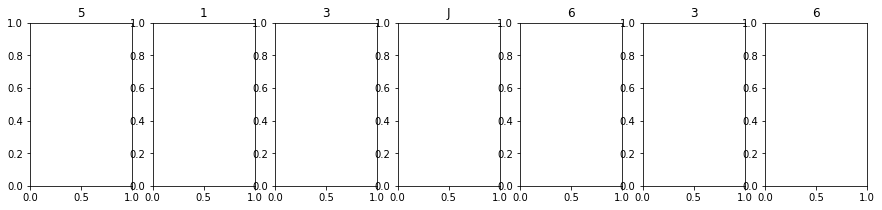

<Figure size 1008x288 with 0 Axes>

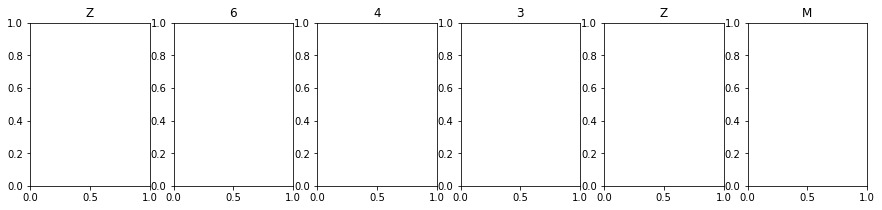

<Figure size 1008x288 with 0 Axes>

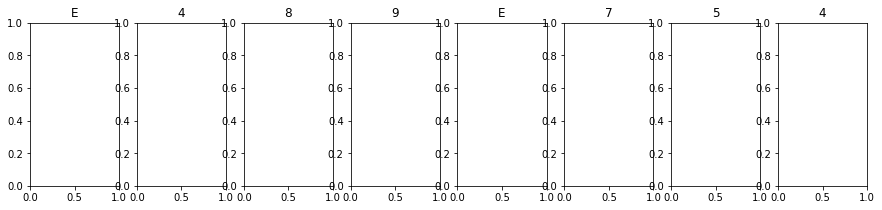

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

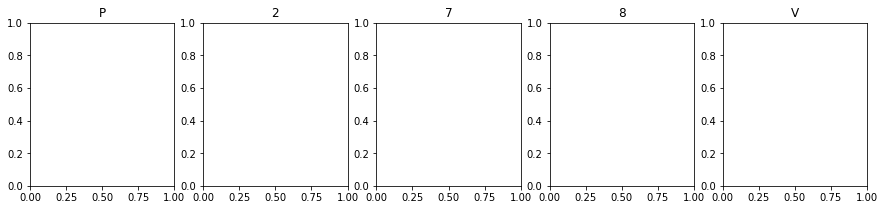

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

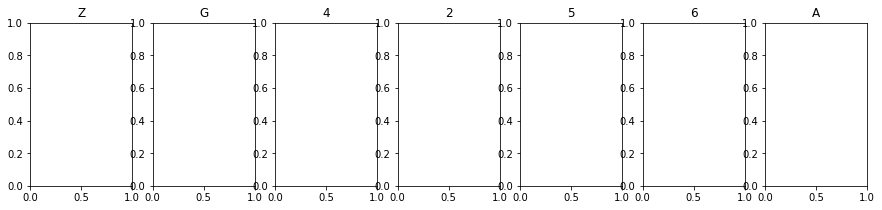

<Figure size 1008x288 with 0 Axes>

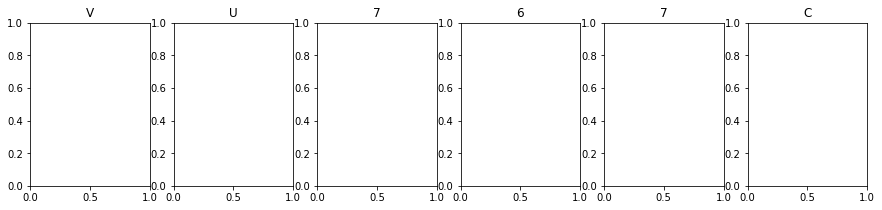

<Figure size 1008x288 with 0 Axes>

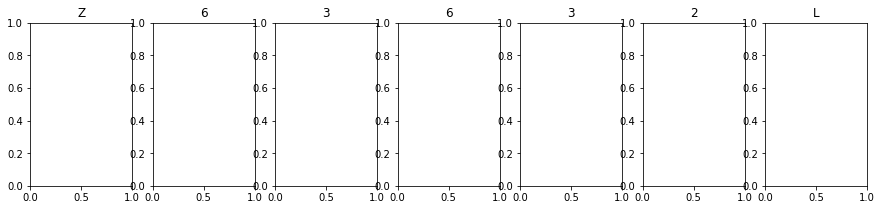

<Figure size 1008x288 with 0 Axes>

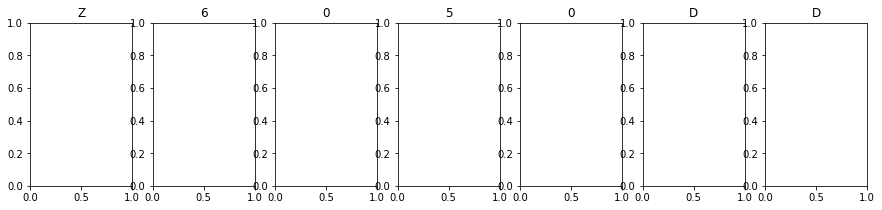

<Figure size 1008x288 with 0 Axes>

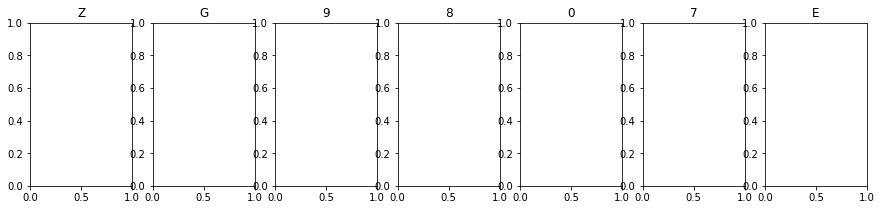

<Figure size 1008x288 with 0 Axes>

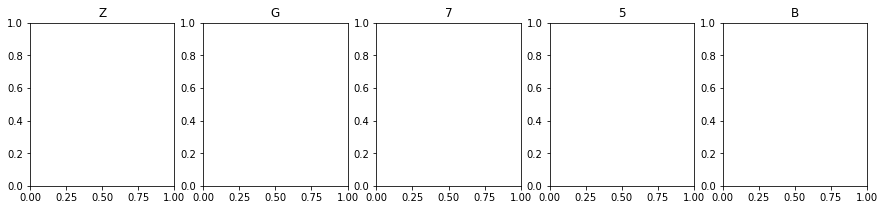

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

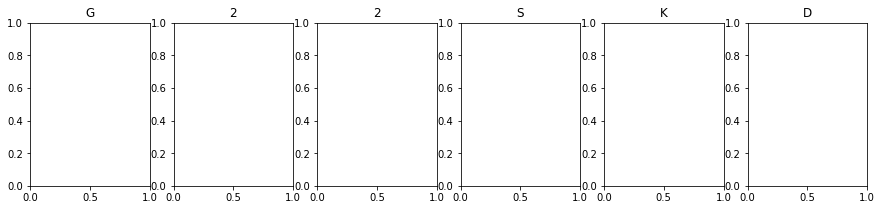

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

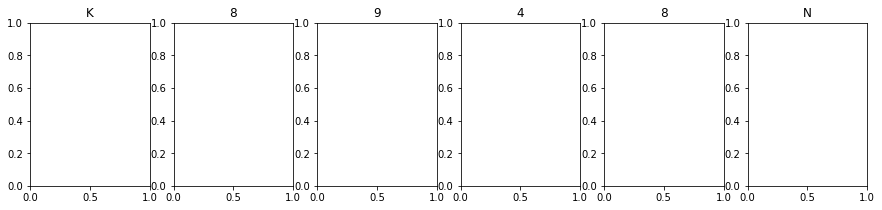

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

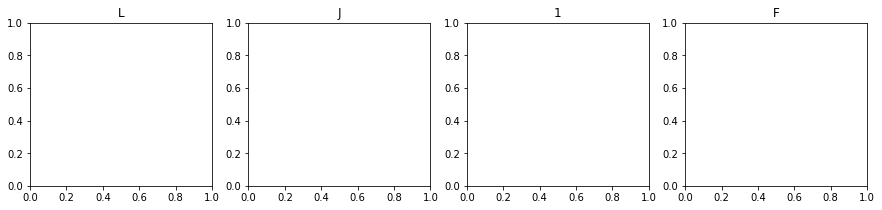

<Figure size 1008x288 with 0 Axes>

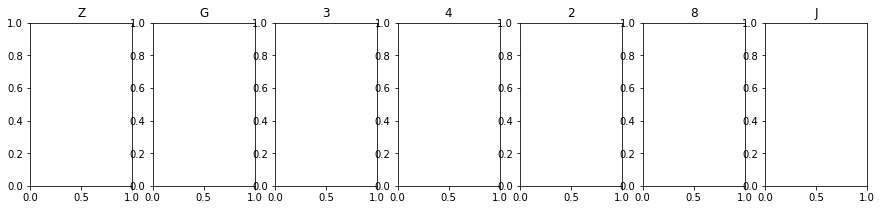

<Figure size 1008x288 with 0 Axes>

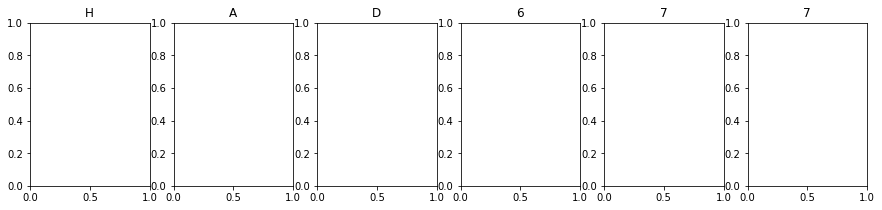

<Figure size 1008x288 with 0 Axes>

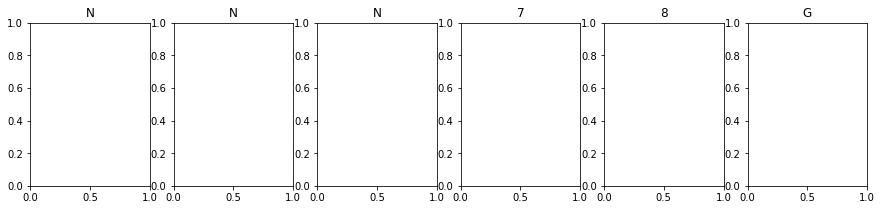

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

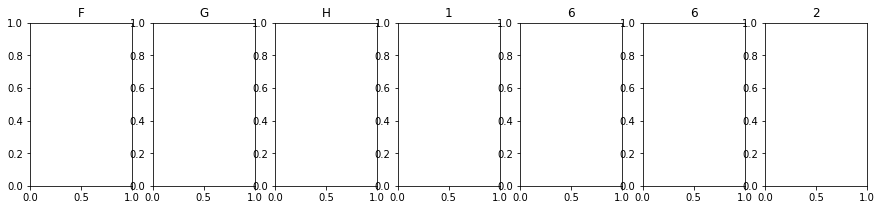

<Figure size 1008x288 with 0 Axes>

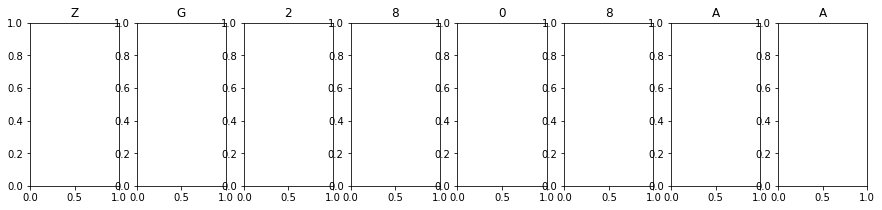

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

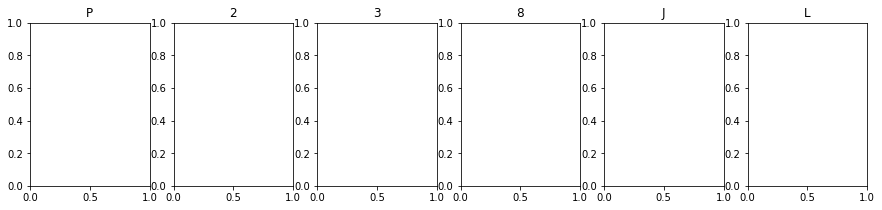

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

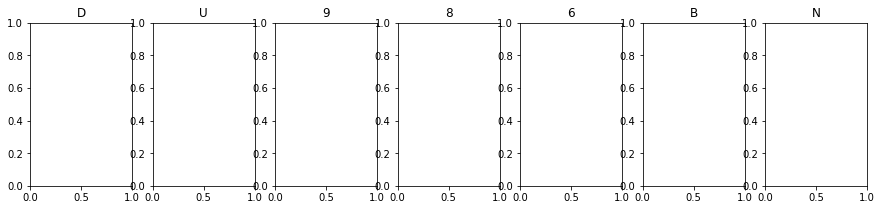

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

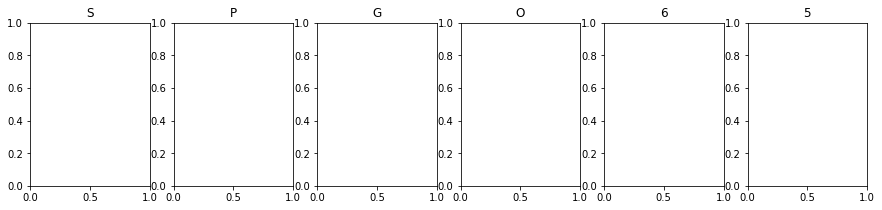

<Figure size 1008x288 with 0 Axes>

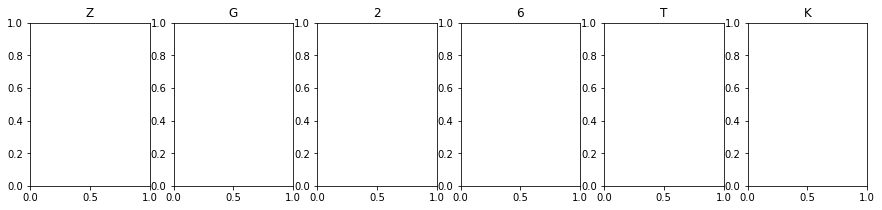

<Figure size 1008x288 with 0 Axes>

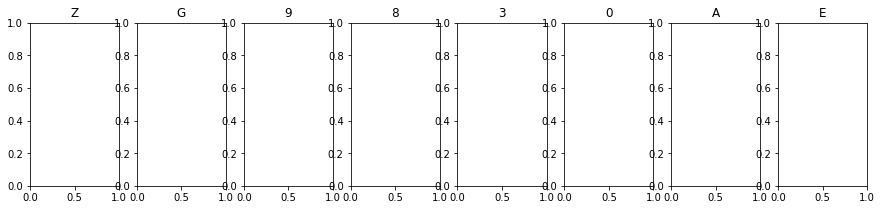

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

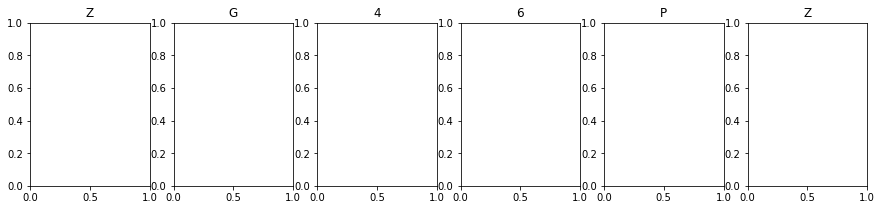

<Figure size 1008x288 with 0 Axes>

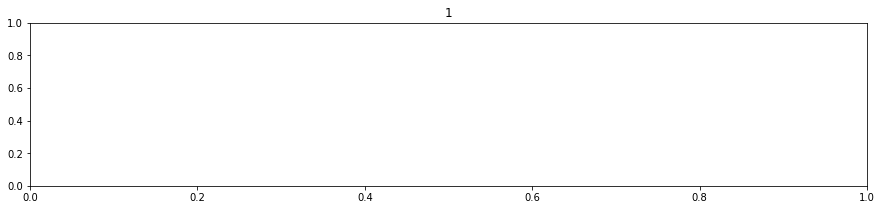

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

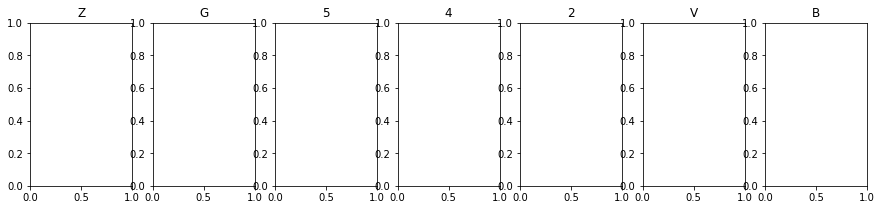

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

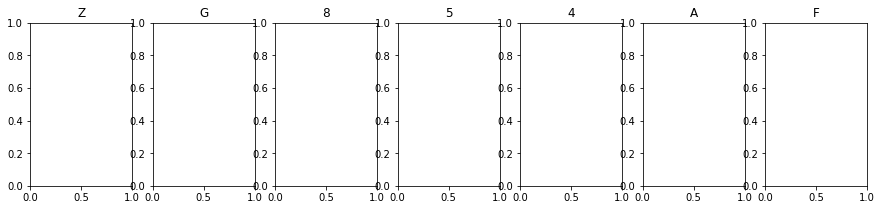

<Figure size 1008x288 with 0 Axes>

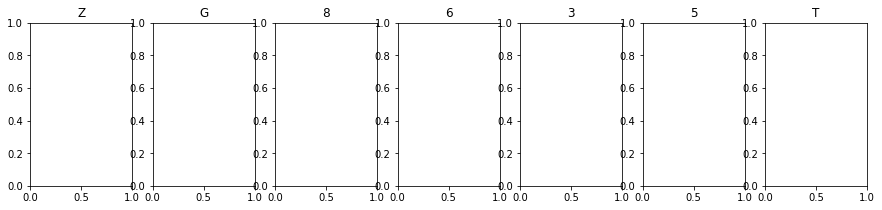

<Figure size 1008x288 with 0 Axes>

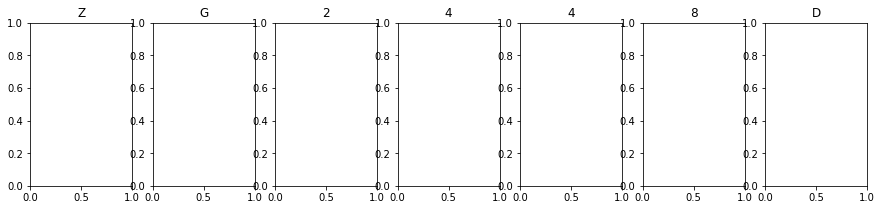

<Figure size 1008x288 with 0 Axes>

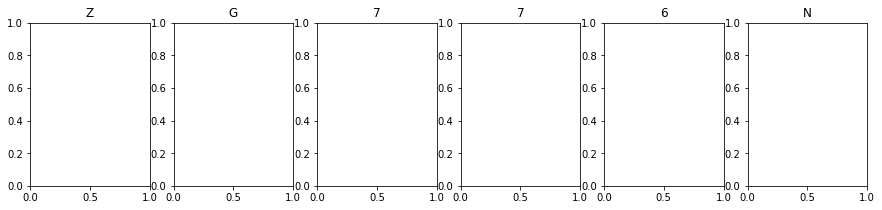

<Figure size 1008x288 with 0 Axes>

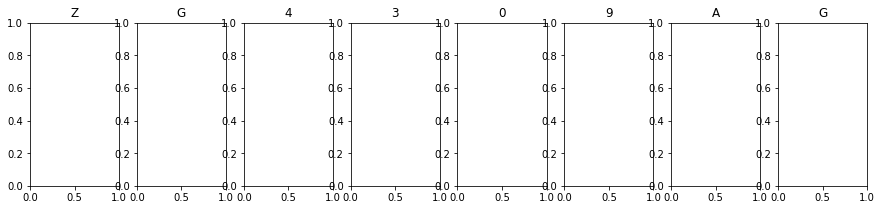

<Figure size 1008x288 with 0 Axes>

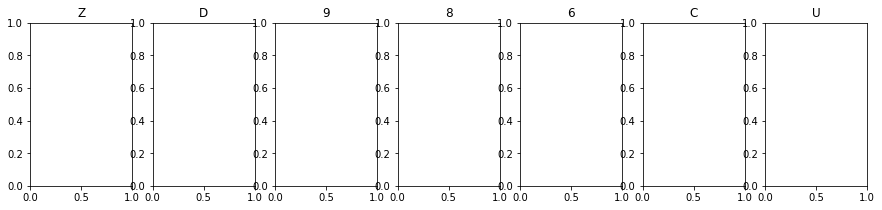

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

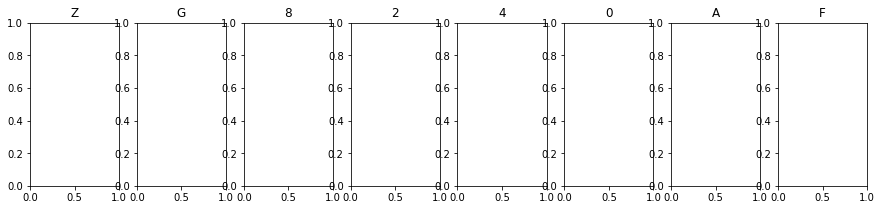

<Figure size 1008x288 with 0 Axes>

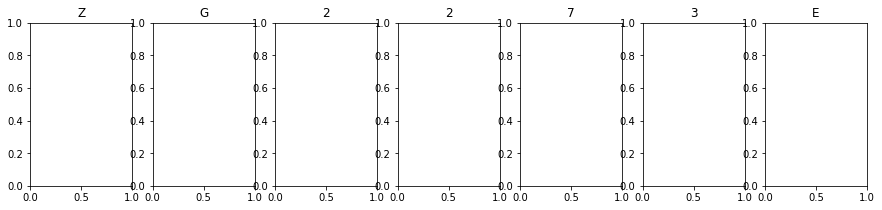

<Figure size 1008x288 with 0 Axes>

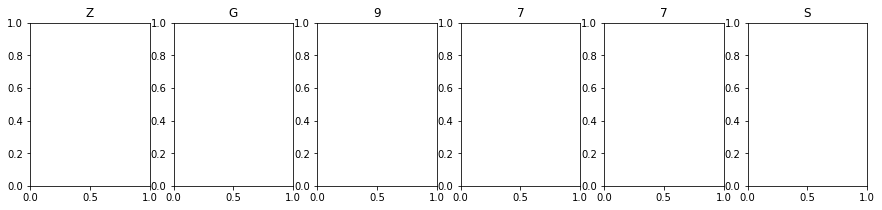

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

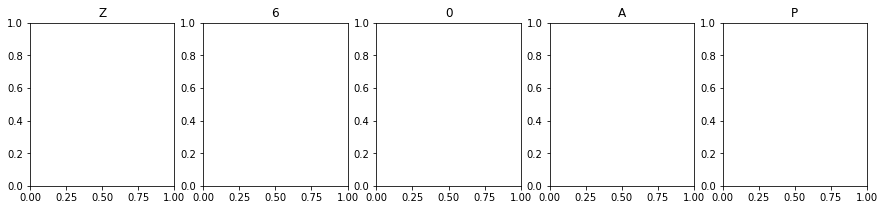

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

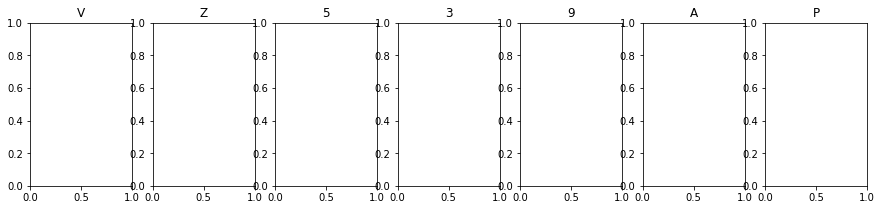

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

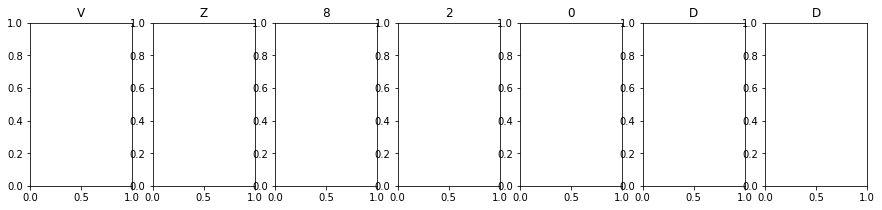

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

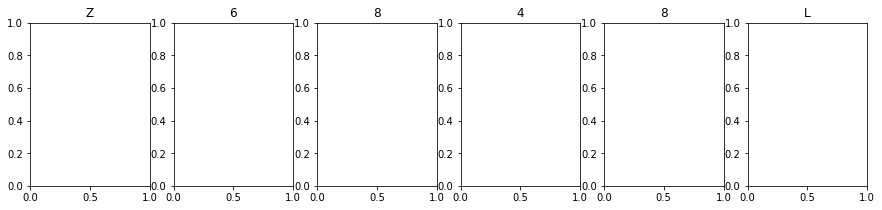

<Figure size 1008x288 with 0 Axes>

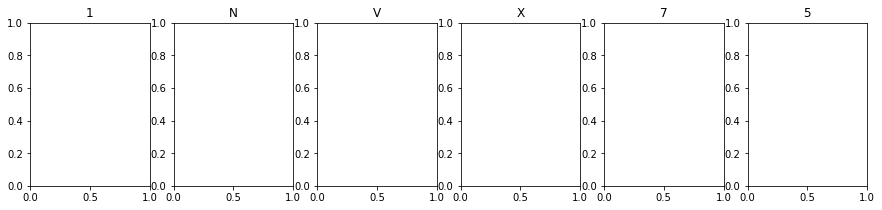

<Figure size 1008x288 with 0 Axes>

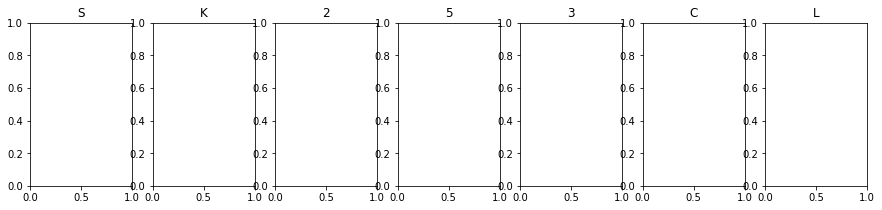

<Figure size 1008x288 with 0 Axes>

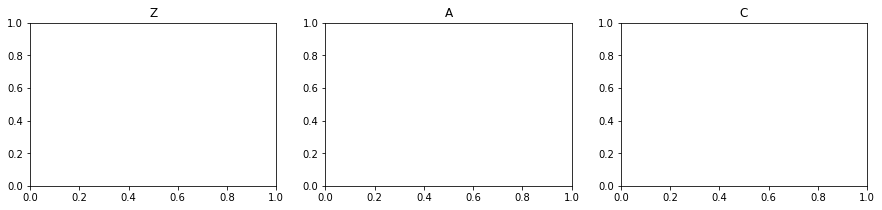

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

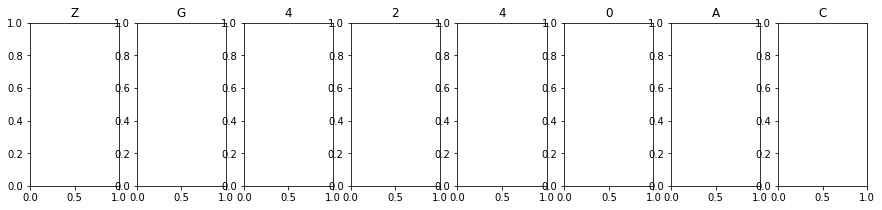

<Figure size 1008x288 with 0 Axes>

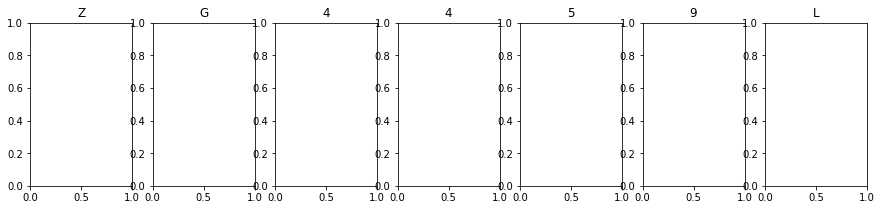

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

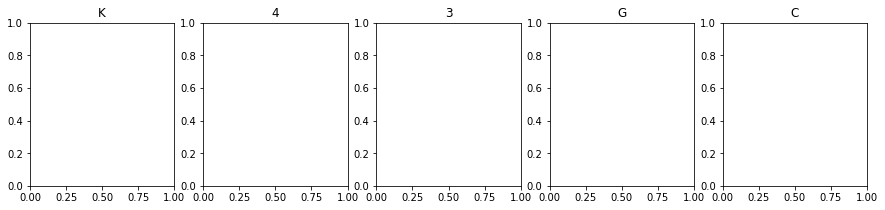

<Figure size 1008x288 with 0 Axes>

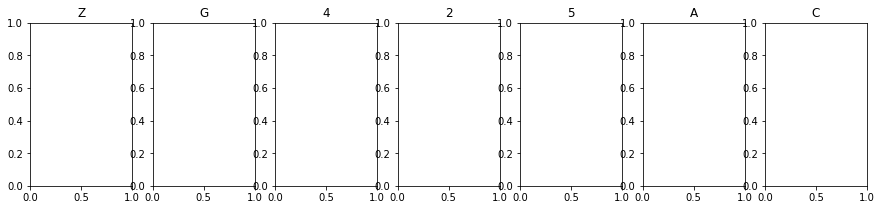

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

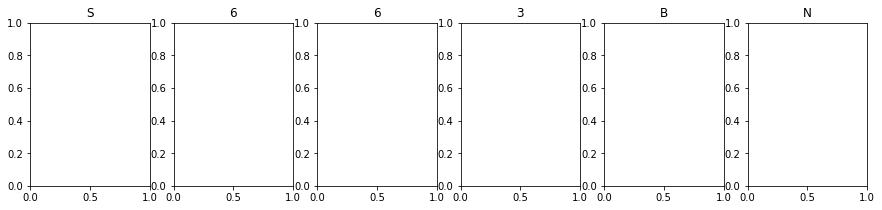

<Figure size 1008x288 with 0 Axes>

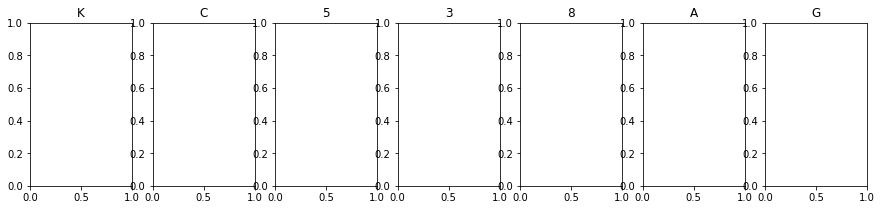

<Figure size 1008x288 with 0 Axes>

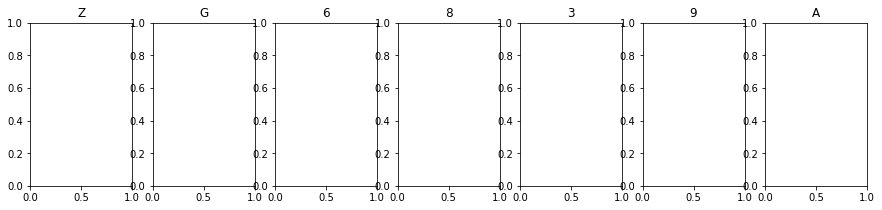

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

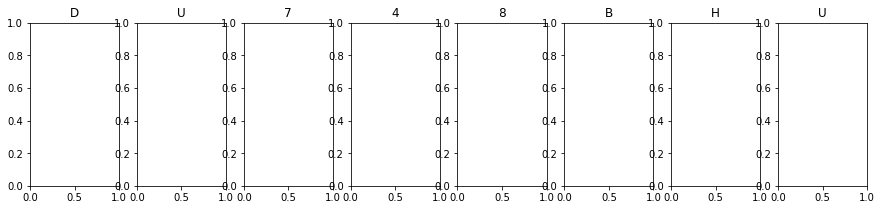

<Figure size 1008x288 with 0 Axes>

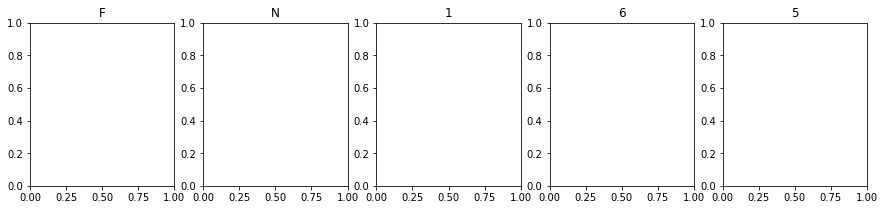

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

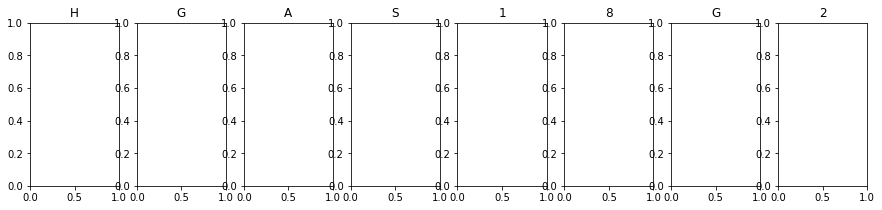

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

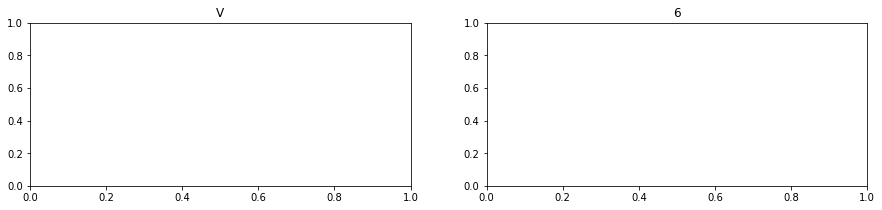

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

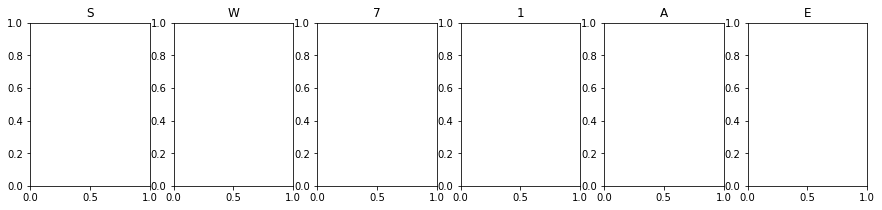

<Figure size 1008x288 with 0 Axes>

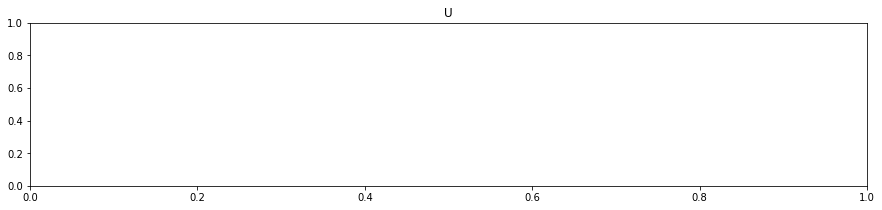

<Figure size 1008x288 with 0 Axes>

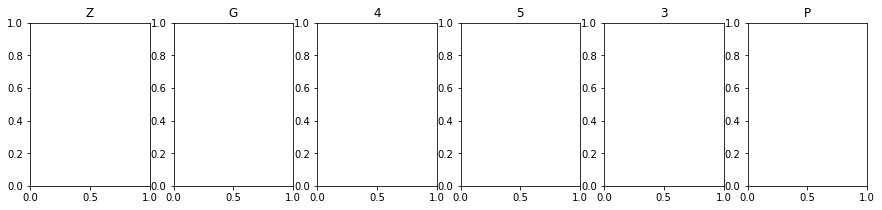

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

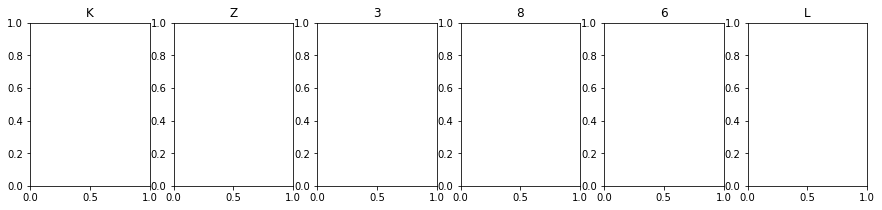

<Figure size 1008x288 with 0 Axes>

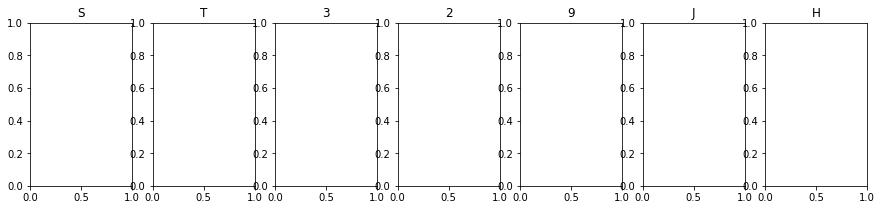

<Figure size 1008x288 with 0 Axes>

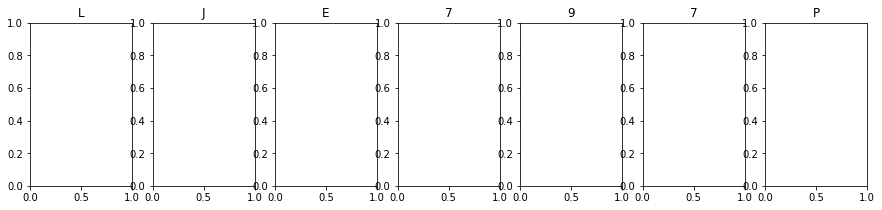

<Figure size 1008x288 with 0 Axes>

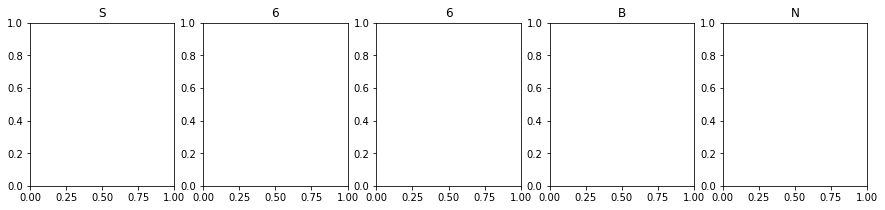

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

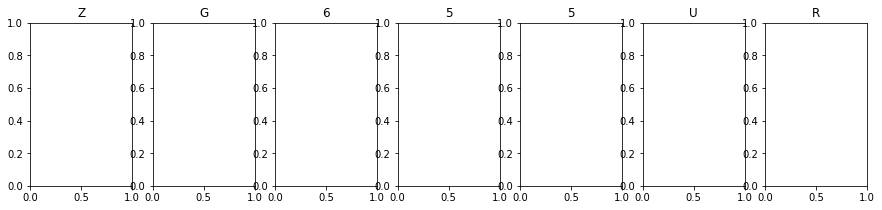

<Figure size 1008x288 with 0 Axes>

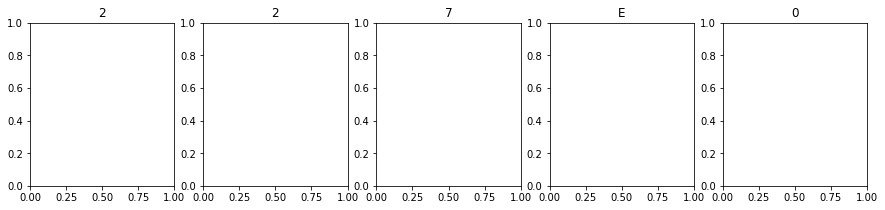

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

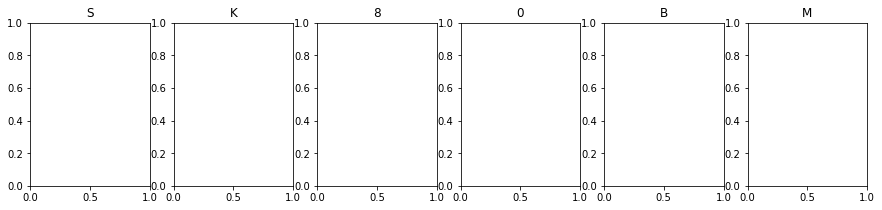

<Figure size 1008x288 with 0 Axes>

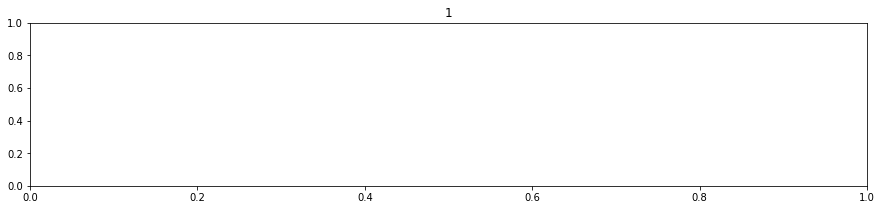

<Figure size 1008x288 with 0 Axes>

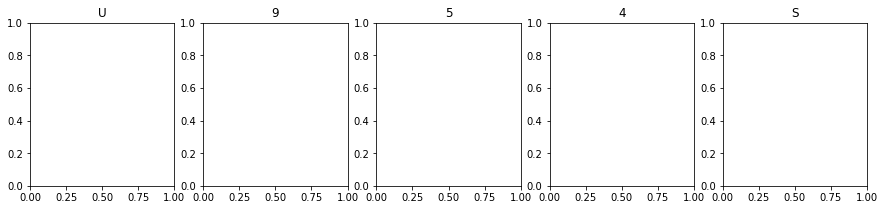

<Figure size 1008x288 with 0 Axes>

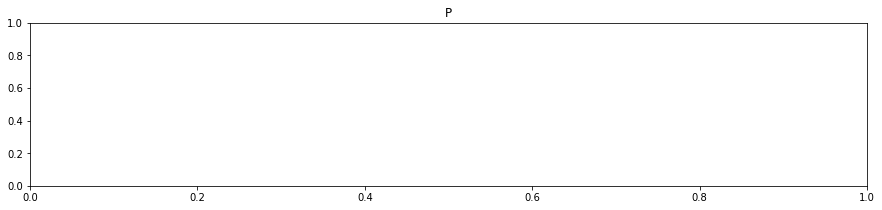

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

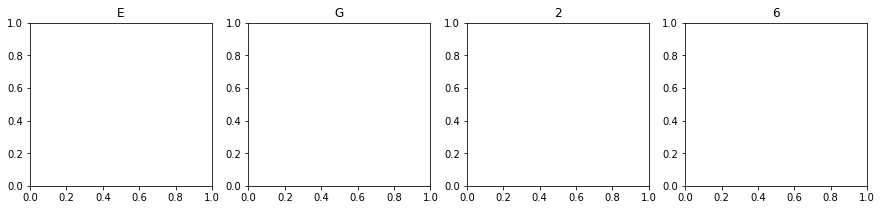

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

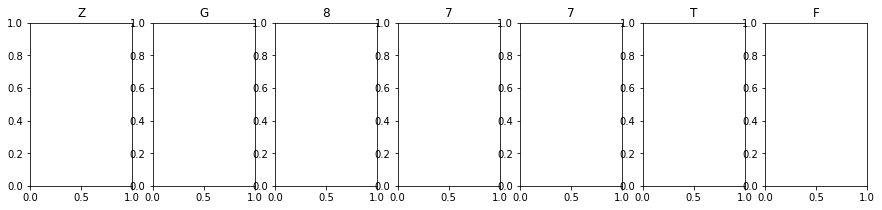

<Figure size 1008x288 with 0 Axes>

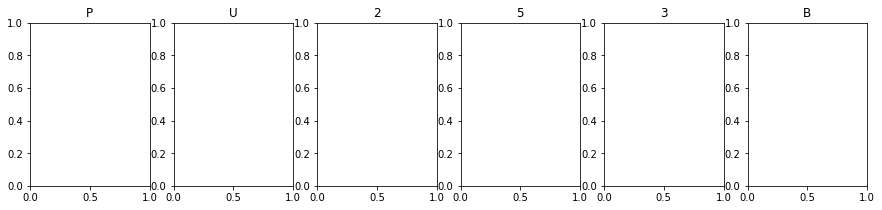

<Figure size 1008x288 with 0 Axes>

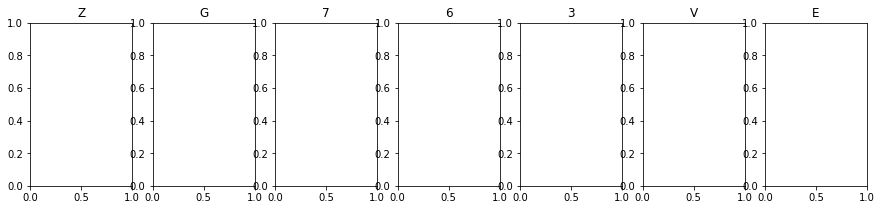

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

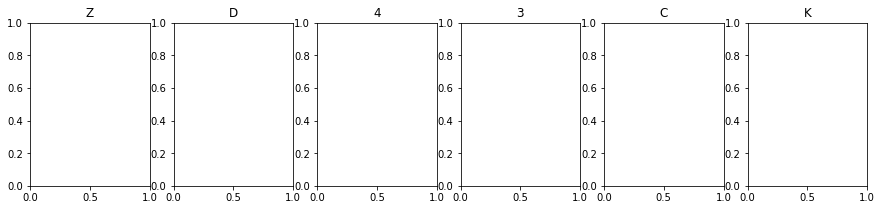

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

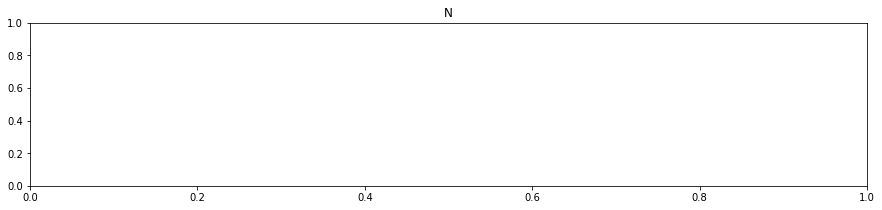

<Figure size 1008x288 with 0 Axes>

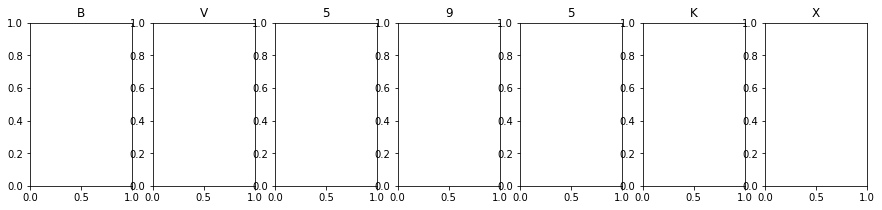

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

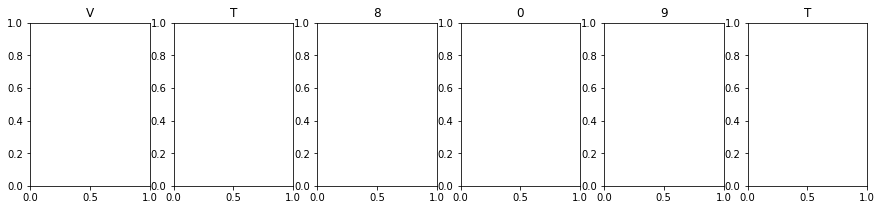

<Figure size 1008x288 with 0 Axes>

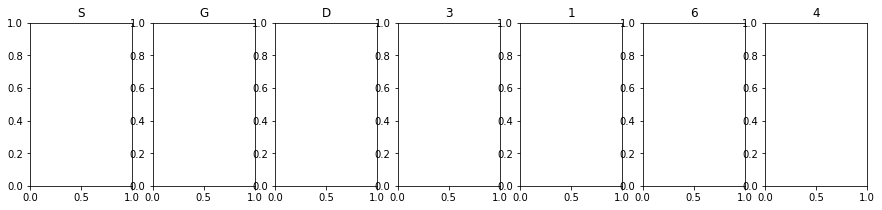

<Figure size 1008x288 with 0 Axes>

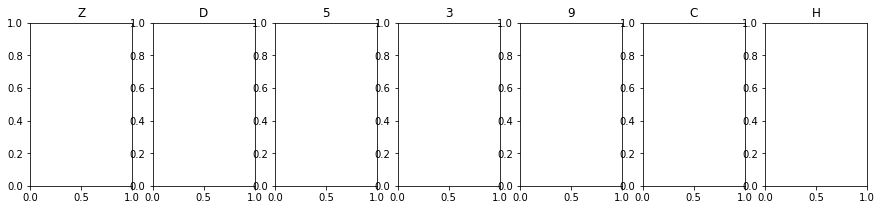

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

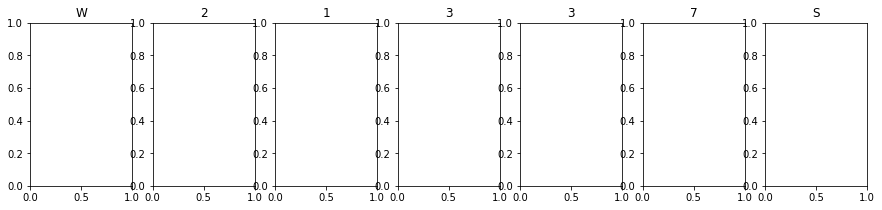

In [ ]:
import cv2
succ=0
unsucc=0
for lister in l:
    for images in os.listdir('/content/baza_slika/{}'.format(lister)):
        path=os.path.join('/content/baza_slika/{}'.format(lister),images)
        c=get_string_from_image(path)
        img=cv2.imread(path)
        if c!=None and len(c)>2:
            succ+=1
            
            cv2.imwrite('{}/{}'.format('Correct Images',images),img)
        else:
            unsucc+=1
print(succ/(unsucc+succ))

In [ ]:
!zip -r '/content/correct_imgs.zip' '/content/Correct Images'

  adding: content/Correct Images/ (stored 0%)
  adding: content/Correct Images/P9180025.jpg (deflated 5%)
  adding: content/Correct Images/Pa140003.jpg (deflated 5%)
  adding: content/Correct Images/P6040064.jpg (deflated 4%)
  adding: content/Correct Images/P1010031.jpg (deflated 6%)
  adding: content/Correct Images/Pa140004.jpg (deflated 5%)
  adding: content/Correct Images/P1010025.jpg (deflated 5%)
  adding: content/Correct Images/Pa140014.jpg (deflated 6%)
  adding: content/Correct Images/P6070040.jpg (deflated 5%)
  adding: content/Correct Images/P9180051.jpg (deflated 3%)
  adding: content/Correct Images/P9170042.jpg (deflated 6%)
  adding: content/Correct Images/P9170051.jpg (deflated 5%)
  adding: content/Correct Images/P9180031.jpg (deflated 5%)
  adding: content/Correct Images/P1010007.jpg (deflated 5%)
  adding: content/Correct Images/P5280074.jpg (deflated 5%)
  adding: content/Correct Images/P6070088.jpg (deflated 5%)
  adding: content/Correct Images/P6070068.jpg (deflate

In [ ]:
import cv2

count = 0
    #videoFile = train['video_name'][i]
cap = cv2.VideoCapture('/content/drive/My Drive/videoplayback.mp4')   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
        filename ='/content/test_imgs/Newest/' +"_frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()










ND


/content/script.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(14,4))
/content/script.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,3))




BG


1





WU
X








WW3





NOZ













WB1






V





















NO
ND








NH








HK

W
















NDZ









NO


19


















NO












<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

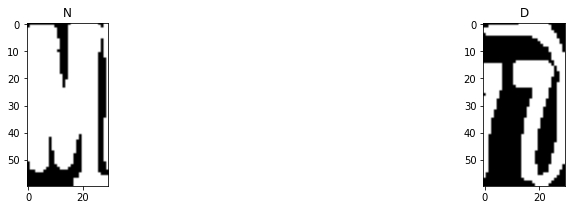

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

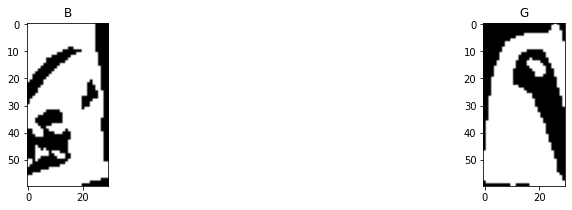

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

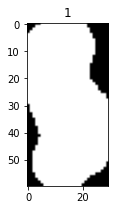

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

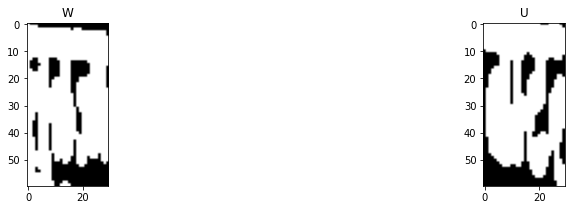

<Figure size 1008x288 with 0 Axes>

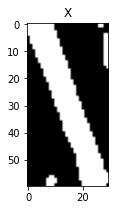

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

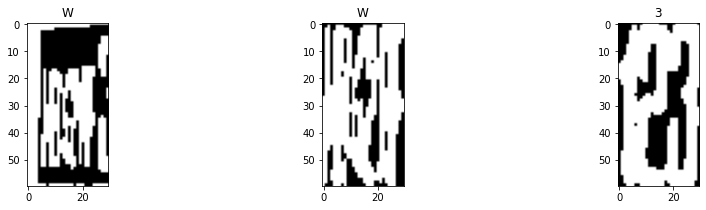

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

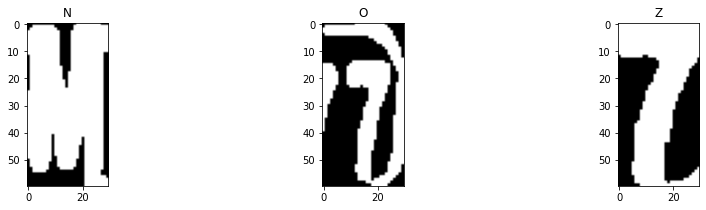

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

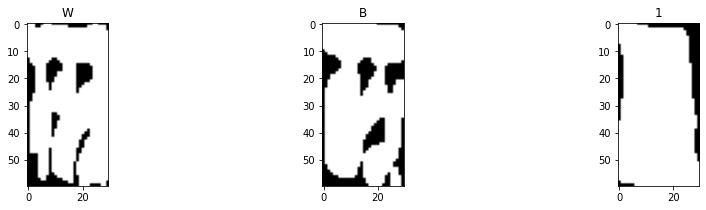

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

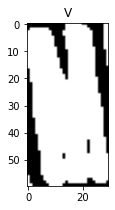

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

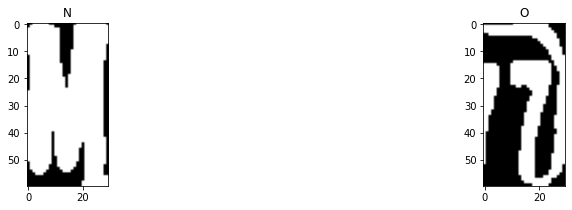

<Figure size 1008x288 with 0 Axes>

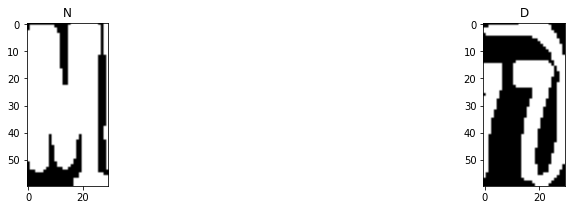

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

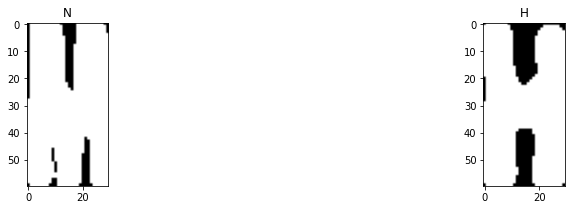

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

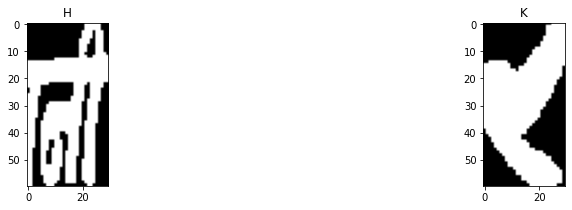

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

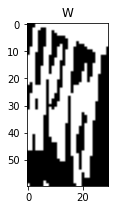

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

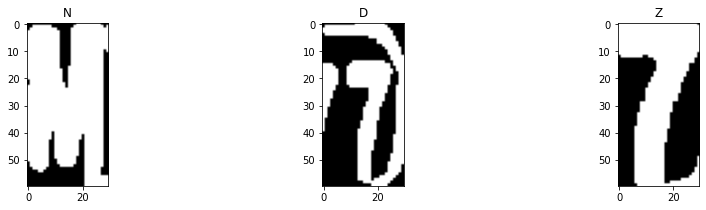

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

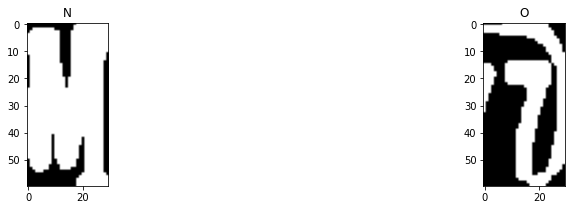

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

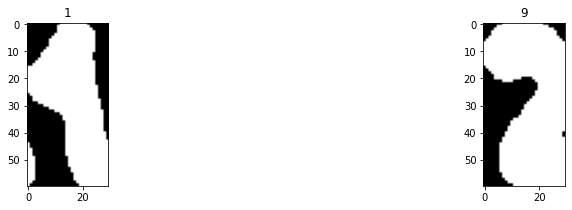

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

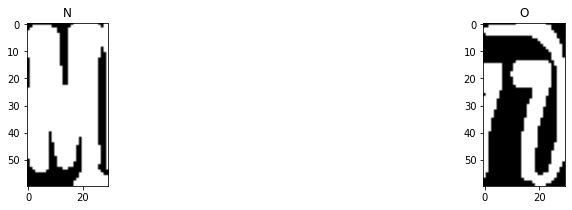

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

In [ ]:
import tqdm
for files in (os.listdir('/content/test_imgs/Newest')):
    #print(files)
    path=os.path.join('/content/test_imgs/Newest',files)
    try:
        print(get_string_from_image(path))
    except:
        pass

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
#temporary until bugs fixed in current master
!git reset --hard 6b134d93c51c774c09df2c10c228d35fc2201e46
%cd /content

!pip install -r yolov5/requirements.txt  # install dependencies
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets
import cv2
import tqdm
import numpy as np
import glob
import numpy as np
import pandas as pd
from utils.datasets import *
from utils.utils import *
from google.colab.patches import cv2_imshow


clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load model
model2 = torch.load('/content/drive/My Drive/last_yolov5s_results.pt', map_location=device)['model'].float()  # load to FP32
model2.to(device).eval()
pass

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [ ]:
labels = pd.DataFrame(columns=['image','label'])
path = '/content/drive/My Drive/Test_3/'

In [ ]:
def yolo_on_single_image(frame, j):
  img = cv2.resize(frame,(416,416))
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)
  img = torch.from_numpy(img).to(device)
  img =  img.float()  # uint8 to fp16/32
  img /= 255.0   
  if img.ndimension() == 3:
    img = img.unsqueeze(0)
  pred = model2(img, augment=False)[0]
  pred = non_max_suppression(pred, 0.6, 0.7)
  boxes = []
  scores = []
  lb = []
  for i, det in enumerate(pred):  # detections per image
    # save_path = 'draw/' + image_id + '.jpg'
    if det is not None and len(det):
        # Rescale boxes from img_size to im0 size
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], frame.shape).round()

        # Write results
        for *xyxy, conf, cls in det:
            boxes.append([int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3])])
            scores.append(conf)
            lb.append(cls)
  boxes = np.array(boxes)
  scores = np.array(scores)
  lb = np.array(lb)
  # boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
  # boxes[:, 3] = boxes[:, 3] - boxes[:, 1]
  boxes = boxes[scores >= 0.05].astype(np.int32)
  lb = lb[scores >=float(0.05)]
  scores = scores[scores >=float(0.05)]
  for i in range(len(boxes)):
    j += 1
    x = boxes[i][0]
    y = boxes[i][1]
    h = boxes[i][2]
    w = boxes[i][3]
    imgg = frame[y:y+h, x:x+w]
    try:
      labels.at[j,'image'] = 'img' + str(j)
      labels.at[j,'label'] = lb[i]
      fname = 'img'+str(j)+'.png'
      cv2_imshow(imgg) # comment this line when working with videos
      cv2.imwrite(path+fname,imgg)
      img=cv2.imwrite('img0.jpg',imgg)
    except:
      break
  return labels,boxes

In [ ]:
cd ../

/content


In [ ]:
j = 0
img = cv2.imread('/content/test_imgs/New folder/150723122647-india-truck-art-front-jodhpur-super-tease.jpg')
labels, boxes = yolo_on_single_image(img,j)

In [ ]:
try:
    print(get_string_from_image('img0.jpg'))
except:
    pass

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>